# Construction

## Construction


Software *design* gets a lot of press (Object orientation, UML, design patterns)

In this session we're going to look at advice on software *construction*

This lecture is available as an [IPython Notebook](http://nbviewer.ipython.org/url/development.rc.ucl.ac.uk/training/engineering/session05/../python/session05.ipynb)


### Construction vs Design


For a given piece of code, there exist several different ways one could write it:

* Choice of variable names
* Choice of comments
* Choice of layout

The consideration of these questions is the area of Software Construction.


### Low-level design decisions


We will also look at some of the lower-level software design decisions in the context of this section:

* Division of code into subroutines
* Subroutine access signatures
* Choice of data structures for readability


### Algorithms and structures


We will not, in this session, be looking at decisions as to how design questions impact performance:

* Choice of algorithms
* Choice of data structures for performance
* Choice of memory layout

We will consider these in a future session.


### Architectural design


We will not, in this session, be looking at the large-scale questions of how program components interact,
the stategic choices that govern how software behaves at the large scale:

* Where do objects get made?
* Which objects own or access other objects?
* How can I hide complexity in one part of the code from other parts of the code?

We will consider these in a future session.


### Construction


So, we've excluded most of the exciting topics. What's left is the bricks and mortar of software:
how letters and symbols are used to build code which is readable.


### Literate programming


In literature, books are enjoyable for different reasons:

* The beauty of stories
* The beauty of plots
* The beauty of characters

* The beauty of paragraphs
* The beauty of sentences
* The beauty of words

Software has beauty at these levels too: stories and characters correspond to architecture and object design,
plots corresponds to algorithms, but the rhythm of sentences and the choice of words corresponds
to software construction.


### Programming for humans


* Remember you're programming for humans as well as computers
* A program is the best, most rigourous way to describe an algorithm
* Code should be pleasant to read, a form of scholarly communication

Read [CodeComplete](http://www.amazon.co.uk/Code-Complete-Practical-Handbook-Construction/dp/0735619670)






## Setup

This notebook is based on a number of fragments of code, with an implicit context.
We've made a library to set up the context so the examples work:

In [2]:
%%writefile context.py
from mock import Mock
array=[]
agt=[]
ws=[]
agents=[]
counter=0
x=Mock()
y=None
agent=Mock()
value=0
bird_types=["Starling", "Hawk"]
import numpy as np
from mock import Mock
average=np.mean
hawk=Mock()
starling=Mock()
Mock.__sub__=Mock()
sInput="2.0"
input ="2.0"
iOffset=1
offset =1
anothervariable=1
flag1=True
variable=1
flag2=False
def do_something(): pass
from mock import Mock
Mock.__sub__=Mock()
Mock.__abs__=Mock()
chromosome=None
start_codon=None
subsequence=Mock()
transcribe=Mock()
ribe=Mock()
find=Mock()
hawk=Mock()
starling=Mock()
can_see=Mock()
my_name=""
your_name=""
flag1=False
flag2=False
start=0.0
end=1.0
step=0.1
birds=[Mock()]*2
resolution=100
pi=3.141
result= [0]*resolution
import numpy as np
import math
data= [math.sin(x) for x in np.arange(0,pi,pi/resolution)]
import yaml
import os

Overwriting context.py


In [3]:
from context import *

## Coding Conventions

### One code, many layouts:


Consider the following fragment of python:




In [3]:
import species
def AddToReaction(name, reaction):
    reaction.append(species.Species(name))




this could also have been written:




In [4]:
from species import Species

def add_to_reaction(a_name,
                    a_reaction):
  l_species = Species(a_name)
  a_reaction.append( l_species )

### So many choices


* Layout
* Naming
* Syntax choices


### Layout

In [5]:
reaction= {
    "reactants": ["H","H","O"],
    "products": ["H2O"]
}

In [6]:
reaction2=(
{
  "reactants":
  [
    "H",
    "H",
    "O"
  ],
  "products":
  [
    "H2O"
  ]
}
)

### Layout choices


* Brace style
* Line length
* Indentation
* Whitespace/Tabs


### Naming Conventions

In [7]:
class ClassName(object):
    def methodName(variable_name):
        instance_variable=variable_name

In [8]:
class class_name(object):
    def method_name(a_variable):
        m_instance_variable=a_variable

### Hungarian Notation


Prefix denotes *type*:




In [9]:
fNumber= float(sInput) + iOffset
number = float(input)  + offset

### Newlines


* Newlines make code easier to read
* Newlines make less code fit on a screen

Use newlines to describe your code's *rhythm*


### Syntax Choices

In [10]:
anothervariable+=1
if ((variable==anothervariable) and flag1 or flag2): do_something()

In [11]:
anothervariable = anothervariable + 1
variable_equality = (variable == anothervariable);
if ((variable_equality and flag1) or flag2):
   do_something()

### Syntax choices


* Explicit operator precedence
* Compound expressions
* Package import choices


### Coding Conventions


You should try to have an agreed policy for your team for these matters.

If your language sponsor has a standard policy, use that.

E.g. [Python PEP8](http://legacy.python.org/dev/peps/pep-0008/)

E.g. [Google's guide for R](https://google-styleguide.googlecode.com/svn/trunk/Rguide.xml)

E.g. [Google's style guide for C++](http://google-styleguide.googlecode.com/svn/trunk/cppguide.xml)


### Lint


There are automated tools which enforce coding conventions and check for common mistakes.

These are called *linters*

E.g. `pip install` [pep8](https://pypi.python.org/pypi/pep8)




In [12]:
%%bash
pep8 species.py

species.py:2:6: E111 indentation is not a multiple of four





It is a good idea to run a linter before every commit, or include it in your CI tests.



## Comments

### Why comment?


* You're writing code for people, as well as computers.
* Comments can help you build code, by representing your design
* Comments explain subtleties in the code which are not obvious from the syntax
* Comments explain *why* you wrote the code the way you did


### Bad Comments


"I write good code, you can tell by the number of comments."

This is wrong.


### Comments which are obvious

In [13]:
counter=counter+1 # Increment the counter
for element in array: # Loop over elements
    pass

### Comments which could be replaced by better style

In [14]:
for i in range(len(agt)): #for each agent
  agt[i].theta+=ws[i]     # Increment the angle of each agent
                          #by its angular velocity
  agt[i].x+=r*sin(agt[i].theta) #Move the agent by the step-size
  agt[i].y+=r*cos(agt[i].theta) #r in the direction indicated




Is good. But:




In [15]:
for agent in agents:
  agent.turn()
  agent.move()

class Agent(object):
   def turn(self):
        self.direction+=self.angular_velocity;
   def move(self):
       self.x+=Agent.step_length*sin(self.direction)
       self.y+=Agent.step_length*cos(self.direction)




is probably better.


### Comments vs expressive code 


> The proper use of comments is to compensate for our failure to express yourself in code. 
Note that I used the word failure. I meant it. Comments are always failures.

-- Robert Martin, [Clean Code](http://www.amazon.co.uk/Clean-Code-Handbook-Software-Craftsmanship/dp/0132350882).

I wouldn't disagree, but still, writing "self-documenting" code is very hard, so do comment if you're unsure!


### Comments which belong in an issue tracker

In [16]:
x.clear() # Code crashes here sometimes
class Agent(object):
    pass
    # TODO: Implement pretty-printer method




BUT comments that reference issues in the tracker can be good.

E.g.




In [17]:
if x.safe_to_clear(): # Guard added as temporary workaround for #32
   x.clear()




is OK.


### Comments which only make sense to the author today

In [18]:
agent.turn() # Turtle Power!
agent.move()
agents[:]=[]# Shredder!

### Comments which are unpublishable

In [19]:
# Stupid supervisor made me write this code
# So I did it while very very drunk.

## Good comments

### Pedagogical comments


Code that *is* good style, but you're not familiar with, or 
that colleagues might not be familiar with




In [20]:
# This is how you define a decorator in python
def double(decorated_function):
   # Here, the result function forms a closure over 
   # the decorated function
   def result_function(input):
       return decorated_function(decorated_function(input))
   # The returned result is a function
   return result_function

@double
def try_me_twice():
    pass

### Other good comments


Comments which explain coding definitions or reasons for programming choices.



In [21]:
def __init__(self):
    self.angle=0 # clockwise from +ve y-axis
    nonzero_indices = [] # Use sparse model as memory constrained

## Documentation

### Documentation is hard


* Good documentation is hard, and very expensive.
* Bad documentation is detrimental.
* Good documentation quickly becomes bad if not kept up-to-date with code changes.
* Professional companies pay large teams of documentation writers.


### Prefer readable code with tests and vignettes


If you don't have the capacity to maintain great documentation,
focus on:

* Readable code
* Automated tests
* Small code samples demonstrating how to use the api


### Comment-based Documentation tools


Documentation tools can produce extensive documentation about your code by pulling out comments near the beginning of functions,
together with the signature, into a web page.

The most popular is [Doxygen](http://www.stack.nl/~dimitri/doxygen/)

[Have a look at an example of some Doxygen output](
http://www.bempp.org/cppref/2.0/group__abstract__boundary__operators.html)

[Sphinx](http://sphinx-doc.org/) is nice for Python, and works with C++ as well.
Here's some [Sphinx-generated output](http://www.bempp.org/pythonref/2.0/bempp_visualization2.html)
and the [corresponding source code](https://github.com/bempp/bempp/blob/master/python/bempp/visualization2.py)
[Breathe](http://michaeljones.github.io/breathe/ ) can be used to make Sphinx and Doxygen work together.

[Roxygen](http://www.rstudio.com/ide/docs/packages/documentation) is good for R.


## Example of using Sphinx

### Write some docstrings

We're going to document our "greeter" example using docstrings with Sphinx.

There are various conventions for how to write docstrings, but the native sphinx one doesn't look nice when used with
the built in `help` system.

In writing Greeter, we used the docstring conventions from NumPy.
So we use the [numpydoc](https://github.com/numpy/numpy/blob/master/doc/HOWTO_DOCUMENT.rst.txt) sphinx extension to 
support these.

```
""" 
Generate a greeting string for a person.

Parameters
----------
personal: str
    A given name, such as Will or Jean-Luc

family: str
    A family name, such as Riker or Picard
title: str
    An optional title, such as Captain or Reverend
polite: bool
    True for a formal greeting, False for informal.

Returns
-------
string
    An appropriate greeting
```

### Set up sphinx


Invoke the [sphinx-quickstart](http://sphinx-doc.org/tutorial.html) command to build Sphinx's
configuration file automatically based on questions
at the command line:


``` bash
sphinx-quickstart
```

Which responds:

```
Welcome to the Sphinx 1.2.3 quickstart utility.

Please enter avalues for the following settings (just press Enter to
accept a default value, if one is given in brackets).

Enter the root path for documentation.
> Root path for the documentation [.]:
```

and then look at and adapt the generated config, a file called
conf.py in the root of the project. This contains the project's Sphinx configuration, as Python variables:

``` python
#Add any Sphinx extension module names here, as strings. They can be
#extensions coming with Sphinx (named 'sphinx.ext.*') or your custom
# ones.
extensions = [
    'sphinx.ext.autodoc',  # Support automatic documentation
    'sphinx.ext.coverage', # Automatically check if functions are documented
    'sphinx.ext.mathjax',  # Allow support for algebra
    'sphinx.ext.viewcode', # Include the source code in documentation
    'numpydoc'             # Support NumPy style docstrings
]
```

To proceed with the example, we'll copy a finished conf.py into our folder, though normally you'll always use `sphinx-quickstart`


In [35]:
%%writefile ../session04/greetings/conf.py

import sys
import os

extensions = [
    'sphinx.ext.autodoc',  # Support automatic documentation
    'sphinx.ext.coverage', # Automatically check if functions are documented
    'sphinx.ext.mathjax',  # Allow support for algebra
    'sphinx.ext.viewcode', # Include the source code in documentation
    'numpydoc'             # Support NumPy style docstrings
]
templates_path = ['_templates']
source_suffix = '.rst'
master_doc = 'index'
project = u'Greetings'
copyright = u'2014, James Hetherington'
version = '0.1'
release = '0.1'
exclude_patterns = ['_build']
pygments_style = 'sphinx'
html_theme = 'default'
html_static_path = ['_static']
htmlhelp_basename = 'Greetingsdoc'
latex_elements = {
}

latex_documents = [
  ('index', 'Greetings.tex', u'Greetings Documentation',
   u'James Hetherington', 'manual'),
]

man_pages = [
    ('index', 'greetings', u'Greetings Documentation',
     [u'James Hetherington'], 1)
]

texinfo_documents = [
  ('index', 'Greetings', u'Greetings Documentation',
   u'James Hetherington', 'Greetings', 'One line description of project.',
   'Miscellaneous'),
]

Overwriting ../session04/greetings/conf.py


### Define the root documentation page


Sphinx uses [RestructuredText](http://docutils.sourceforge.net/rst.html) another wiki markup format similar to Markdown.

You define an "index.rst" file to contain any preamble text you want. The rest is autogenerated by `sphinx-quickstart`







In [36]:
%%writefile ../session04/greetings/index.rst
Welcome to Greetings's documentation!
=====================================

Simple "Hello, James" module developed to teach research software engineering.

.. autofunction:: greetings.greeter.greet

Overwriting ../session04/greetings/index.rst


###  Run sphinx


We can run Sphinx using:


In [37]:
%%bash
cd ../session04/greetings/
sphinx-build . doc

Making output directory...
Running Sphinx v1.2.3
loading pickled environment... not yet created
No builder selected, using default: html
building [html]: targets for 1 source files that are out of date
updating environment: 1 added, 0 changed, 0 removed
reading sources... [100%] index

looking for now-outdated files... none found
pickling environment... done
checking consistency... done
preparing documents... done
writing output... [100%] index

writing additional files... (1 module code pages) _modules/index genindex search
copying static files... done
copying extra files... done
dumping search index... done
dumping object inventory... done
build succeeded, 1 warning.


### Sphinx output

Sphinx's output is [html](../session04/greetings/doc). We just created a simple single function's documentation, but Sphinx will create
multiple nested pages of documentation automatically for many functions.





## Refactoring

### Refactoring


To refactor is to:

* Make a change to the design of some software
* Which improves the structure or readability
* But which leaves the actual behaviour of the program completely unchanged.



### A word from the Master


> Refactoring is a controlled technique for improving the design of an existing code base. 
Its essence is applying a series of small behavior-preserving transformations, each of which "too small to be worth doing". 
However the cumulative effect of each of these transformations is quite significant. 
By doing them in small steps you reduce the risk of introducing errors. 
You also avoid having the system broken while you are carrying out the restructuring - 
which allows you to gradually refactor a system over an extended period of time.

-- Martin Fowler


### List of known refactorings


The next few sections will present some known refactorings

We'll show before and after code, present any new coding techniques needed to do the refactoring,
and describe *code smells*: how you know you need to refactor.


### Replace magic numbers with constants


Smell: Raw numbers appear in your code

Before: 




In [38]:
data= [math.sin(x) for x in np.arange(0,3.141,3.141/100)]
result= [0]*100
for i in range(100):
    for j in range(i+1, 100):
        result[j] += data[i] * data[i-j] / 100




after:




In [39]:
resolution=100
pi=3.141
data= [math.sin(x) for x in np.arange(0,pi,pi/resolution)]
result= [0]*resolution
for i in range(resolution):
    for j in range(i + 1, resolution):
        result[j] += data[i] * data[i-j] / resolution

### Replace repeated code with a function


Smell: Fragments of repeated code appear

Before:




In [40]:
if abs(hawk.facing-starling.facing)<hawk.viewport:
    hawk.hunting()

if abs(starling.facing-hawk.facing)<starling.viewport:
    starling.flee()




After:




In [41]:
def can_see(source,target):
    return (source.facing-target.facing)<source.viewport

if can_see(hawk,starling):
    hawk.hunting()

if can_see(starling,hawk):
    starling.flee()

### Change of variable name


Smell: Code needs a comment to explain what it is for

Before:




In [2]:
z=find(x,y)
if z:
    ribe(x)




After:




In [3]:
gene = subsequence(chromosome, start_codon)
if gene:
    transcribe(gene)

### Separate a complex expression into a local variable


Smell: An expression becomes long




In [4]:
if ((my_name==your_name) and flag1 or flag2): do_something()




vs




In [5]:
same_names= (my_name==your_name)
flags_OK=flag1 or flag2
if same_names and flags_OK: do_something()

### Replace loop with iterator


Smell: Loop variable is an integer from 1 to something

Before:




In [4]:
sum=0
for i in range(resolution):
    sum+=data[i]




After:




In [5]:
sum=0
for value in data:
    sum+=value

### Replace hand-written code with library code


Smell: It feels like surely someone else must have done this at some point

Before:




In [6]:
xcoords=[start+i*step for i in range(int((end-start)/step))]




After:




In [7]:
import numpy as np
xcoords=np.arange(start,end,step)




See [Numpy](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html),
    [Pandas](http://pandas.pydata.org/)


### Replace set of arrays with array of structures


Smell: A function needs to work corresponding indices of several arrays:

Before:




In [8]:
def can_see(index,source_angles,target_angles,source_viewports):
    return abs(source_angles[i]-target_angles[i])<source_viewports[i]




After:




In [9]:
def can_see(source,target):
    return (source["facing"]-target["facing"])<source["viewport"]




Warning: this refactoring greatly improves readability but can make code slower,
depending on memory layout. Be careful.


### Replace constants with a configuration file


Smell: You need to change your code file to explore different research scenarios

Before:




In [10]:
flight_speed=2.0 # mph
bounds=[0,0,100,100]
turning_circle=3.0 # m
bird_counts= {"hawk": 5, "starling": 500}




After:







In [11]:
%%writefile config.yaml
bounds: [0,0,100,100]
counts:
    hawk: 5
    starling: 500
speed: 2.0
turning_circle: 3.0

Overwriting config.yaml


In [12]:
config=yaml.load(open("config.yaml"))




See [YAML](http://www.yaml.org/) and [PyYaml](http://pyyaml.org/)
and [Python OS](http://docs.python.org/2/library/os.html)


### Replace global variables with function arguments


Smell: A global variable is assigned and then used inside a called function:




In [13]:
viewport=pi/4
if hawk.can_see(starling):
    hawk.hunt(starling)

class Hawk(object):
    def can_see(self,target):
        return (self.facing-target.facing)<viewport




Becomes:




In [14]:
viewport=pi/4
if hawk.can_see(starling,viewport):
    hawk.hunt(starling)

class Hawk(object):
    def can_see(self,target,viewport):
        return (self.facing-target.facing)<viewport

### Merge neighbouring loops


Smell: Two neighbouring loops have the same for statement




In [15]:
for bird in birds:
    bird.build_nest()

for bird in birds:
    bird.lay_eggs()




Becomes:




In [16]:
for bird in birds:
    bird.build_nest()
    bird.lay_eggs()

### Break a large function into smaller units


Smell: A function or subroutine no longer fits on a page in your editor
Smell: A line of code is indented more than three levels
Smell: A piece of code interacts with the surrounding code through just a few variables

Before:




In [17]:
def do_calculation():
    for predator in predators:
        for prey in preys:
            if predator.can_see(prey):
                predator.hunt(prey)
            if predator.can_reach(prey):
                predator.eat(prey)




After:




In [18]:
def do_calculation():
    for predator in predators:
        for prey in preys:
            predate(predator, prey)

def predate(predator,prey):
    if predator.can_see(prey):
        predator.hunt(prey)
    if predator.can_reach(prey):
        predator.eat(prey)

### Separate code concepts into files or modules


Smell: You find it hard to locate a piece of code

Smell: You get a lot of version control conflicts

Before:




In [19]:
class One(object):
    pass


class Two(object):
    def __init__():
        self.child=One()




After:




In [21]:
from anotherfile import One

class Two(object):
    def __init__():
        self.child=One()

### Refactoring is a safe way to improve code


You may think you can see how to rewrite a whole codebase to be better

However, you may well get lost halfway through the exercise.

By making the changes as small, reversible, incremental steps,
you can reach your target design more reliably.


### Tests and Refactoring


Badly structured code cannot be unit tested. There are no "units".

Before refactoring, ensure you have a robust regression test.

This will allow you to *Refactor with confidence*

As you refactor, if you create any new units (functions, modules, classes),
add new tests for them.


### Refactoring Summary


* Replace magic numbers with constants
* Replace repeated code with a function
* Change of variable/function/class name
* Replace loop with iterator
* Replace hand-written code with library code
* Replace set of arrays with array of structures
* Replace constants with a configuration file
* Replace global variables with function arguments
* Break a large function into smaller units
* Separate code concepts into files or modules

And many more

Read [The Refactoring Book](http://www.amazon.co.uk/Refactoring-Improving-Design-Existing-Technology/dp/0201485672)




## Introduction to Objects

### Classes: User defined types

In [22]:
class Person(object):
    def __init__(self,name,age):
        self.name=name
        self.age=age
    def grow_up(self):
        self.age+=1

james=Person("James",37)
james.home="London"

### Declaring a class 


Class: A user-defined type




In [23]:
class MyClass(object):
    pass

### Object instances


Instance: A particular object *instantiated* from a class.




In [24]:
my_object = MyClass()

### Method


Method: A function which is "built in" to a class




In [25]:
class MyClass(object):
    def someMethod(self, argument):
        pass

my_object=MyClass()
my_object.someMethod(value)

### Constructor


Constructor: A special method called when instantiating a new object




In [26]:
class MyClass(object):
    def __init__(self, argument):
        pass

my_object = MyClass(value)

### Member Variable


Member variable: a value stored inside an instance of a class.




In [27]:
class MyClass(object):
    def __init__(self):
        self.member = "Value"

my_object = MyClass()
assert(my_object.member == "Value")

## Object refactorings

### Replace add-hoc structure with user defined classes


Smell: A data structure made of nested arrays and dictionaries becomes unwieldy

Before:




In [28]:
from random import random
birds = [{"position": random(),
          "velocity": random(),
          "type": kind} for kind in bird_types]

average_position = average([bird["position"] for bird in birds])




After:




In [29]:
class Bird(object):
    def __init__(self,type):
        from random import random
        self.type = type
        self.position = random()
        self.velocity = random()

birds = [Bird(type) for type in bird_types]
average_position = average([bird.position for bird in birds])

### Replace function with a method


Smell: A function is always called with the same kind of thing

Before:




In [30]:
def can_see(source,target):
    return (source.facing-target.facing)<source.viewport

if can_see(hawk,starling):
    hawk.hunt()




After:




In [31]:
class Bird(object):
    def can_see(self,target):
        return (self.facing-target.facing)<self.viewport

if hawk.can_see(starling):
    hawk.hunt()

### Replace method arguments with class members


Smell: A variable is nearly always used in arguments to 
a class.




In [32]:
class Person(object):
    def __init__(self, genes):
        self.genes=genes
    def reproduce_probability(self,age): pass
    def death_probability(self,age): pass
    def emigrate_probability(self,age): pass




After:




In [33]:
class Person(object):
    def __init__(self, genes, age):
        self.age=age
        self.genes=genes
    def reproduce_probability(self): pass
    def death_probability(self): pass
    def emigrate_probability(self): pass

### Replace global variable with class and member


Smell: A global variable is referenced by a few functions




In [34]:
name="James"
birthday=[19,10,76]
today=[29,10]
if today==birthday[0:2]:
    print "Happy Birthday, ", name
else:
    print "No birthday for you today."

No birthday for you today.


In [35]:
class Person(object):
    def __init__(self, birthday, name):
        self.birth_day=birthday[0]
        self.birth_month=birthday[1]
        self.birth_year=birthday[2]
        self.name=name
    def check_birthday(self, today_day, today_month):
        if not self.birth_day == today_day:
            return False
        if not self.birth_month == today_month:
            return False
        return True
    def greet_appropriately(self, today):
        if self.check_birthday(*today):
            print "Happy Birthday", self.name
        else:
            print "No birthday for you."

james=Person([19,10,76],"James")
james.greet_appropriately([29,10])

No birthday for you.


### Object Oriented Refactoring Summary


* Replace ad-hoc structure with a class
* Replace function with a method
* Replace method argument with class member
* Replace global variable with class data




## Exercise: The Boids

### Flocking


> The aggregate motion of a flock of birds, a herd of land animals, or a school of fish is a beautiful and familiar
part of the natural world... The aggregate motion of the simulated flock is created by a distributed behavioral model much
like that at work in a natural flock; the birds choose their own course. Each simulated bird is implemented as an independent
actor that navigates according to its local perception of the dynamic environment, the laws of simulated physics that rule its
motion, and a set of behaviors programmed into it... The aggregate motion of the simulated flock is the result of the
dense interaction of the relatively simple behaviors of the individual simulated birds. 

-- Craig W. Reynolds, "Flocks, Herds, and Schools: A Distributed Behavioral Model", *Computer Graphics* **21** _4_ 1987, pp 25-34
See the [original paper](http://www.cs.toronto.edu/~dt/siggraph97-course/cwr87/)


### Boids


* Collision Avoidance: avoid collisions with nearby flockmates
* Velocity Matching: attempt to match velocity with nearby flockmates
* Flock Centering: attempt to stay close to nearby flockmates


### Bad_Boids


I have written some _very bad_ code implementing Boids, based on [Konrad Parker's](http://www.kfish.org/) pseudocode.

Here's the [Github link](https://github.com/jamespjh/bad-boids).

Please fork it on GitHub, and clone your fork.


``` bash
git clone     git@github.com:yourname/bad-boids.git 
# OR git clone https://github.com/yourname/bad-boids.git
```

In [51]:
from JSAnimation import IPython_display

For the Exercise, you should start from the GitHub repository, but here's my terrible code:

In [57]:
"""
A deliberately bad implementation of [Boids](http://dl.acm.org/citation.cfm?doid=37401.37406)
for use as an exercise on refactoring.
"""

from matplotlib import pyplot as plt
from matplotlib import animation

import random

# Deliberately terrible code for teaching purposes

boids_x=[random.uniform(-450,50.0) for x in range(50)]
boids_y=[random.uniform(300.0,600.0) for x in range(50)]
boid_x_velocities=[random.uniform(0,10.0) for x in range(50)]
boid_y_velocities=[random.uniform(-20.0,20.0) for x in range(50)]
boids=(boids_x,boids_y,boid_x_velocities,boid_y_velocities)

def update_boids(boids):
    xs,ys,xvs,yvs=boids
    # Fly towards the middle
    for i in range(len(xs)):
        for j in range(len(xs)):
            xvs[i]=xvs[i]+(xs[j]-xs[i])*0.01/len(xs)
    for i in range(len(xs)):
        for j in range(len(xs)):
            yvs[i]=yvs[i]+(ys[j]-ys[i])*0.01/len(xs)
    # Fly away from nearby boids
    for i in range(len(xs)):
        for j in range(len(xs)):
            if (xs[j]-xs[i])**2 + (ys[j]-ys[i])**2 < 100:
                xvs[i]=xvs[i]+(xs[i]-xs[j])
                yvs[i]=yvs[i]+(ys[i]-ys[j])
    # Try to match speed with nearby boids
    for i in range(len(xs)):
        for j in range(len(xs)):
            if (xs[j]-xs[i])**2 + (ys[j]-ys[i])**2 < 10000:
                xvs[i]=xvs[i]+(xvs[j]-xvs[i])*0.125/len(xs)
                yvs[i]=yvs[i]+(yvs[j]-yvs[i])*0.125/len(xs)
    # Move according to velocities
    for i in range(len(xs)):
        xs[i]=xs[i]+xvs[i]
        ys[i]=ys[i]+yvs[i]


figure=plt.figure()
axes=plt.axes(xlim=(-500,1500), ylim=(-500,1500))
scatter=axes.scatter(boids[0],boids[1])

def animate(frame):
   update_boids(boids)
   scatter.set_offsets(zip(boids[0],boids[1]))


anim = animation.FuncAnimation(figure, animate,
                               frames=200, interval=50)

### Look at the birdies!


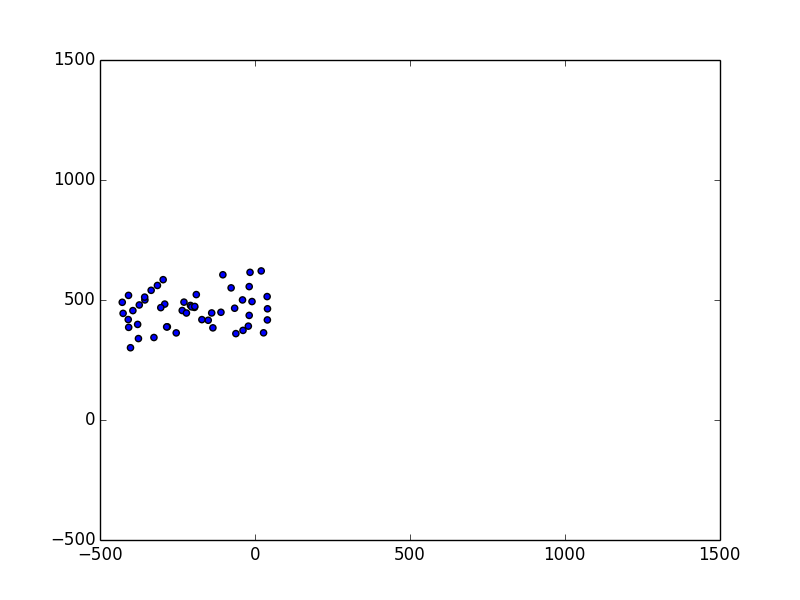
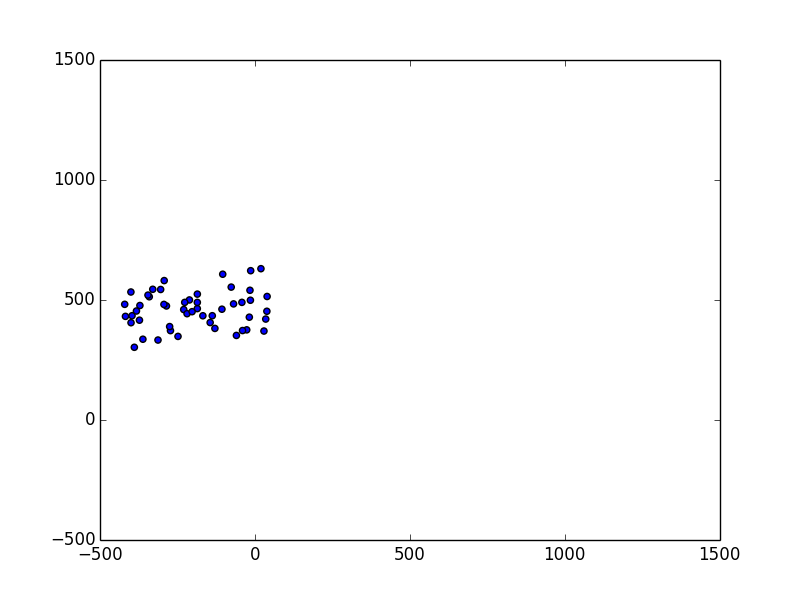
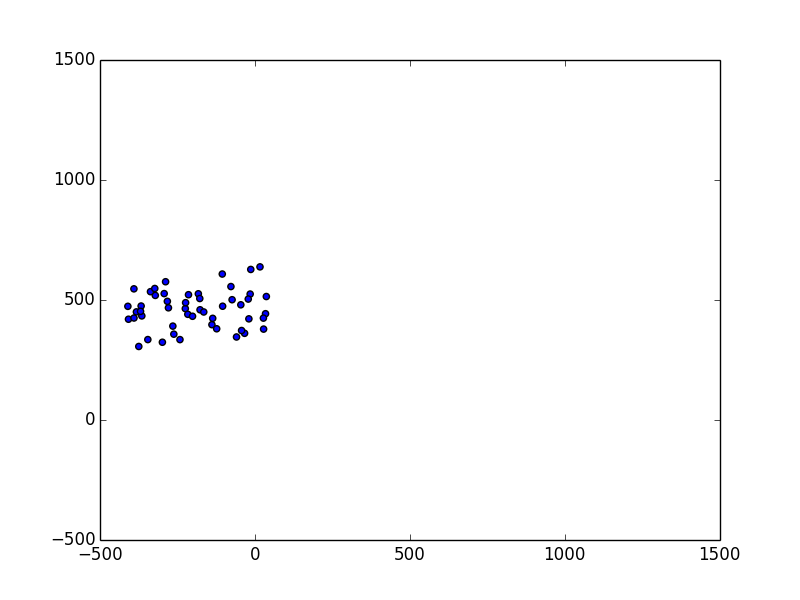
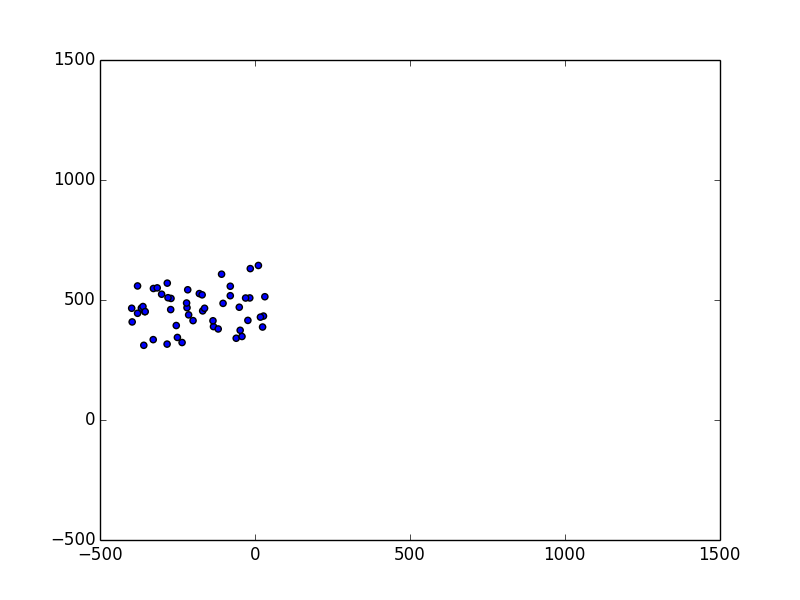
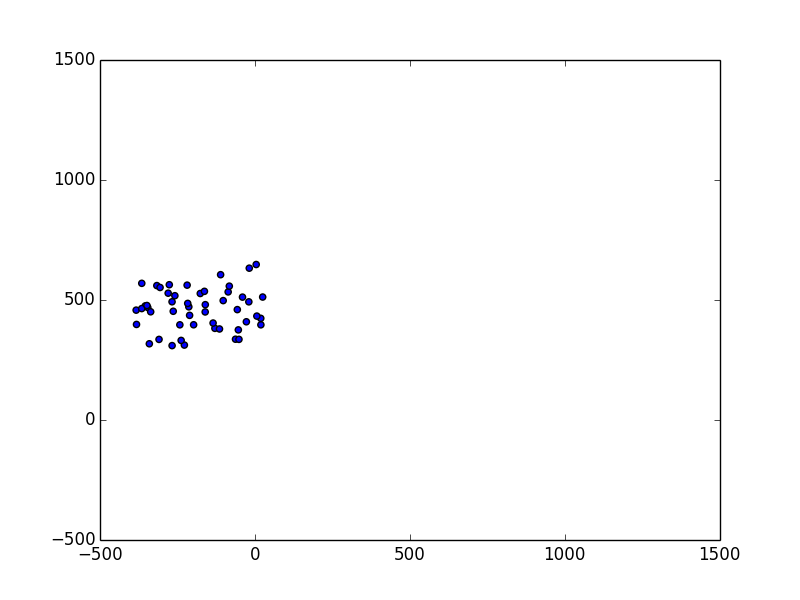
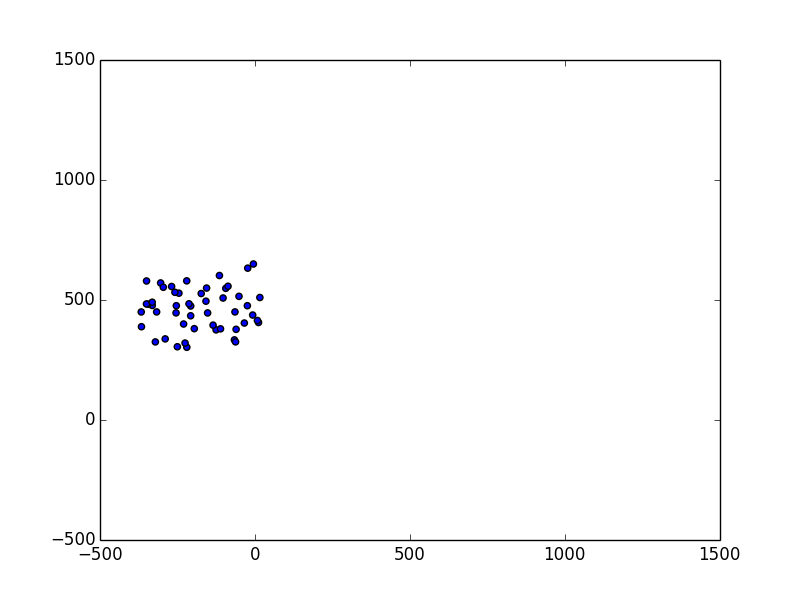
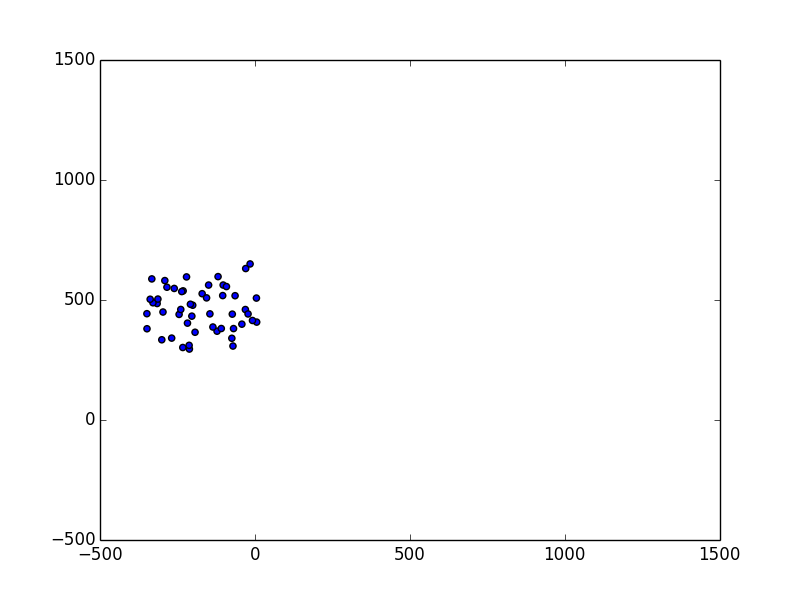
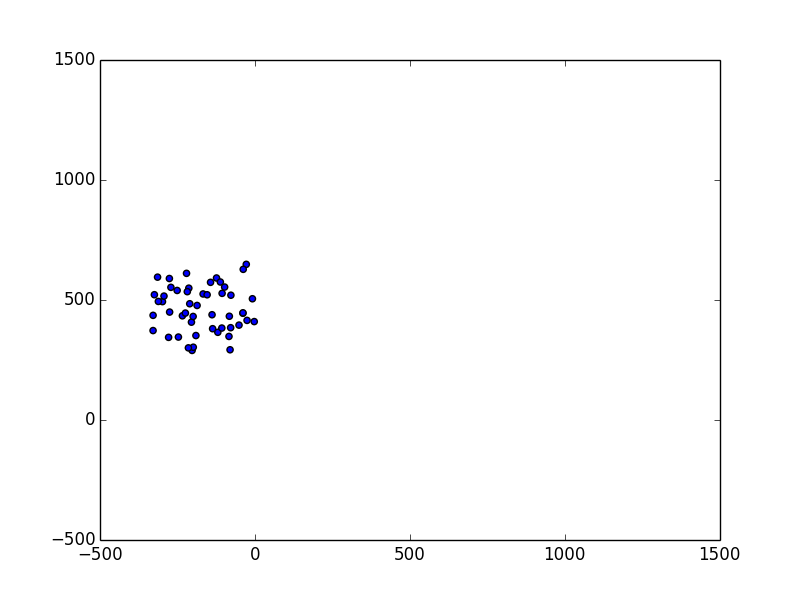
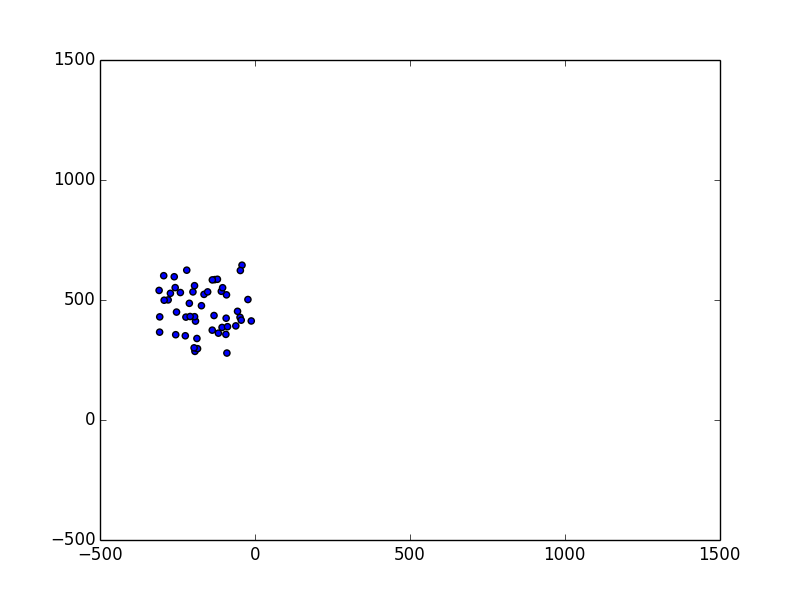
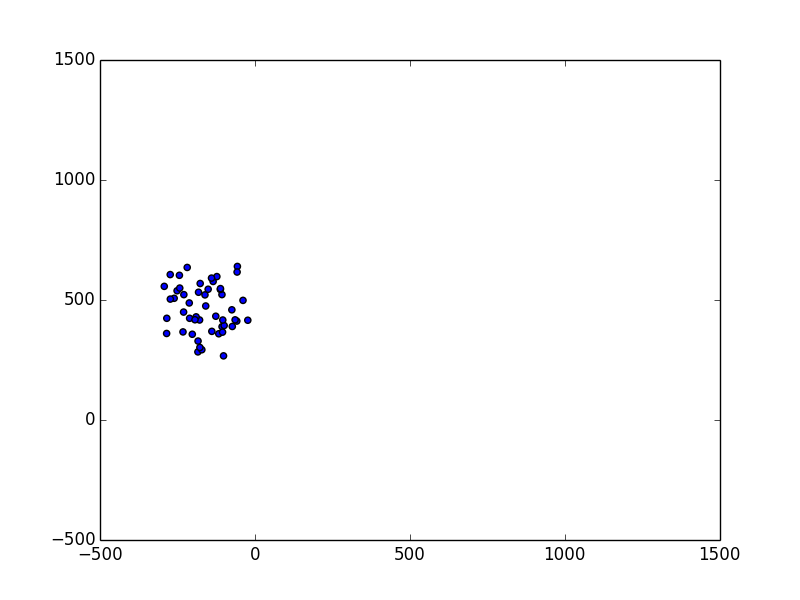
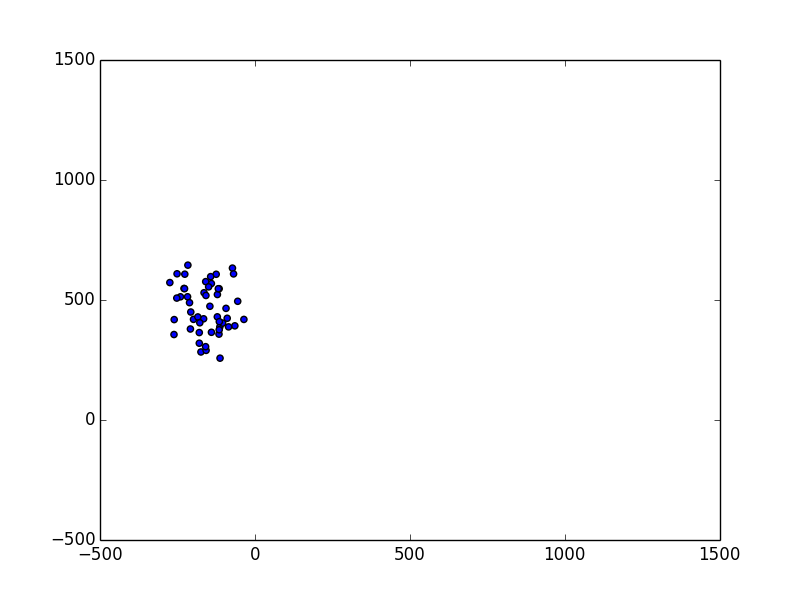
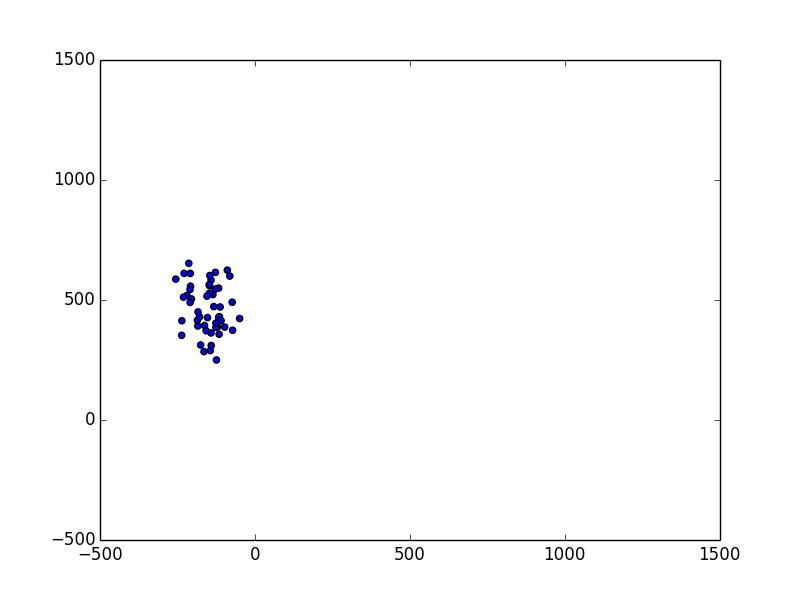
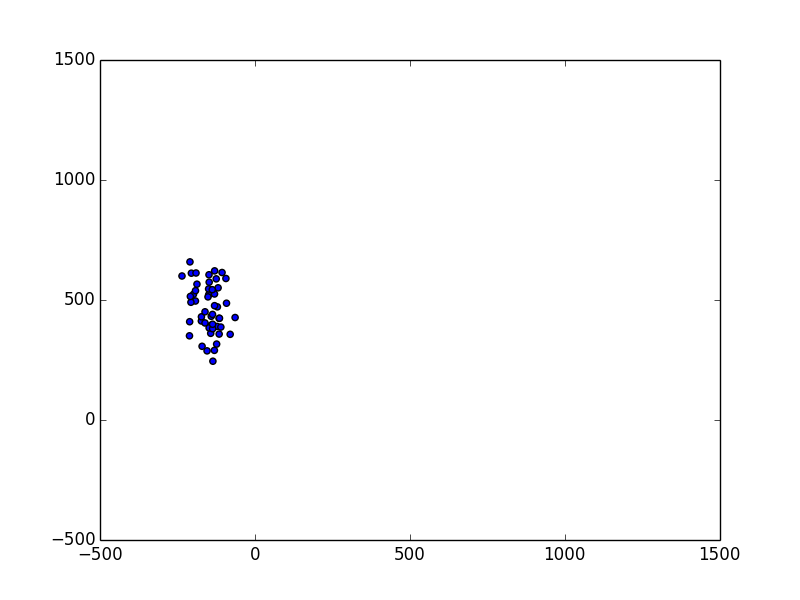
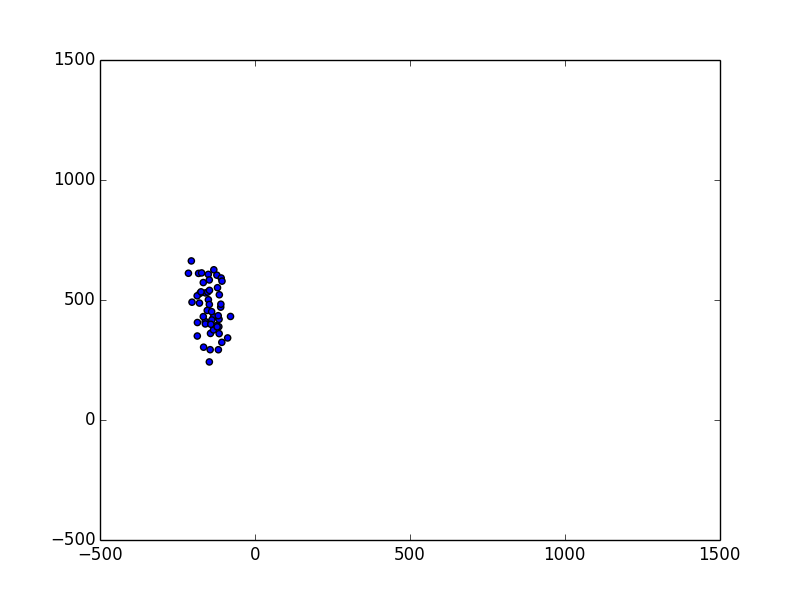
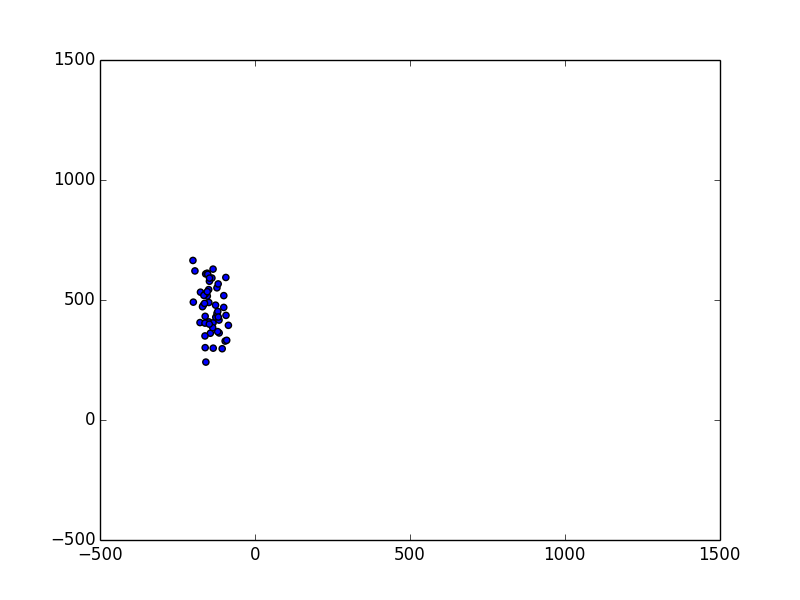
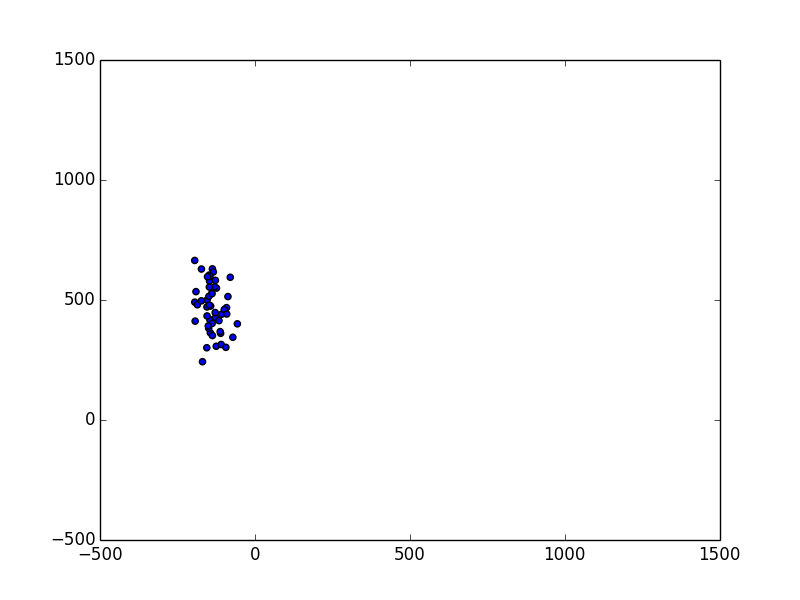
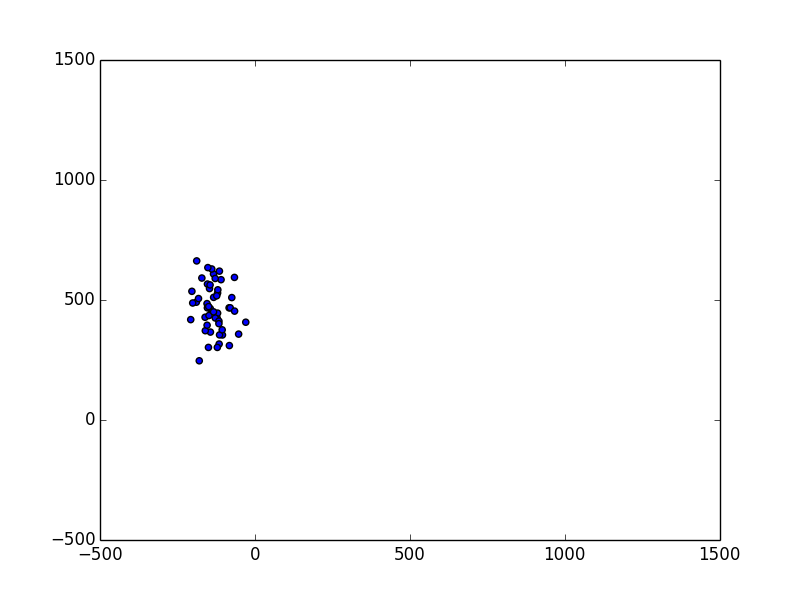
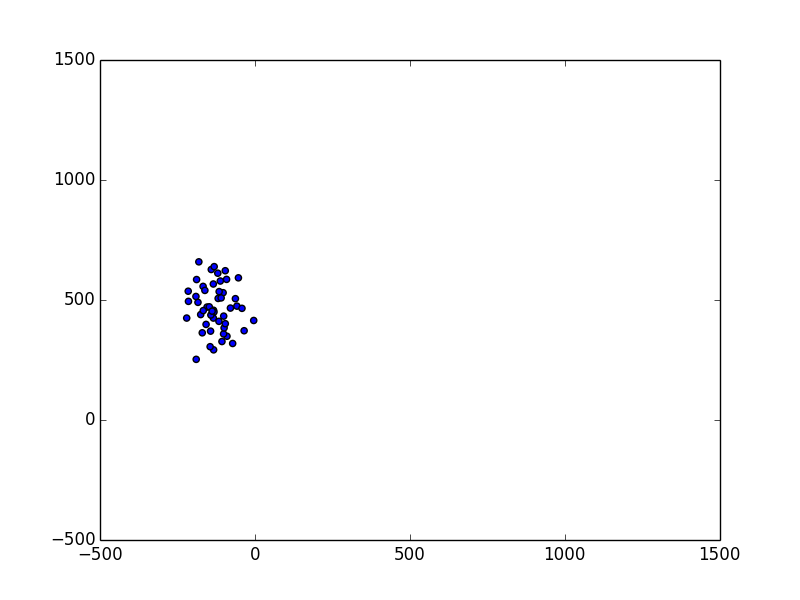
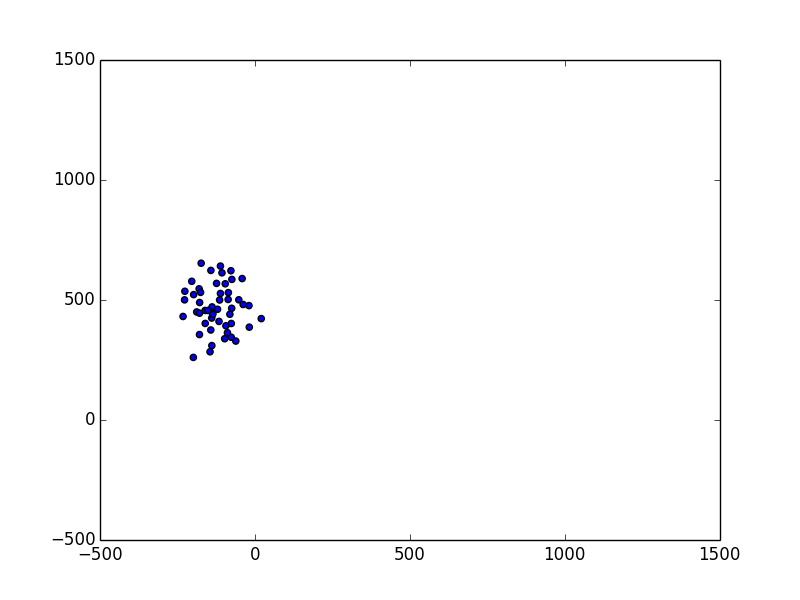
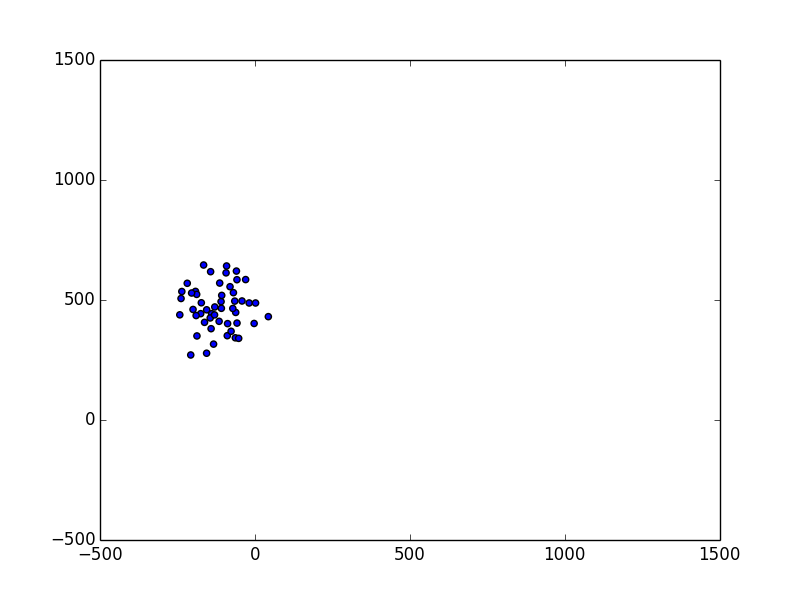
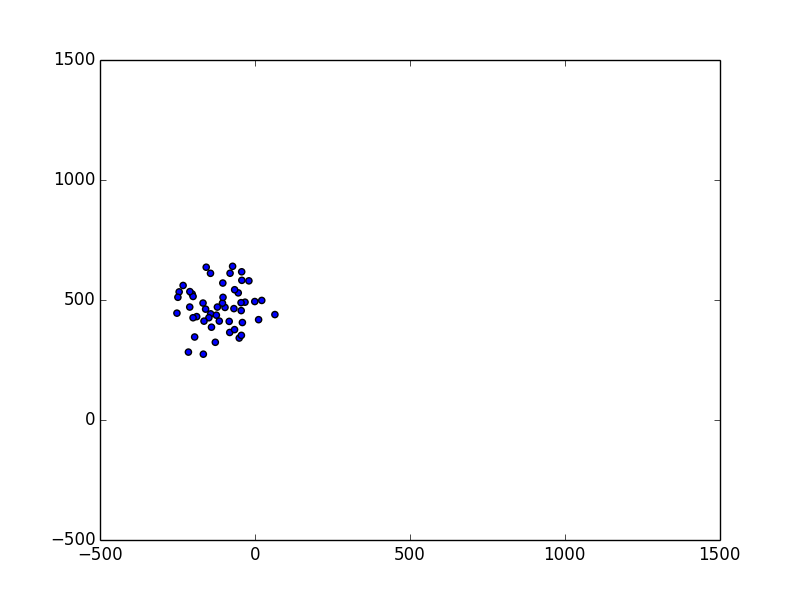
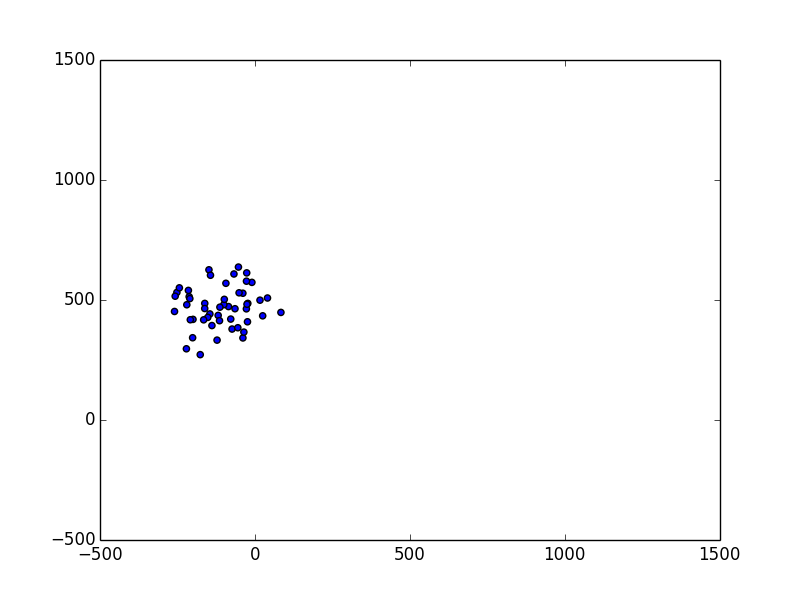
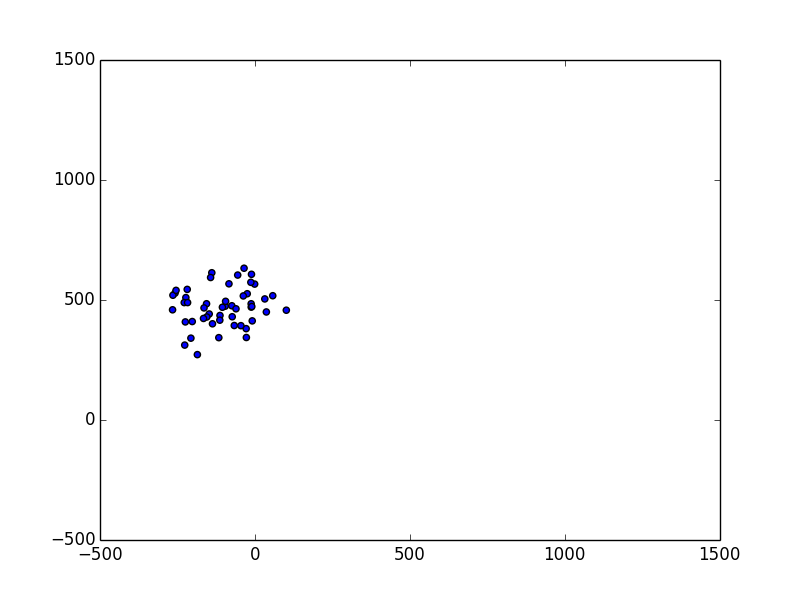
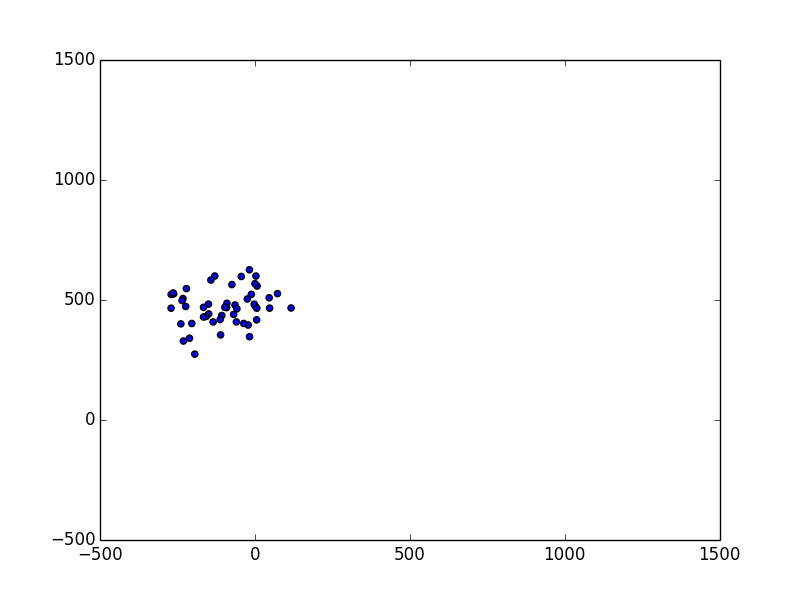
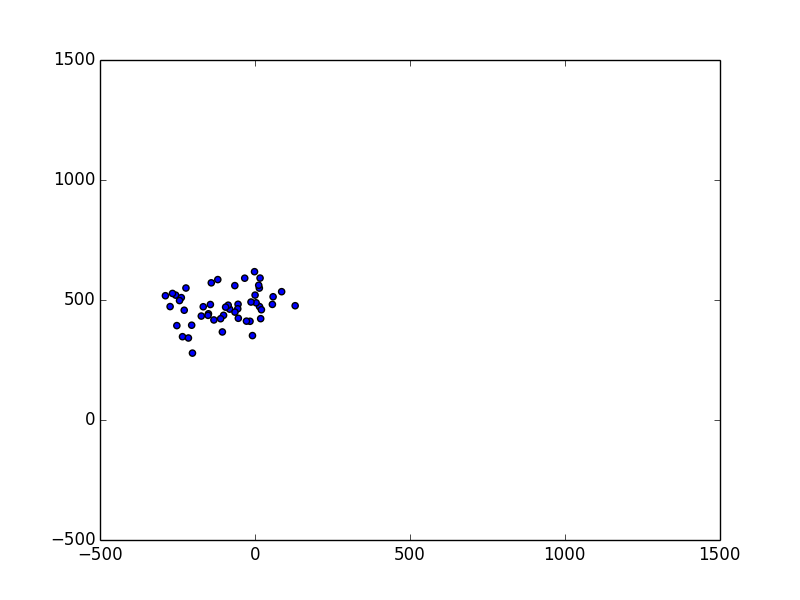
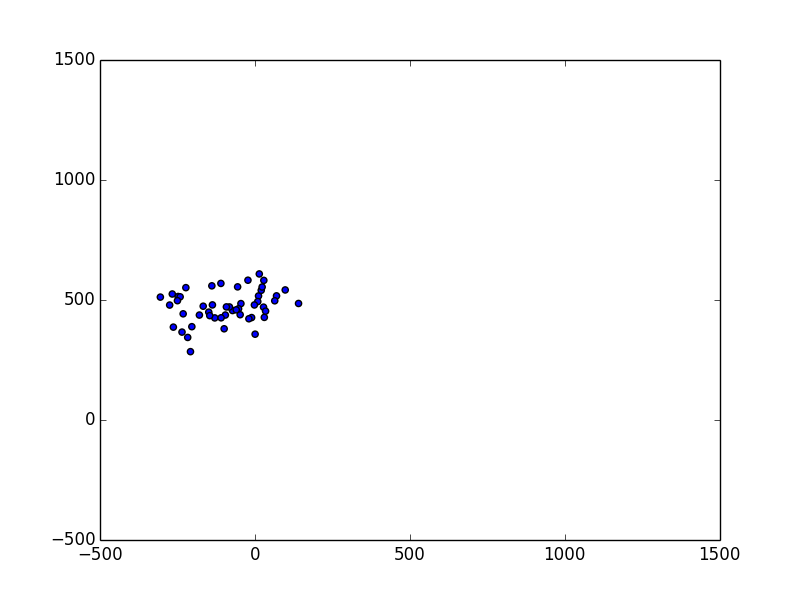
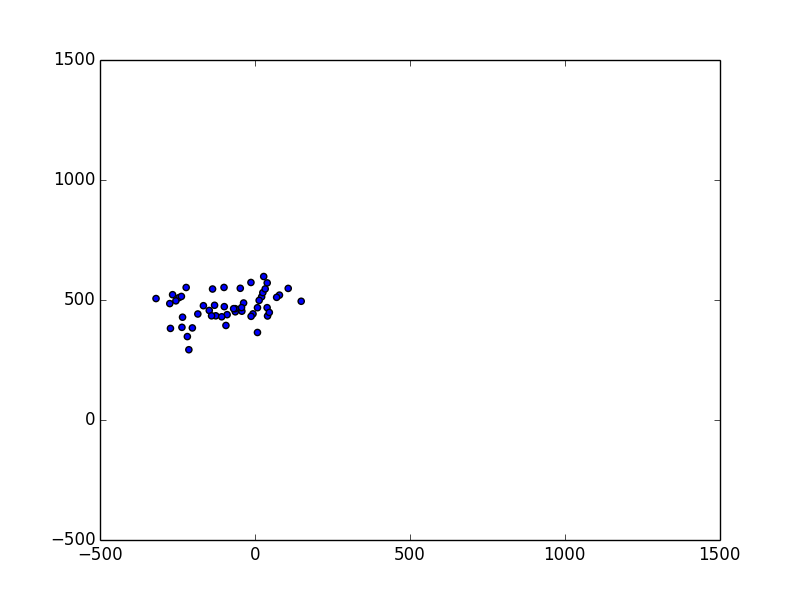
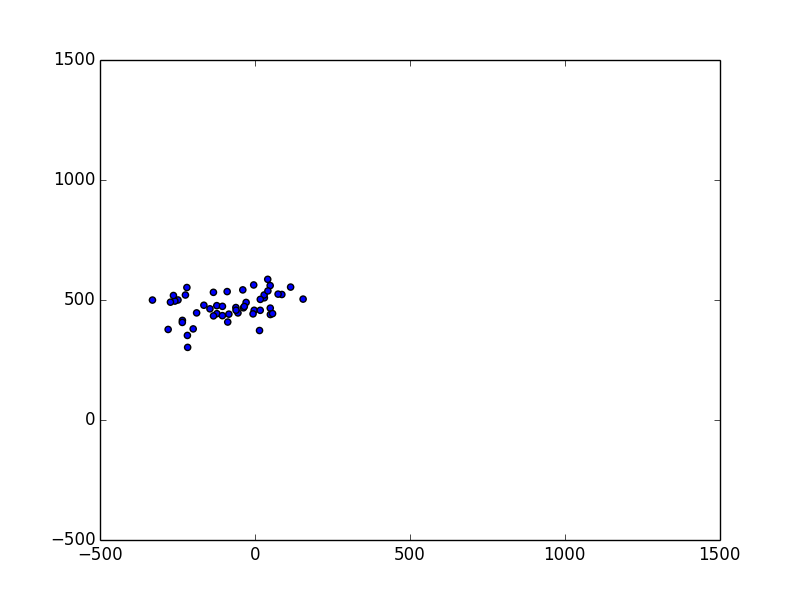
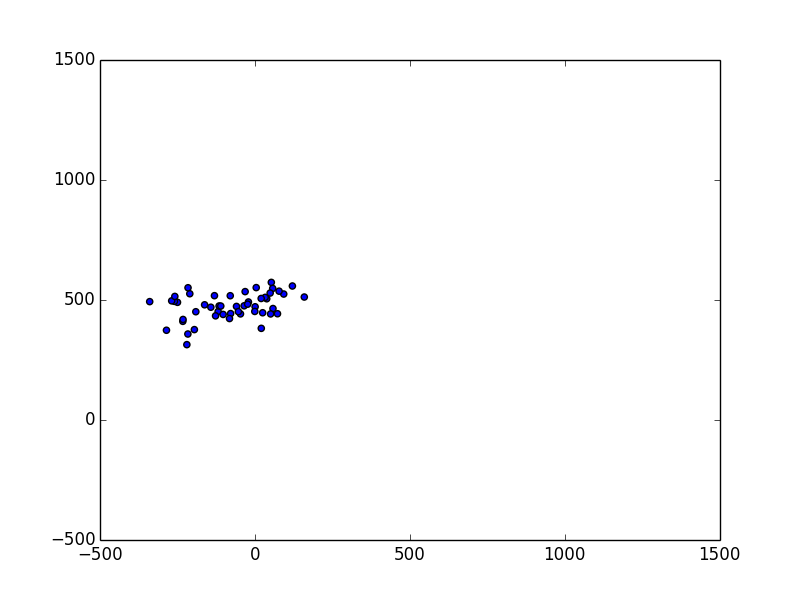
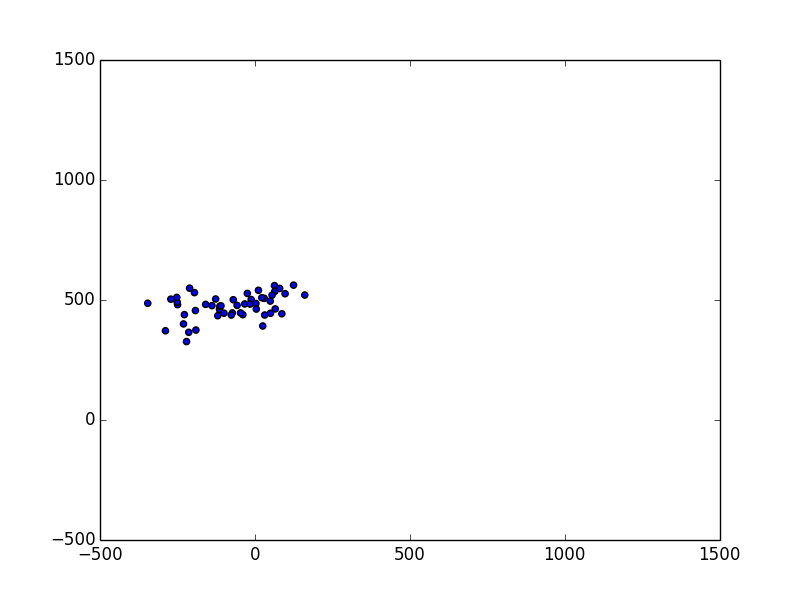
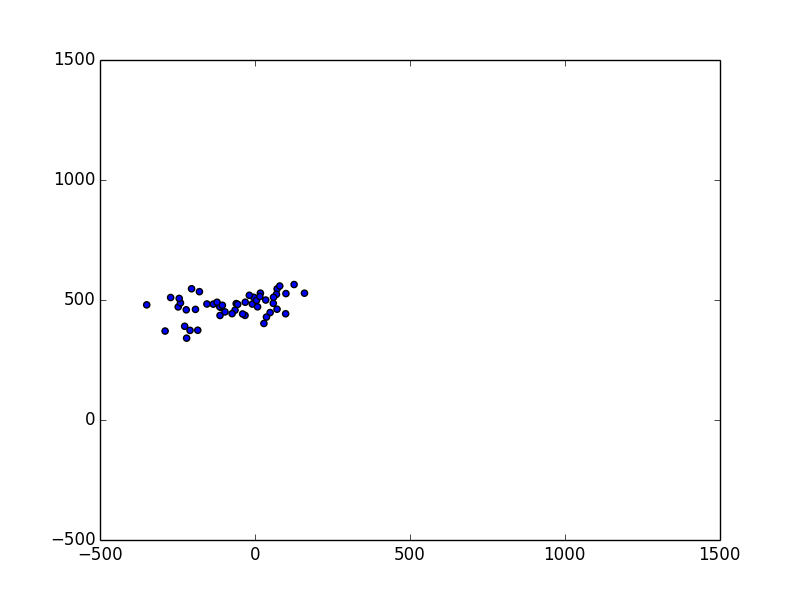
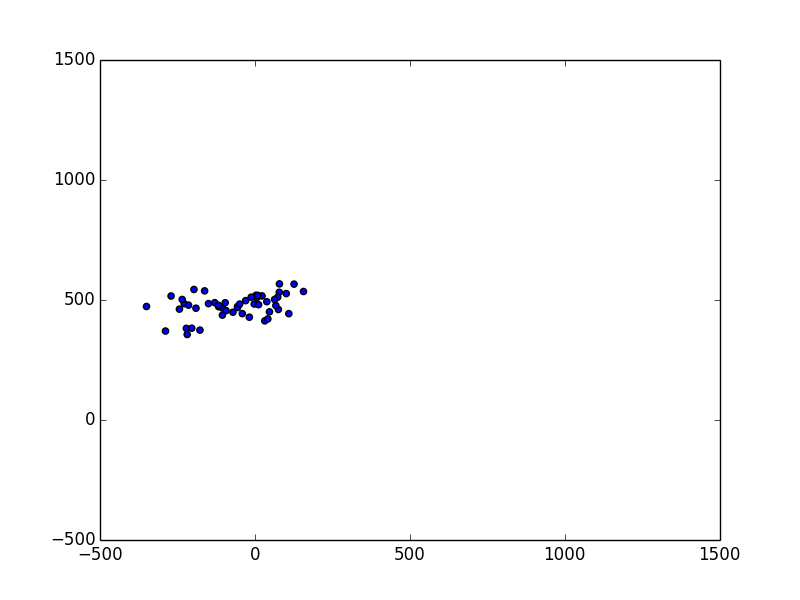
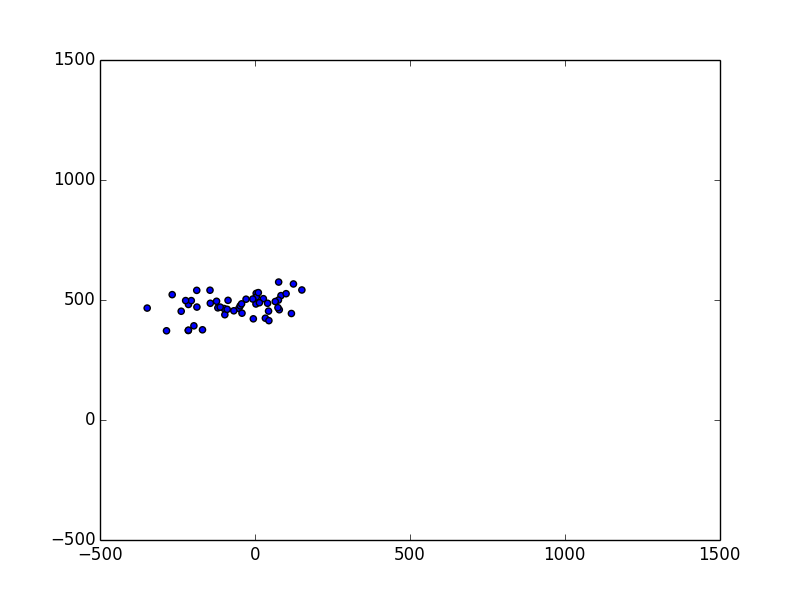
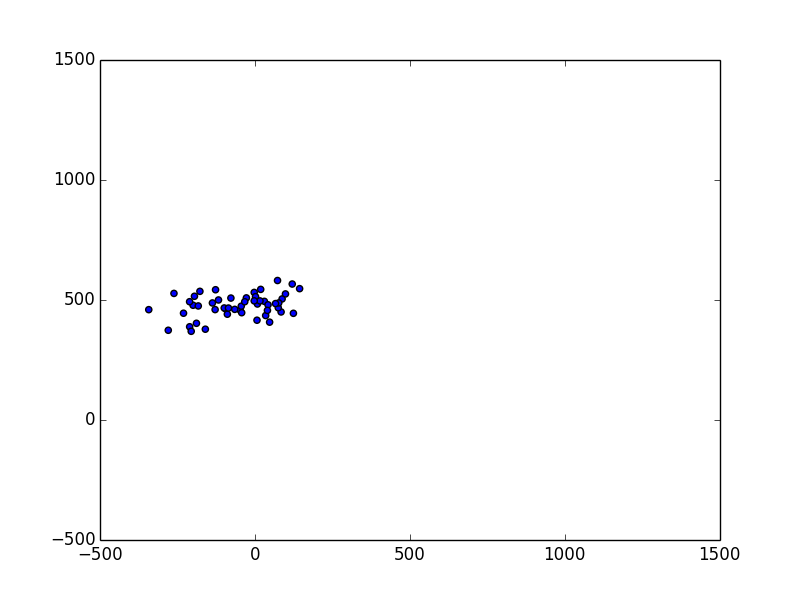
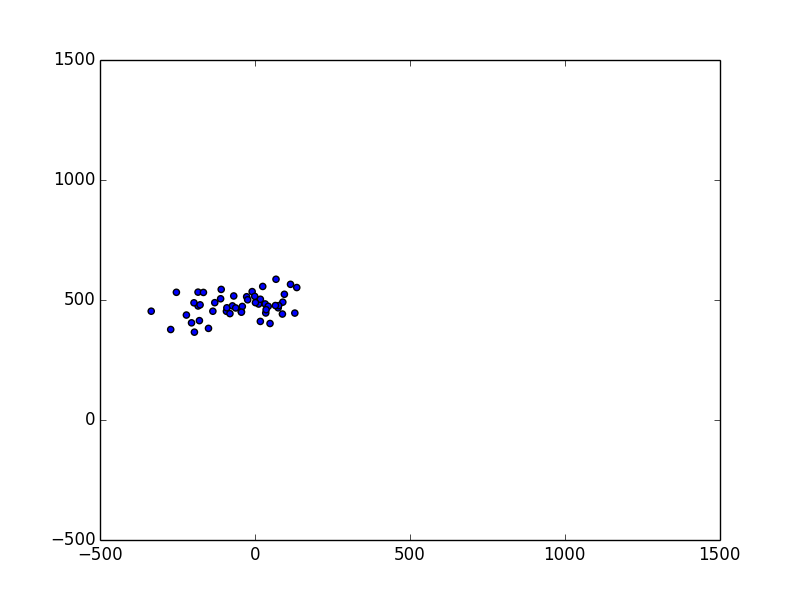
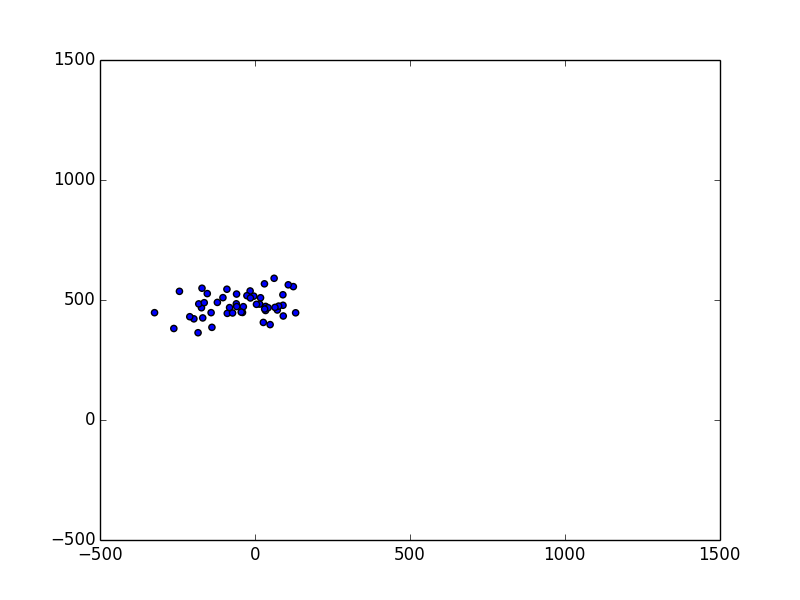
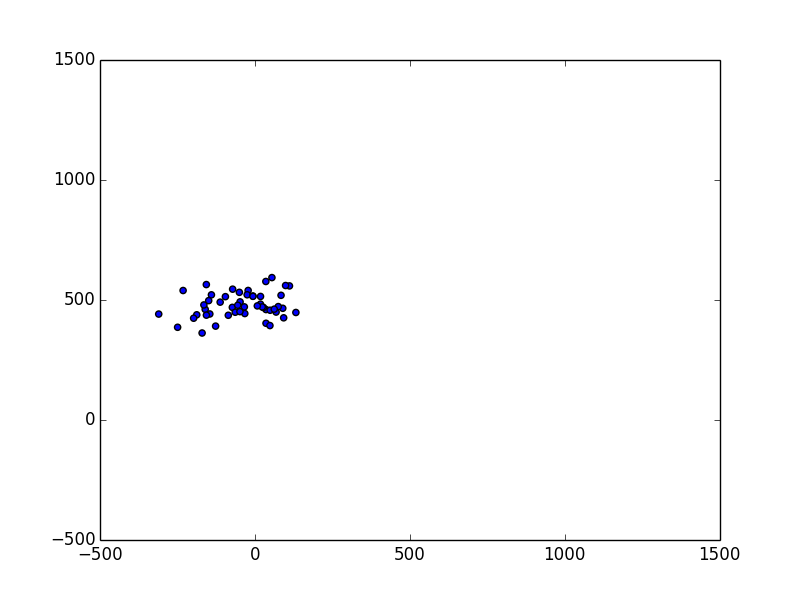
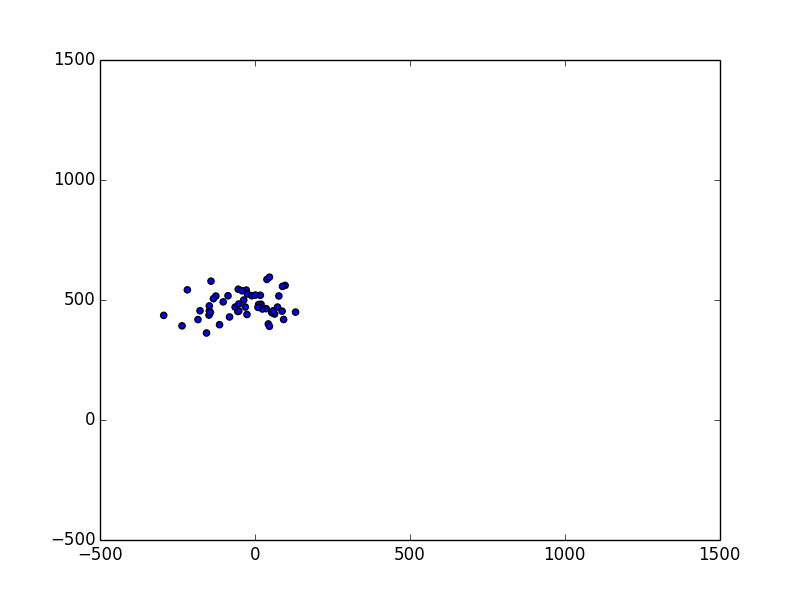
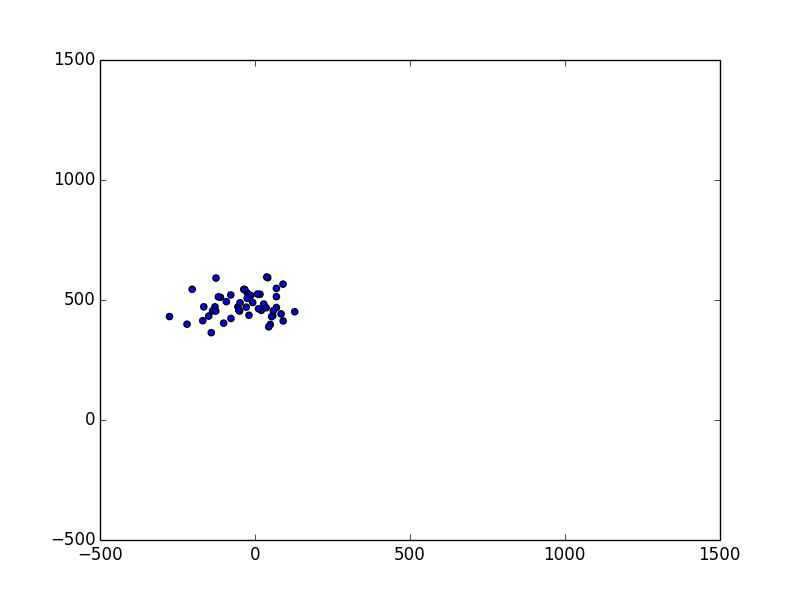
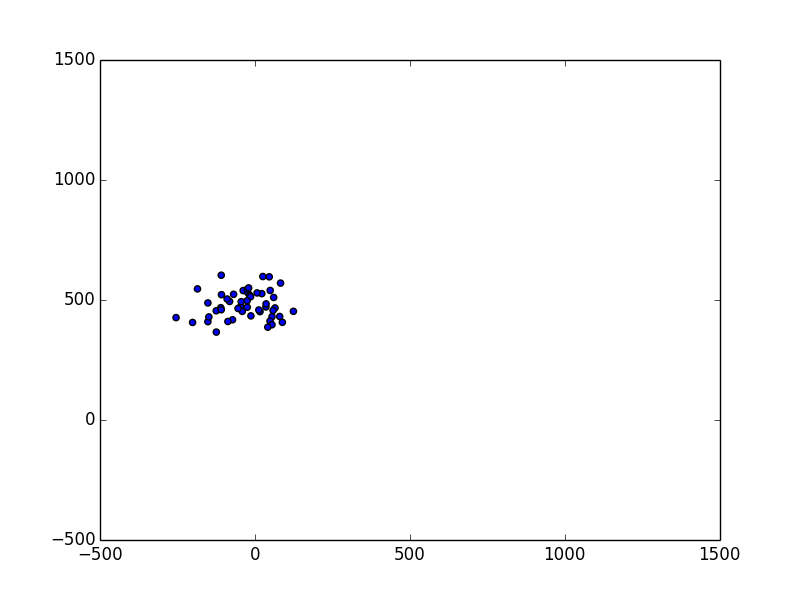
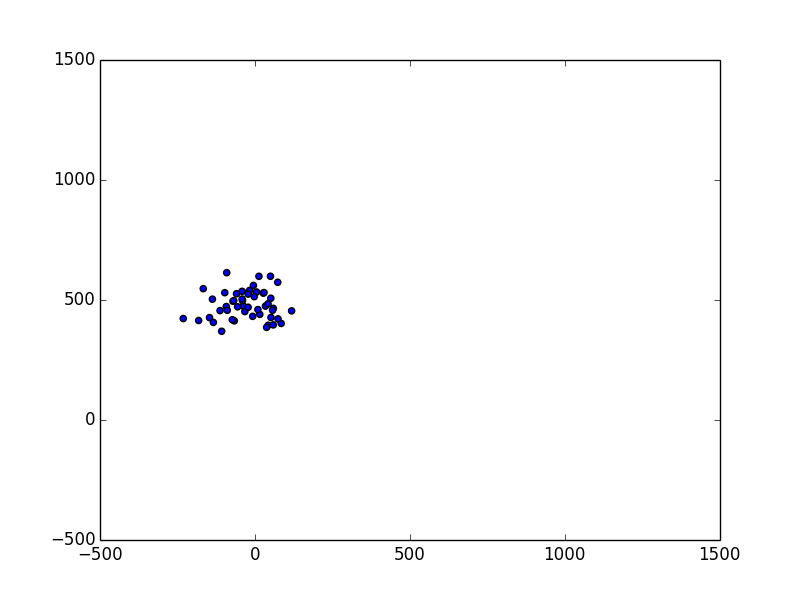
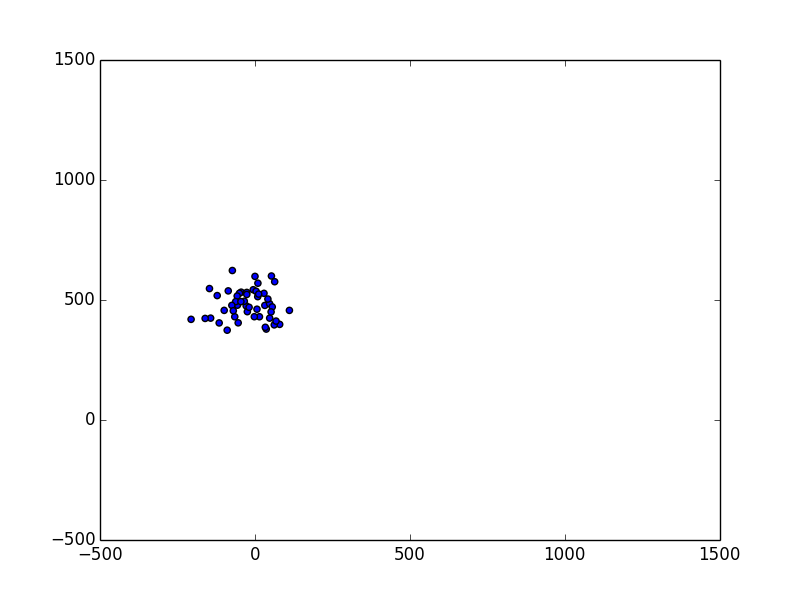
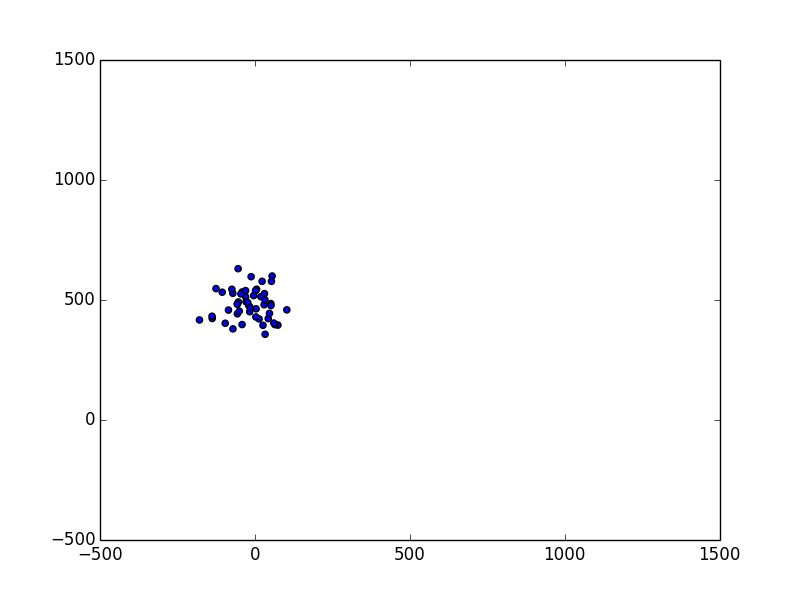
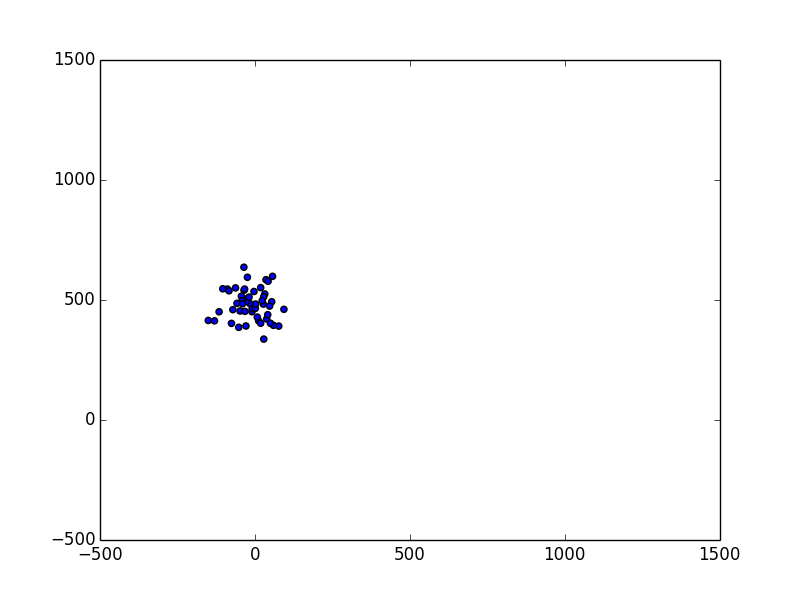
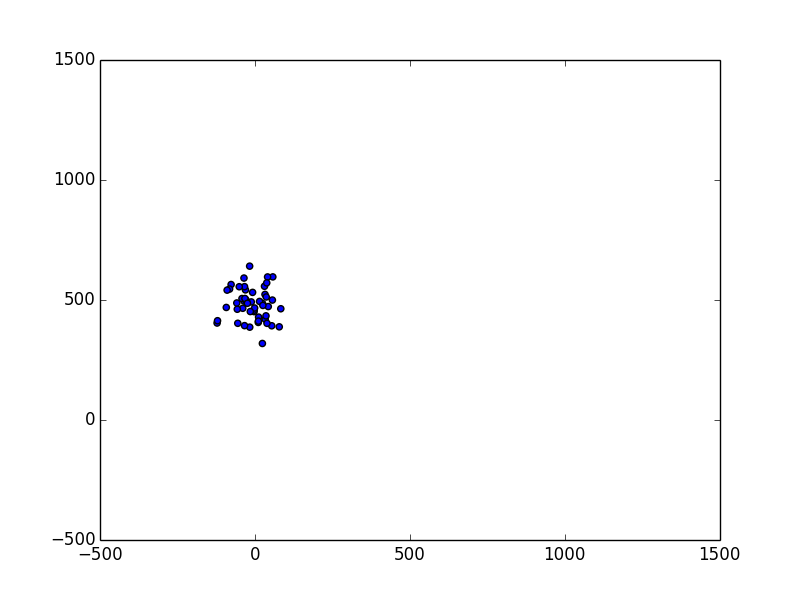
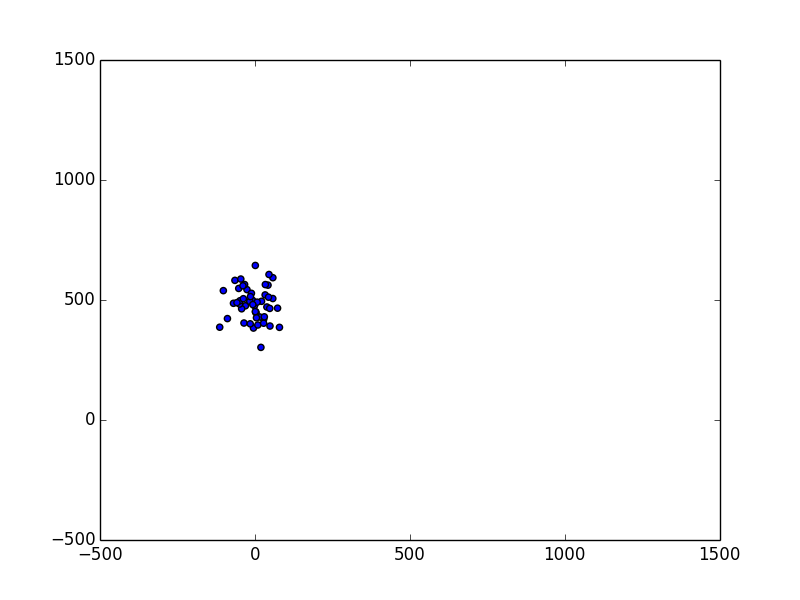
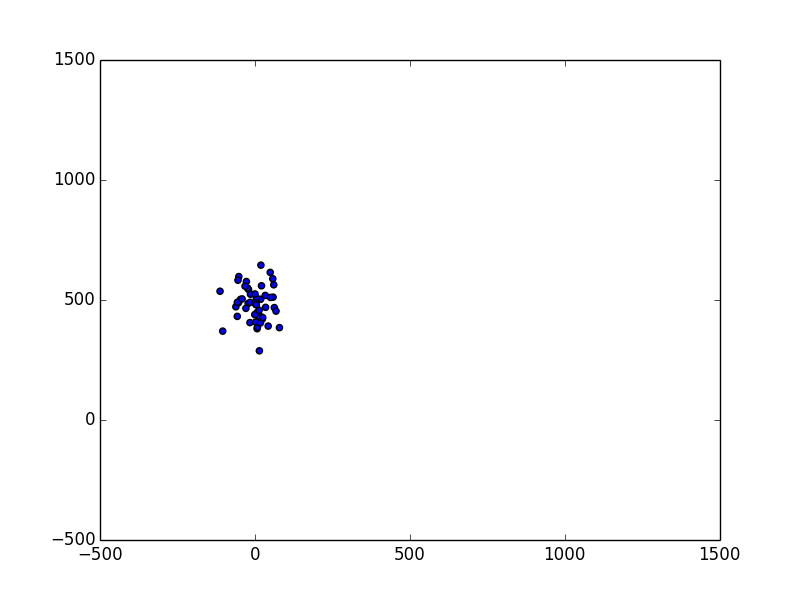
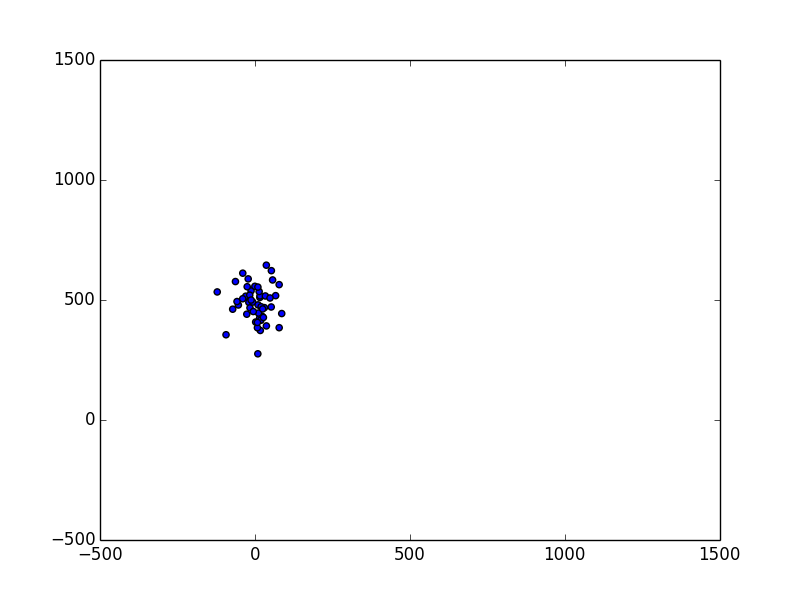
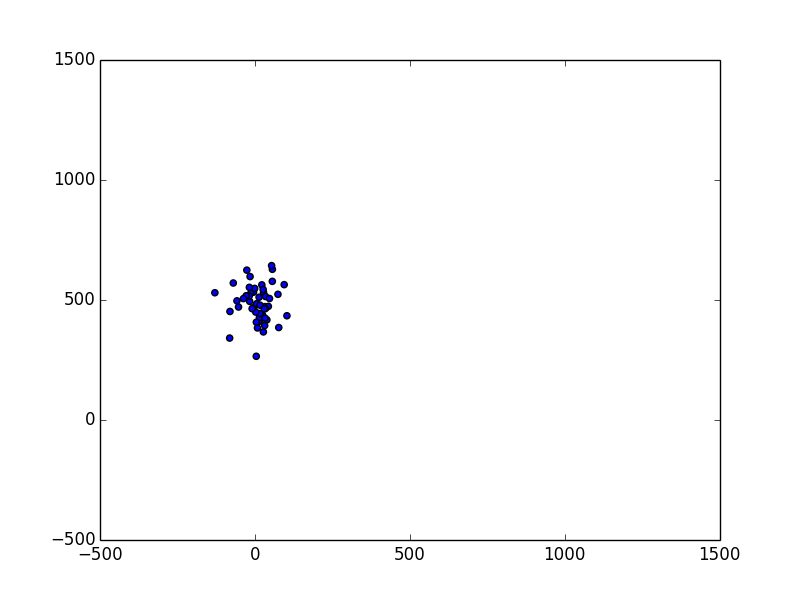
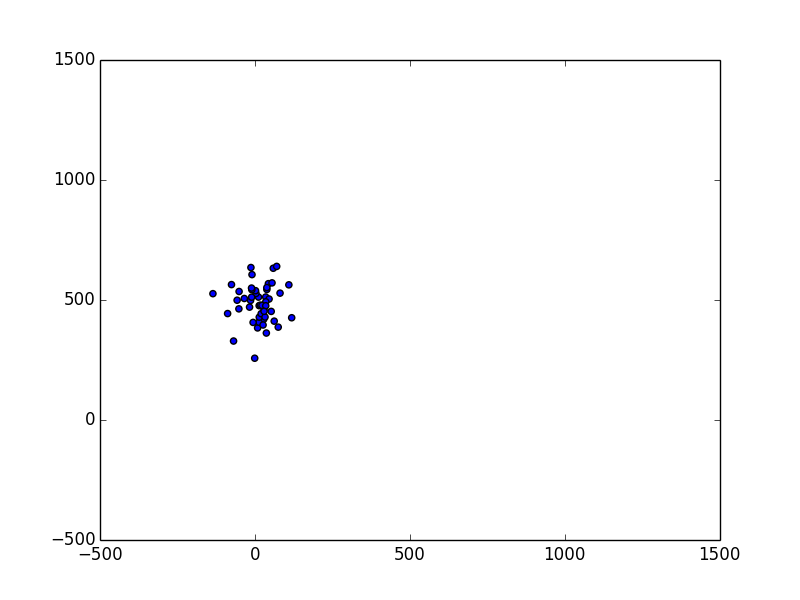
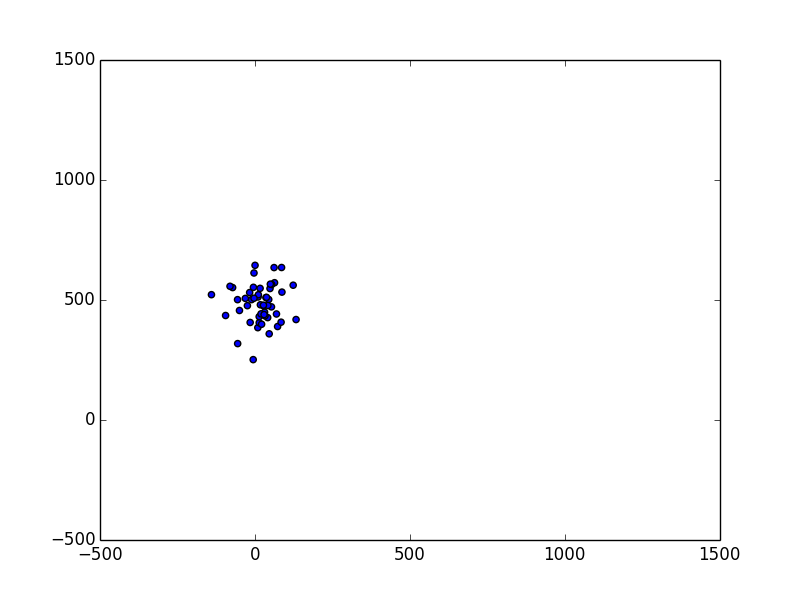
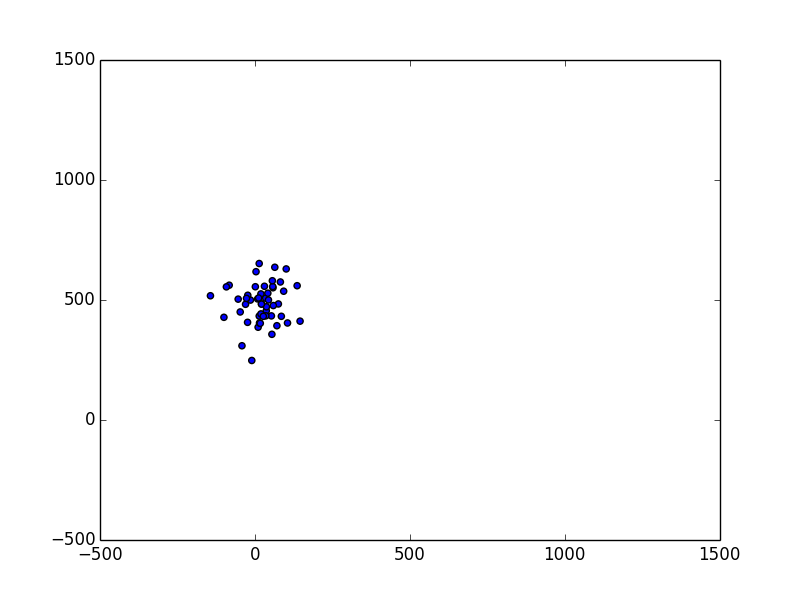
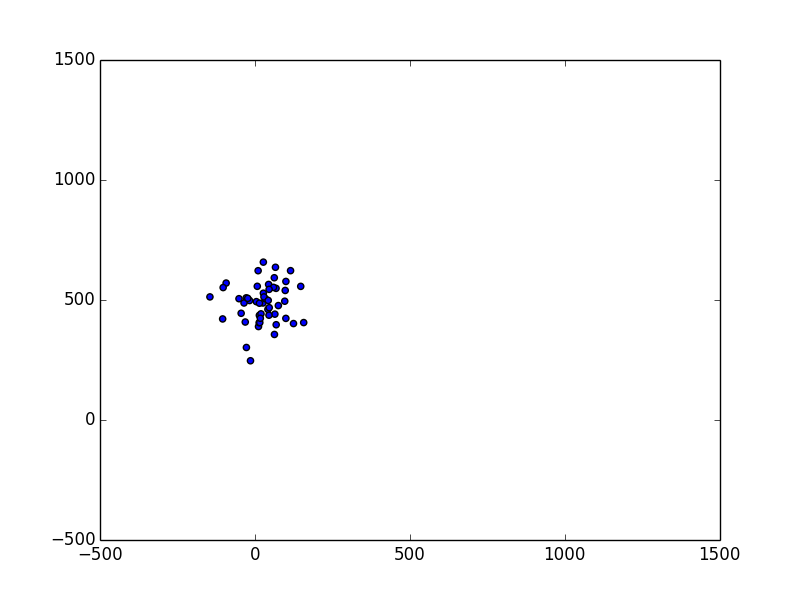
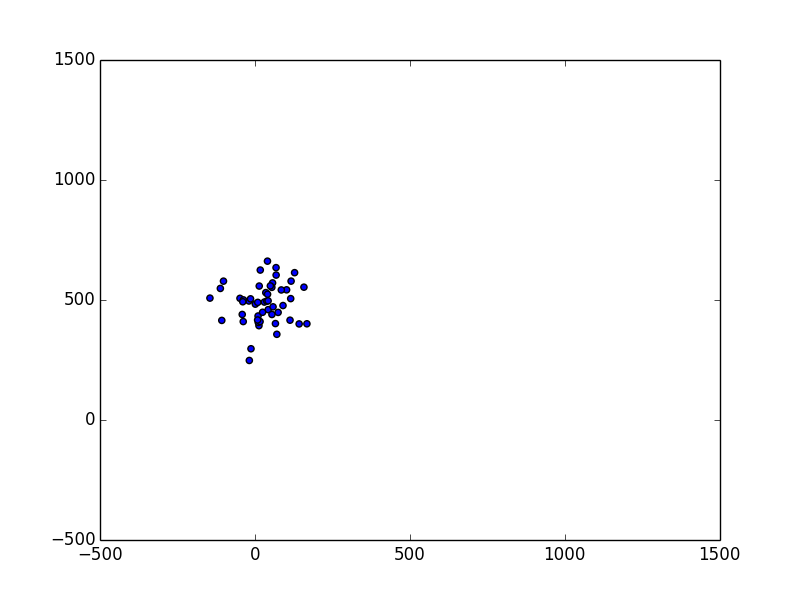
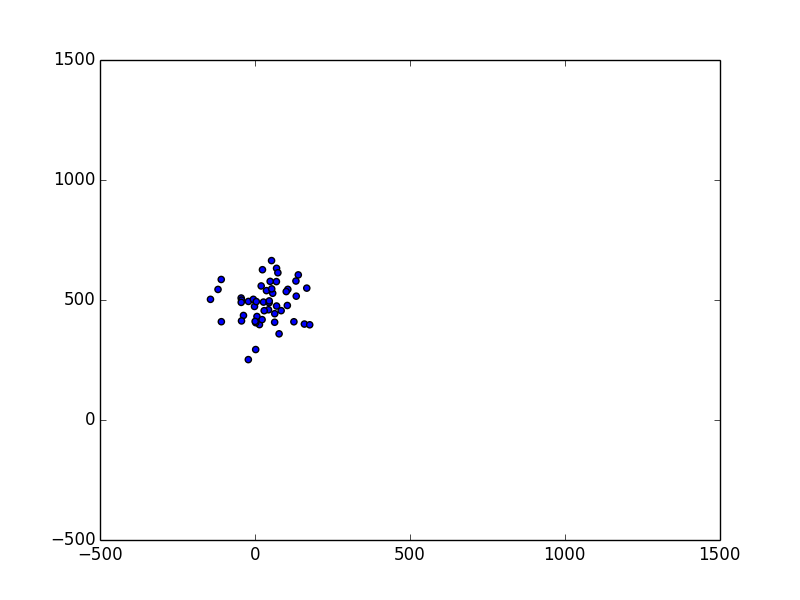
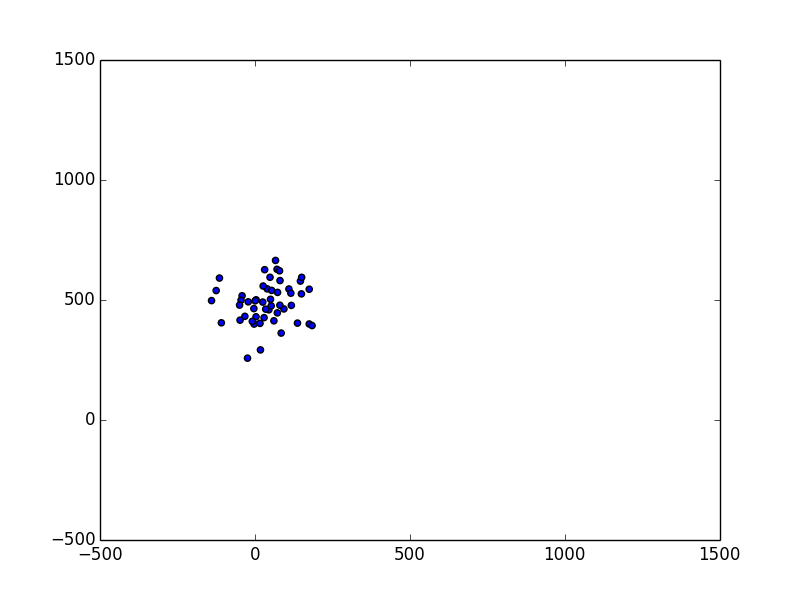
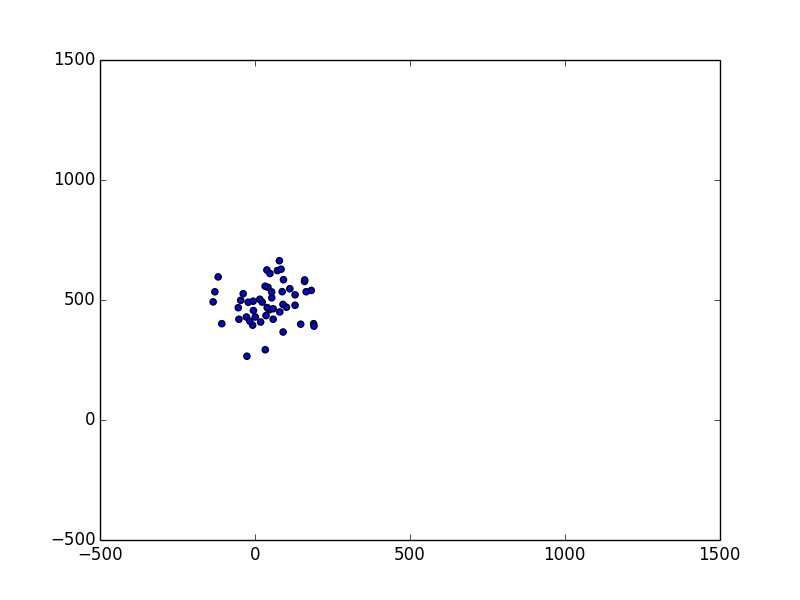
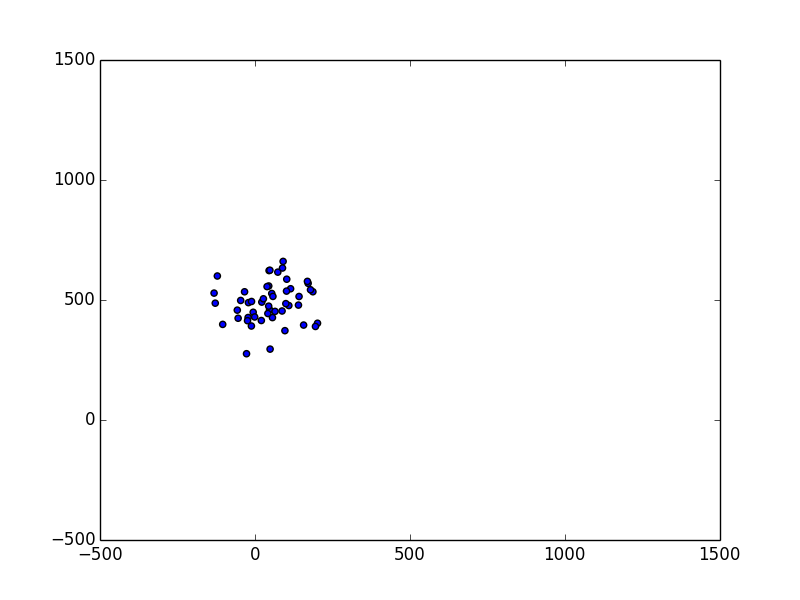
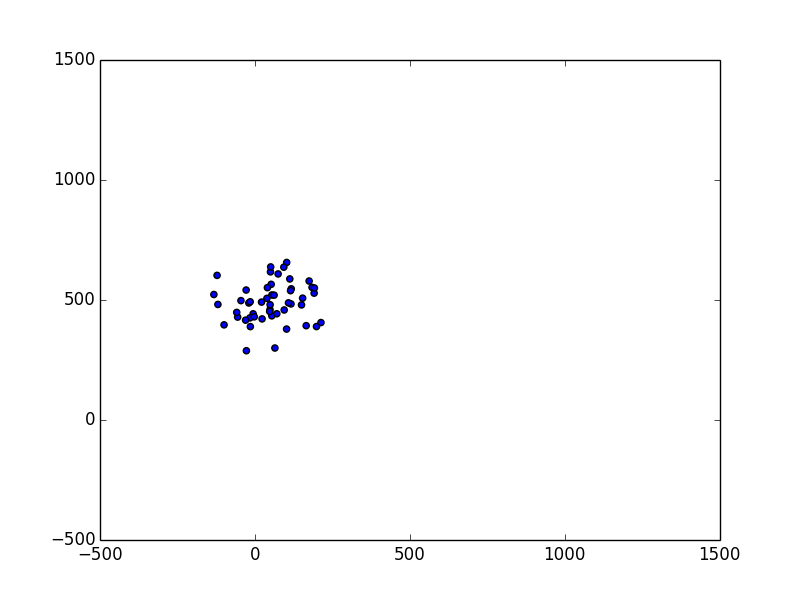
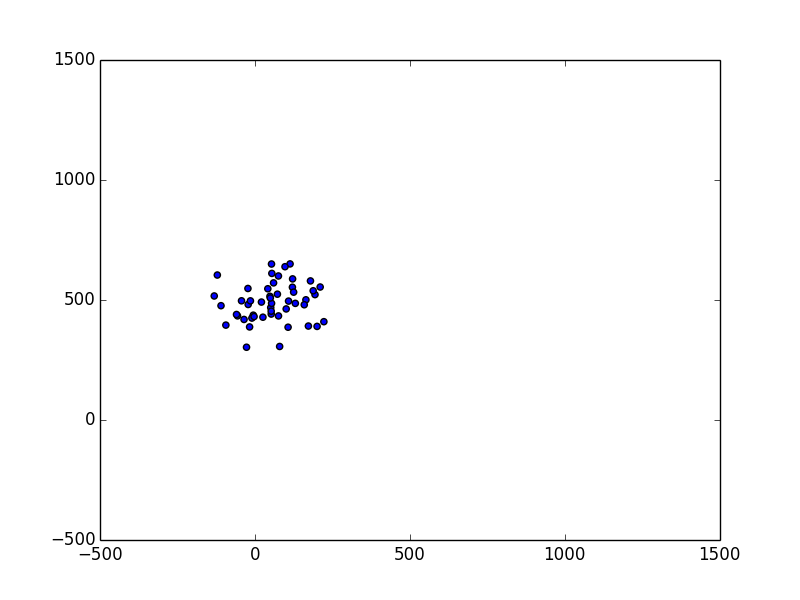
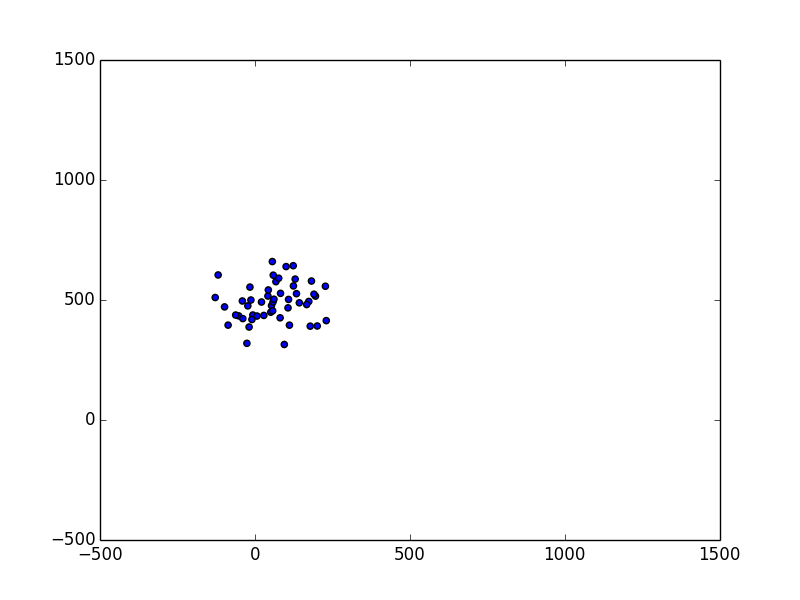
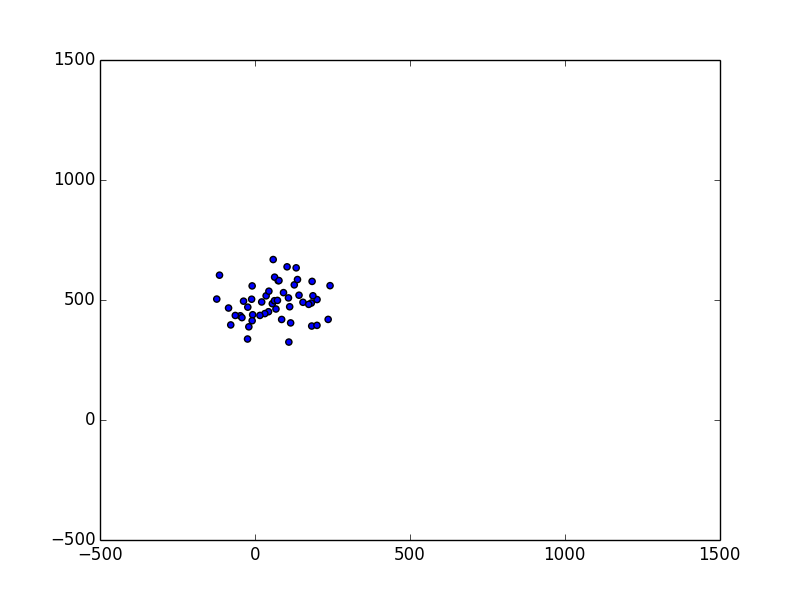
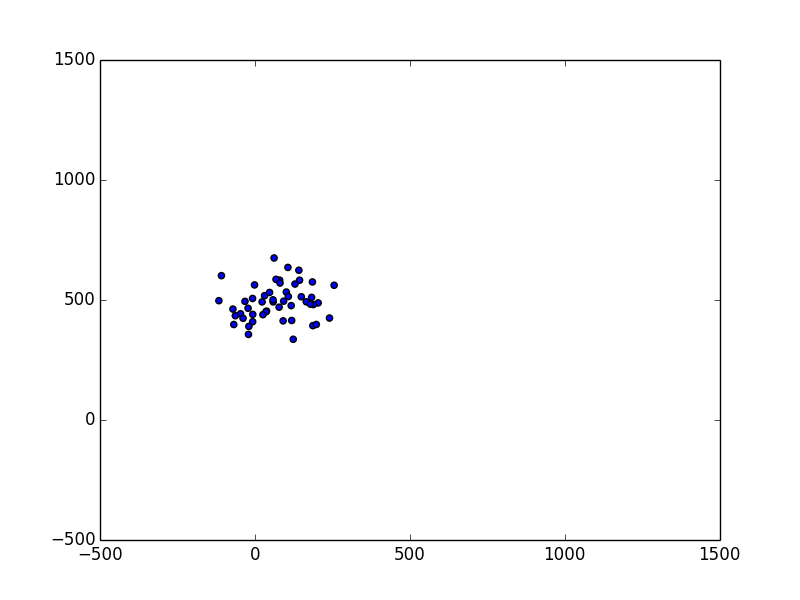
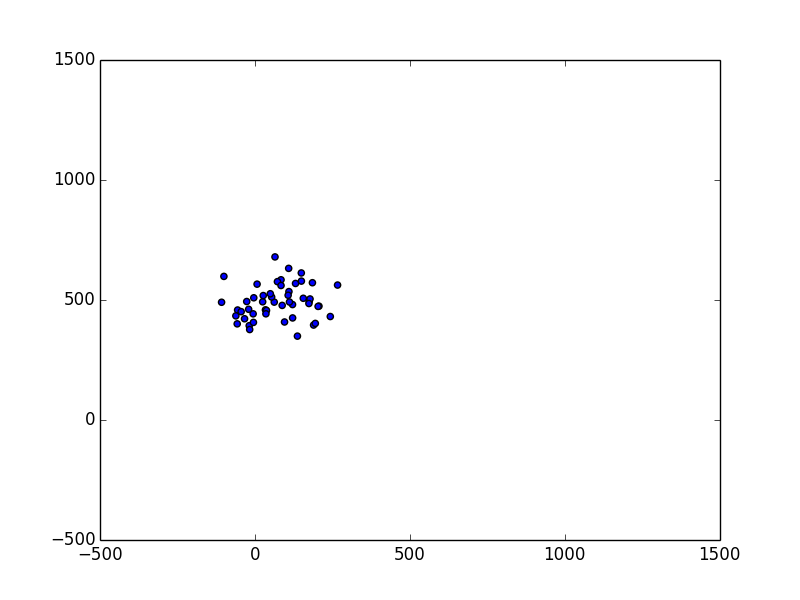
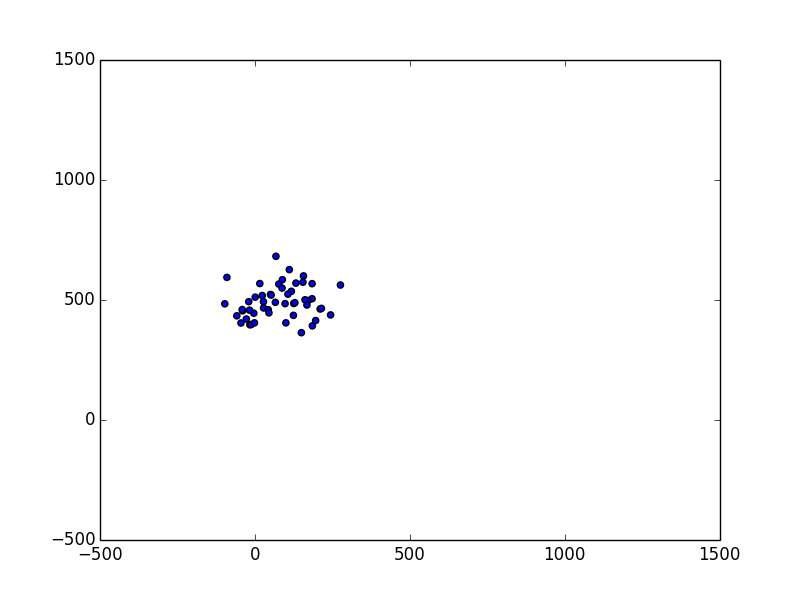
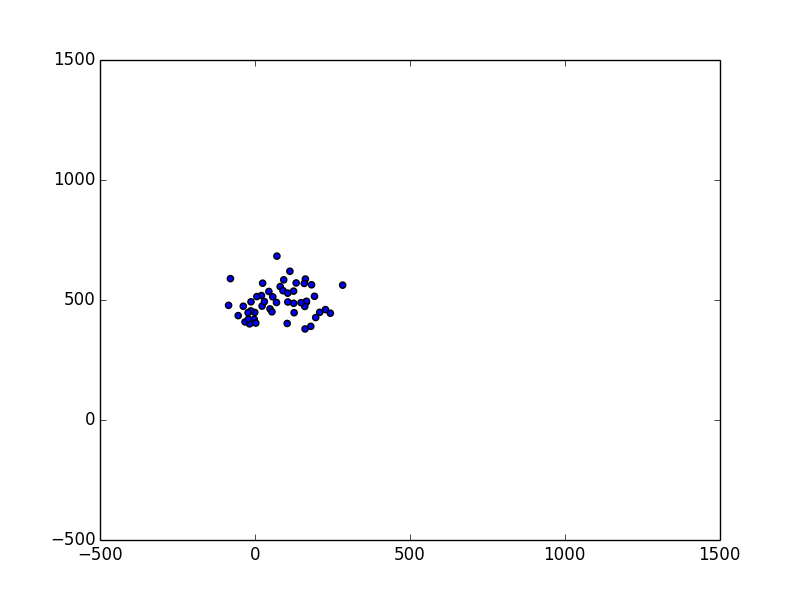
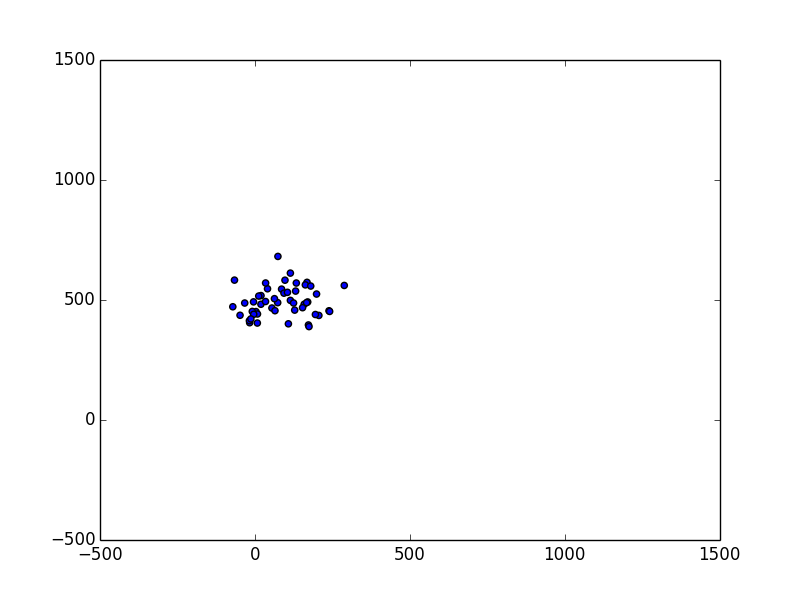
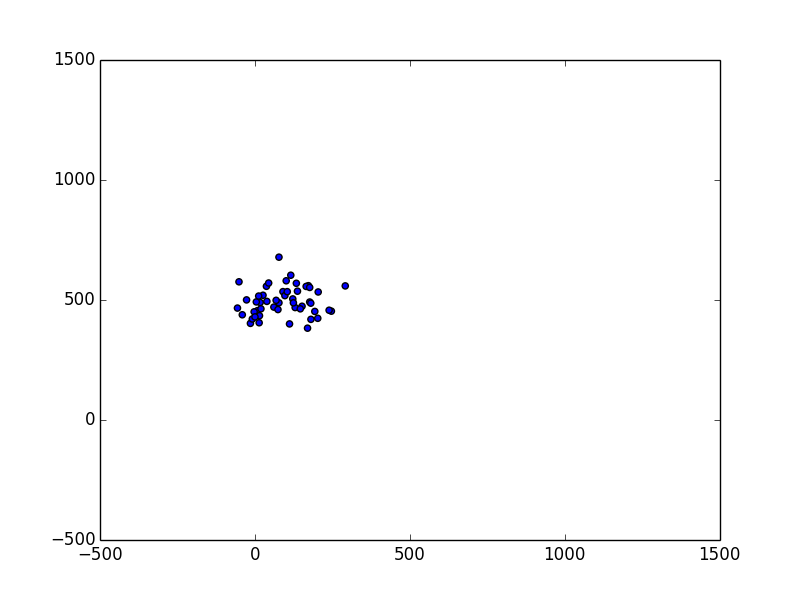
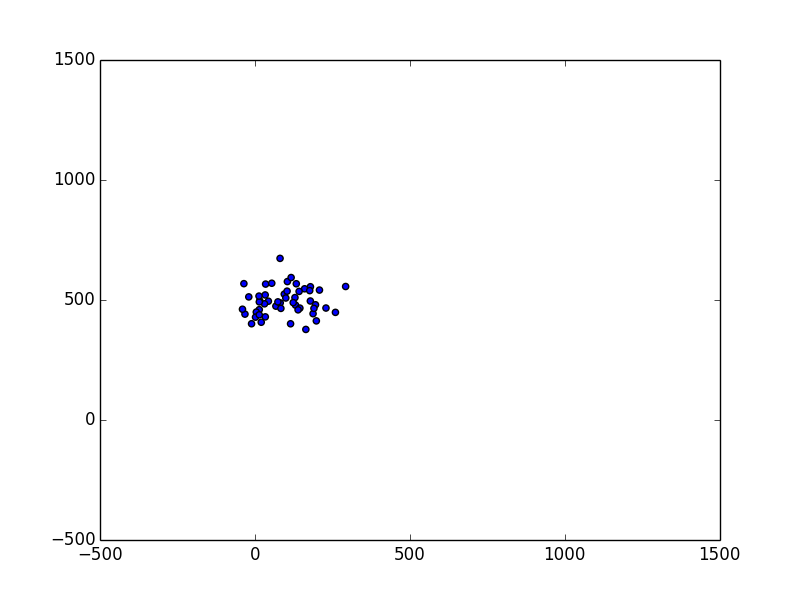
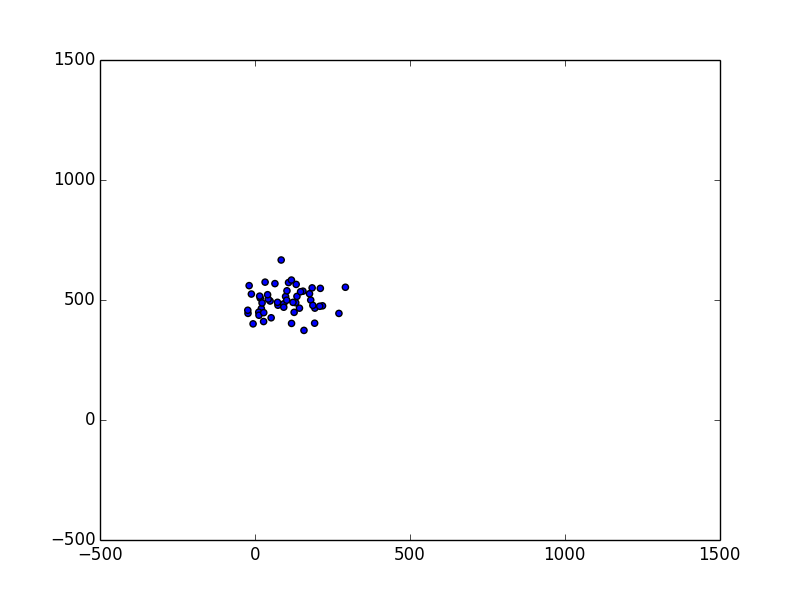
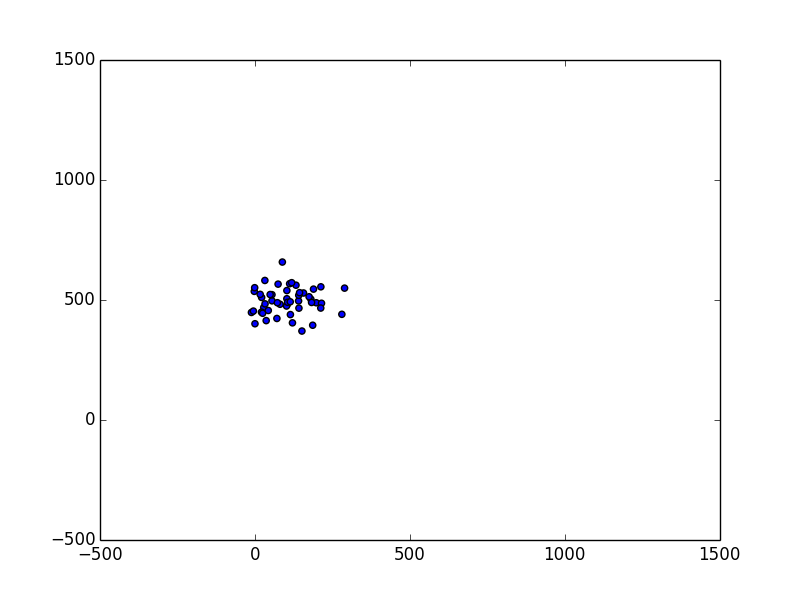
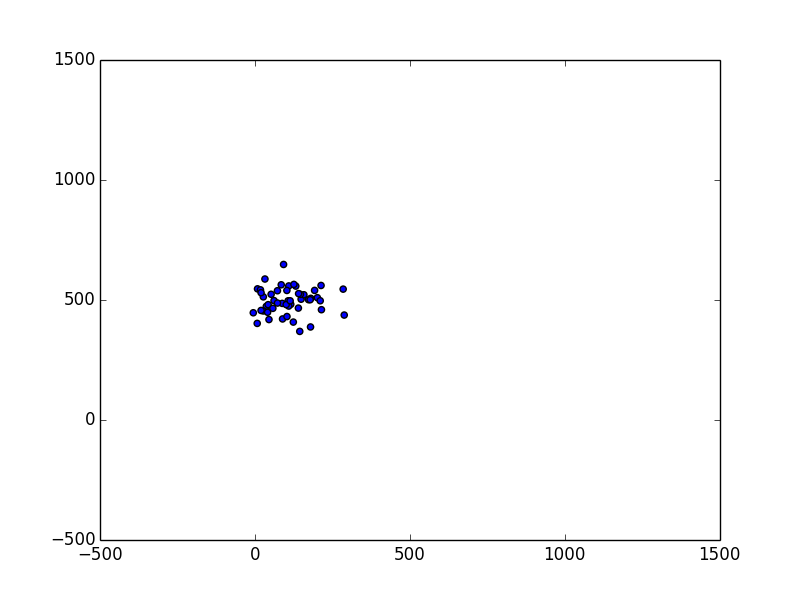
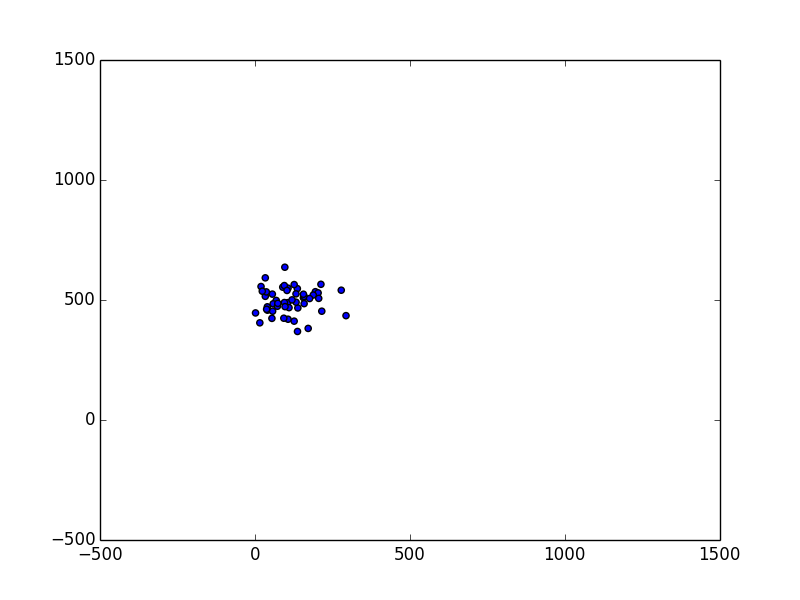
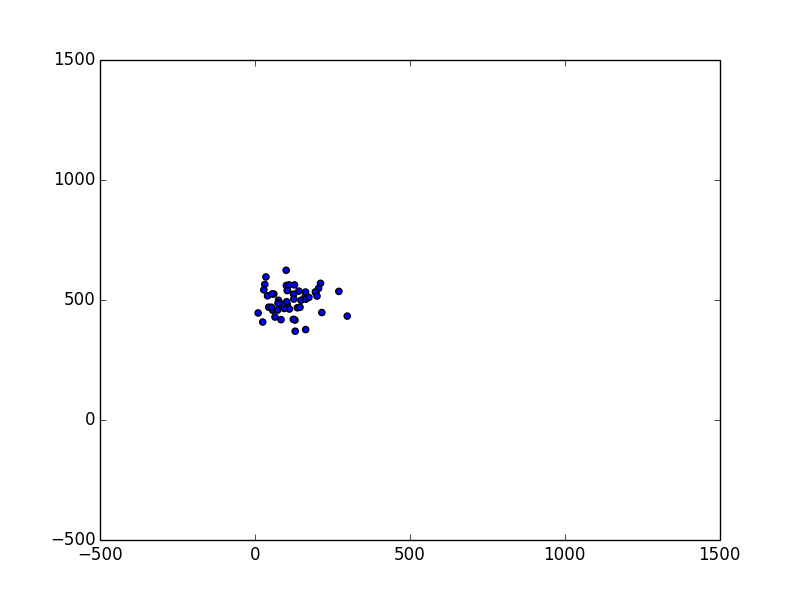
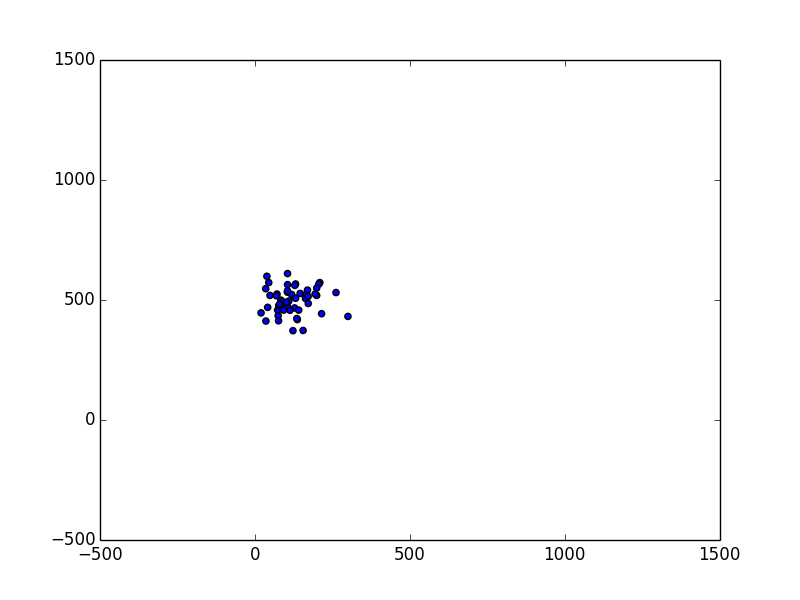
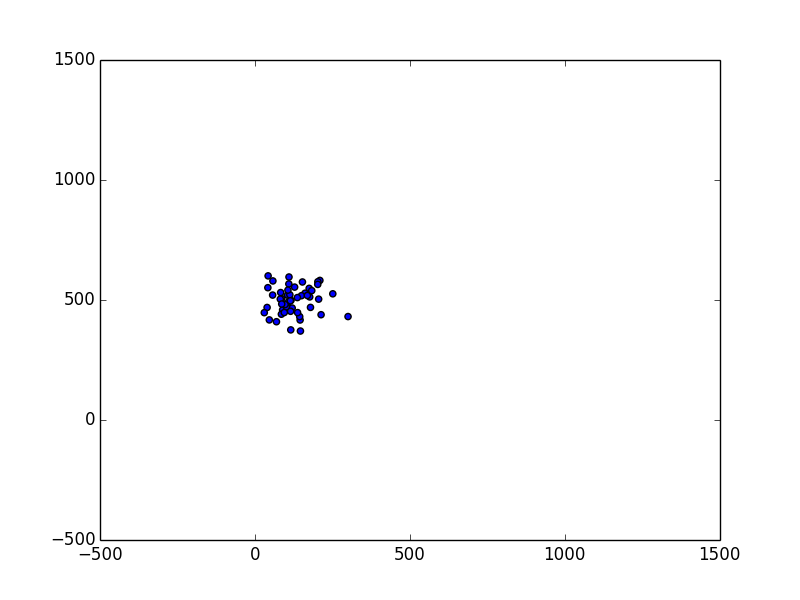
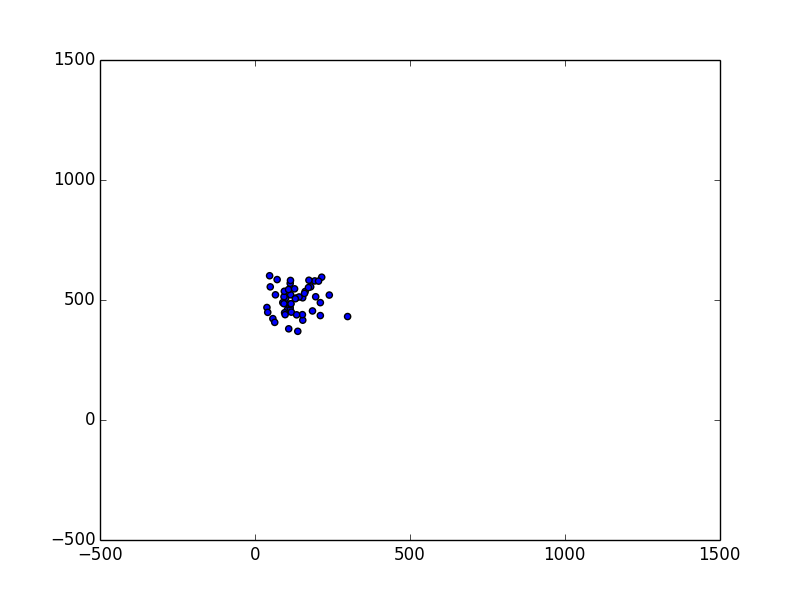
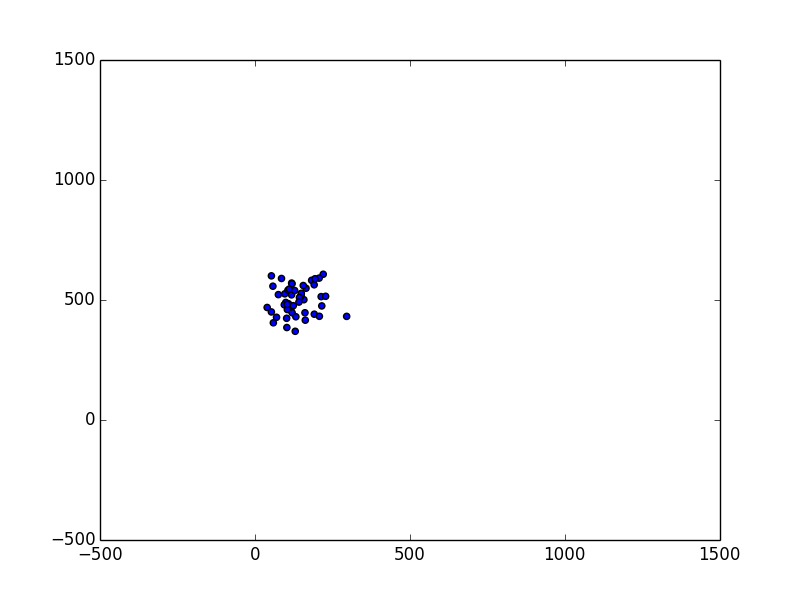
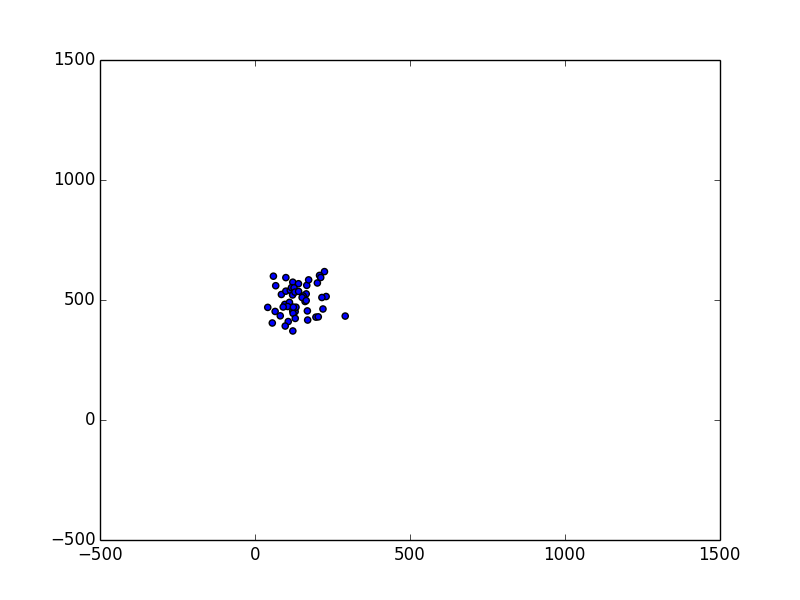
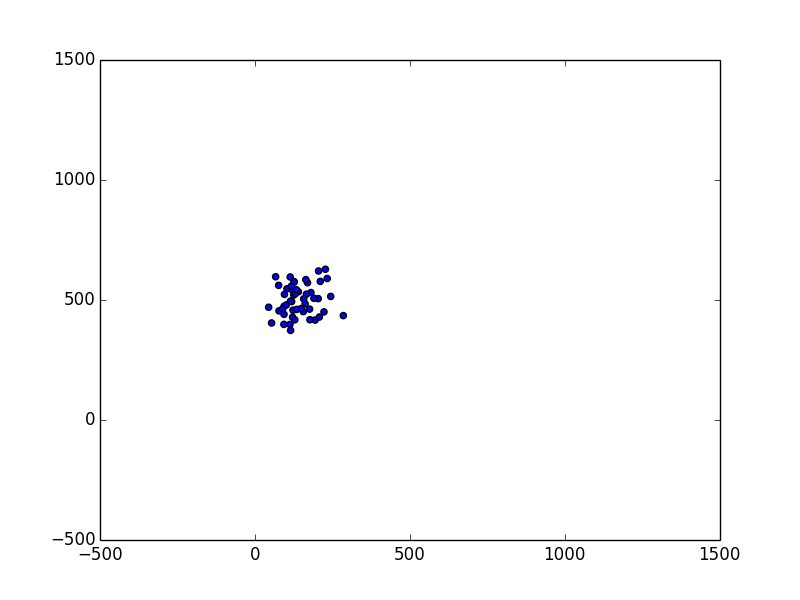
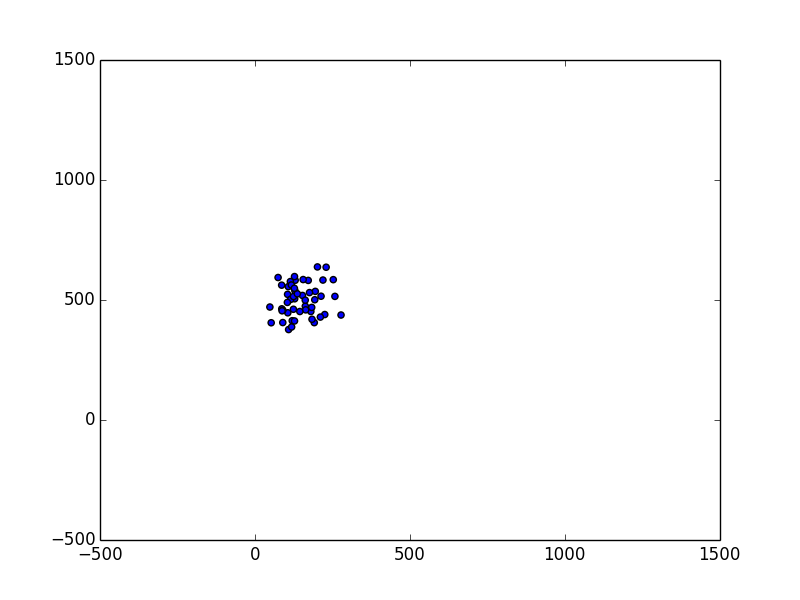
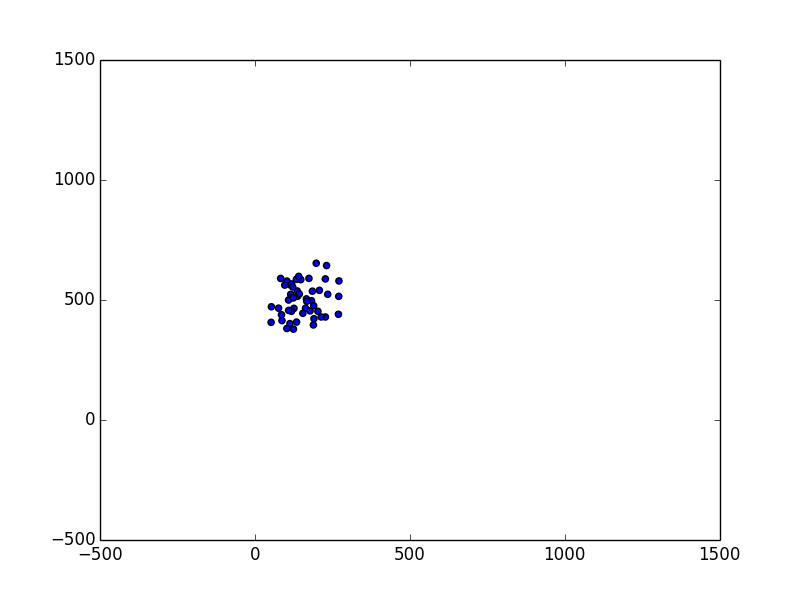
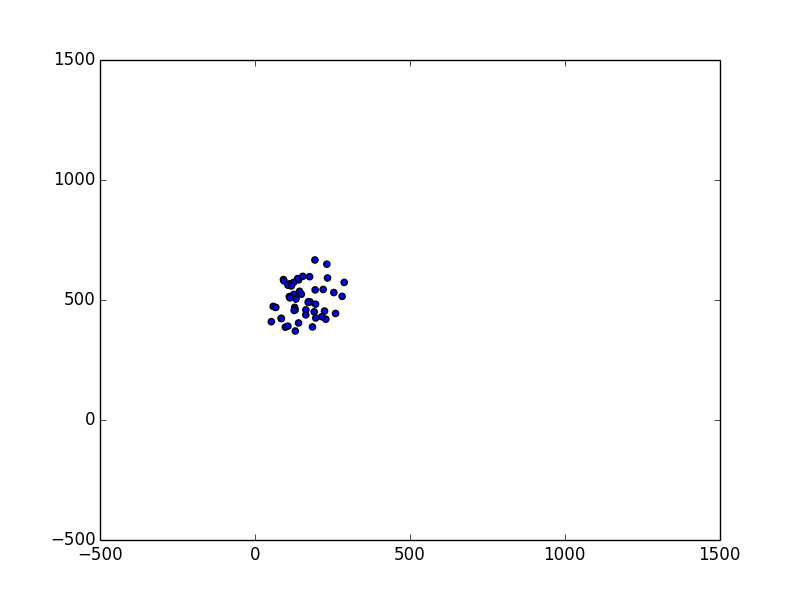
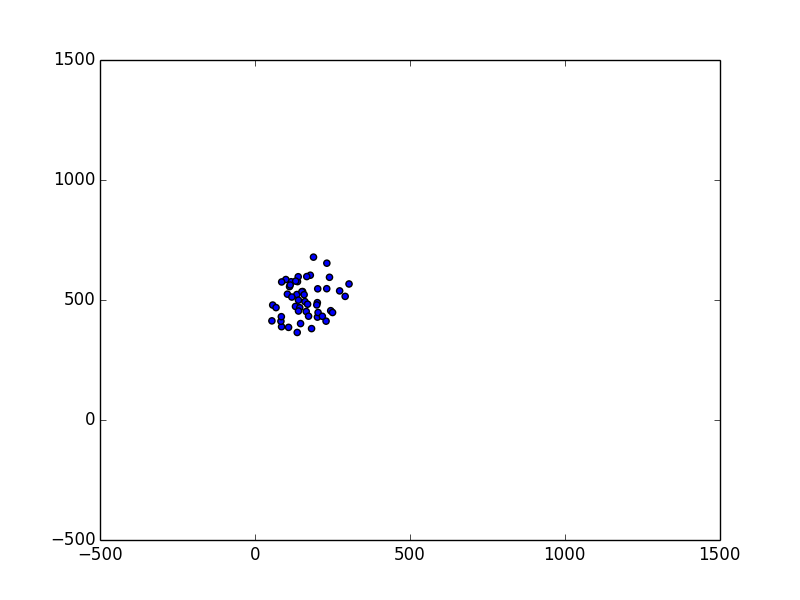
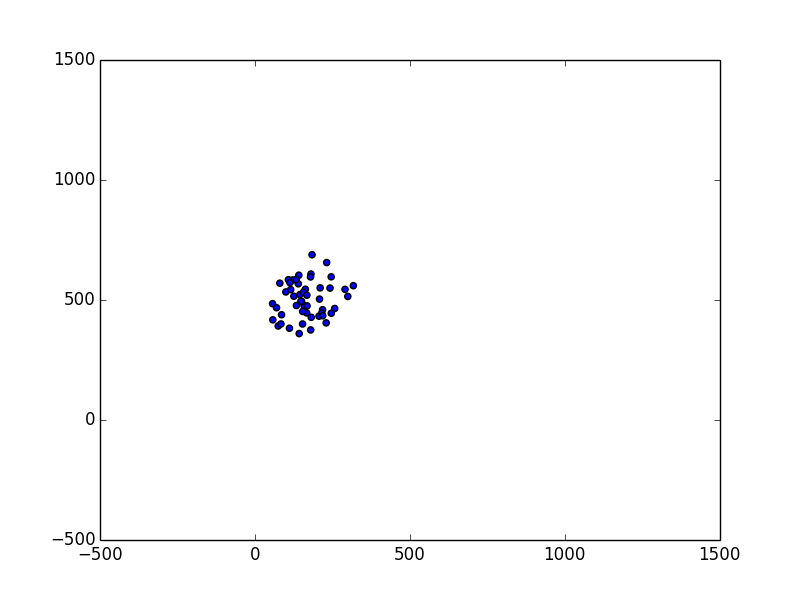
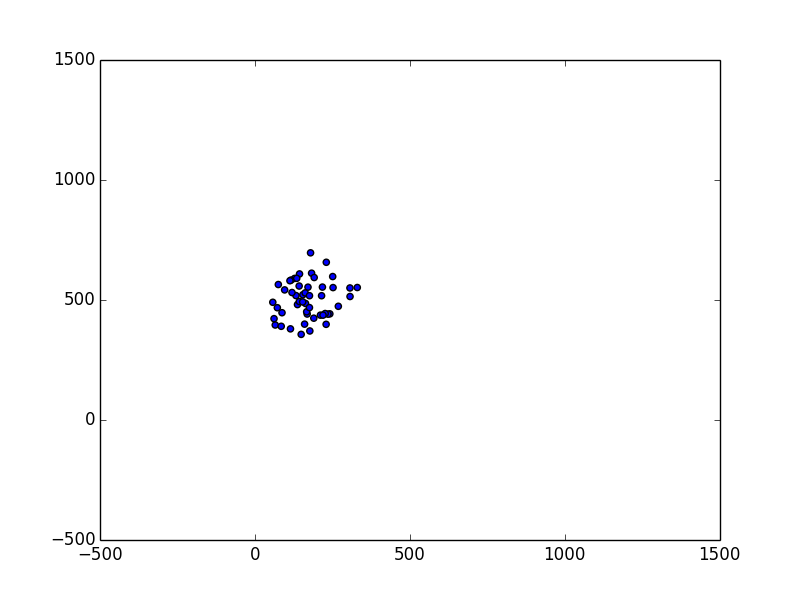
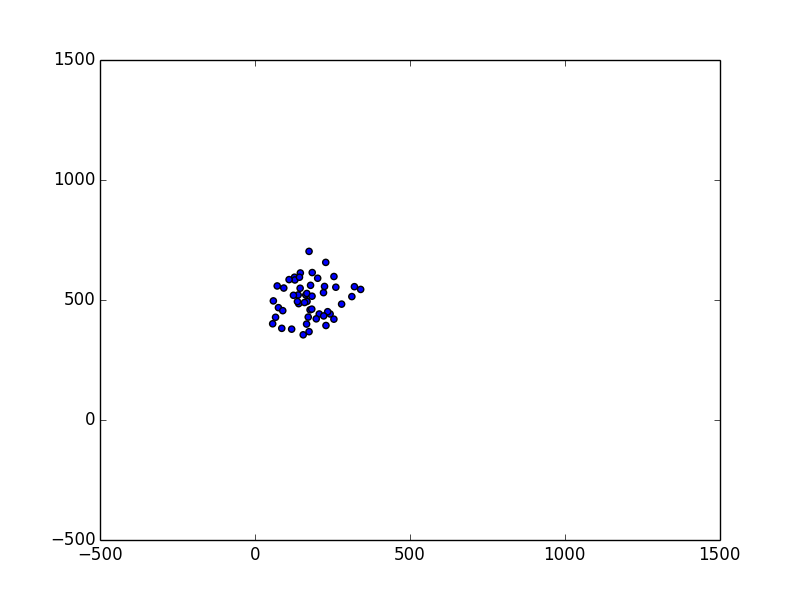
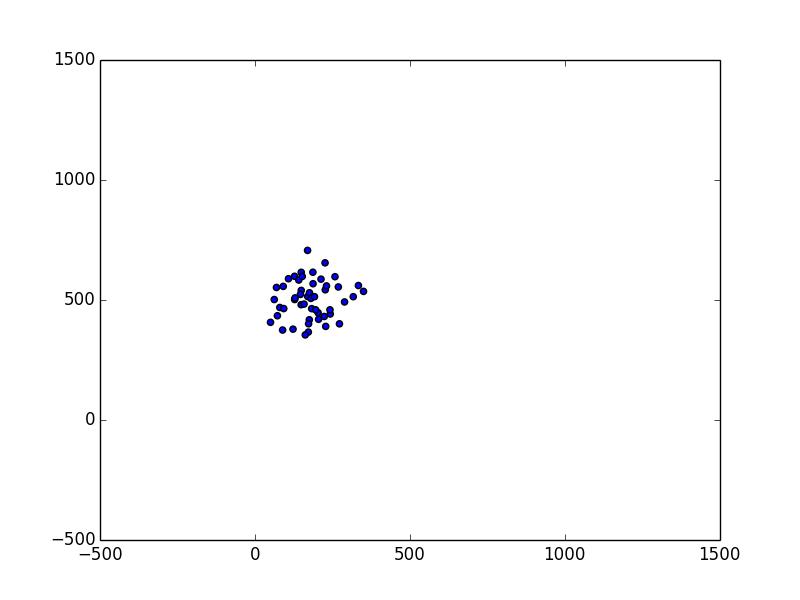
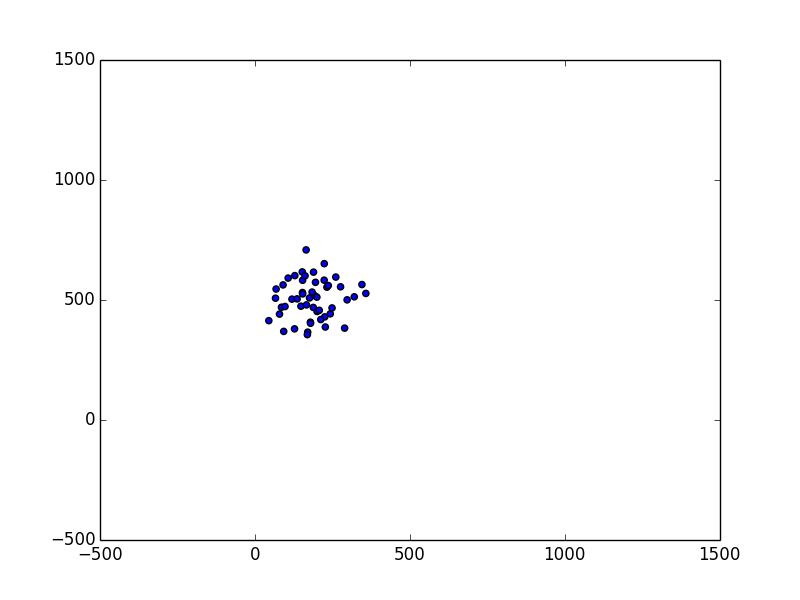
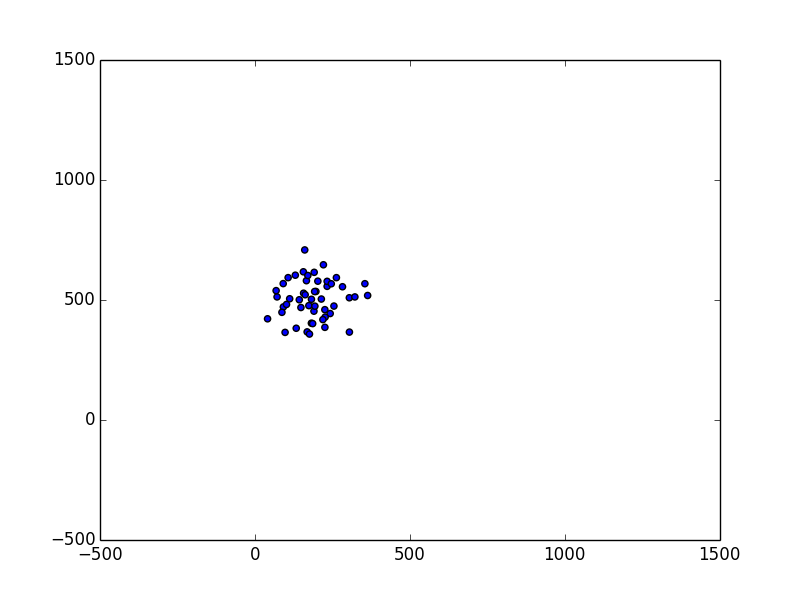
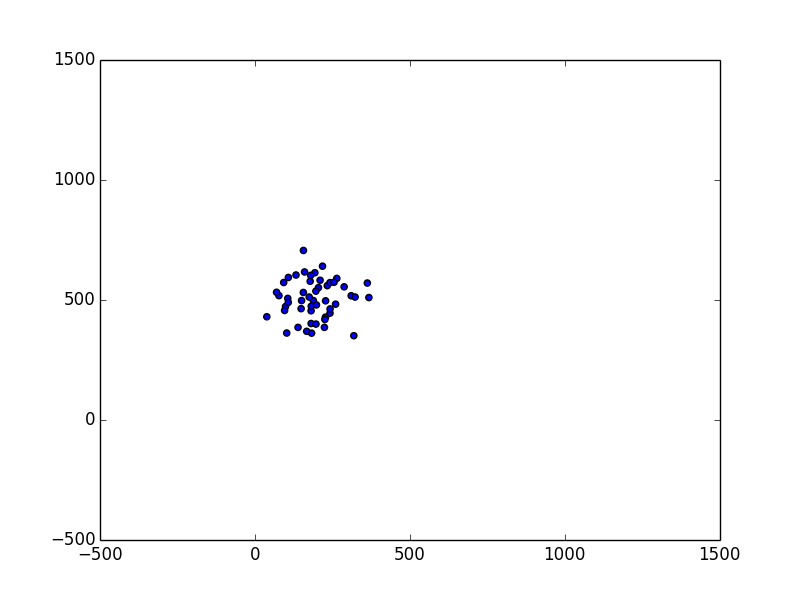
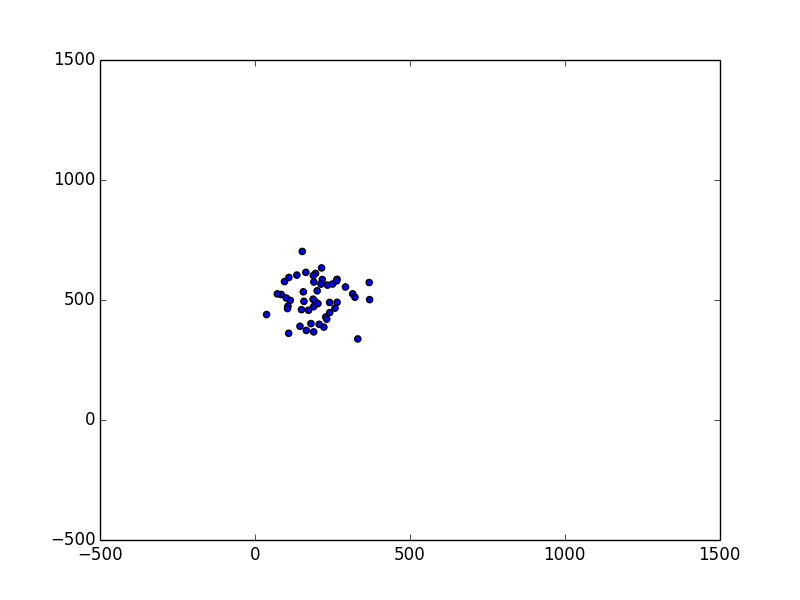
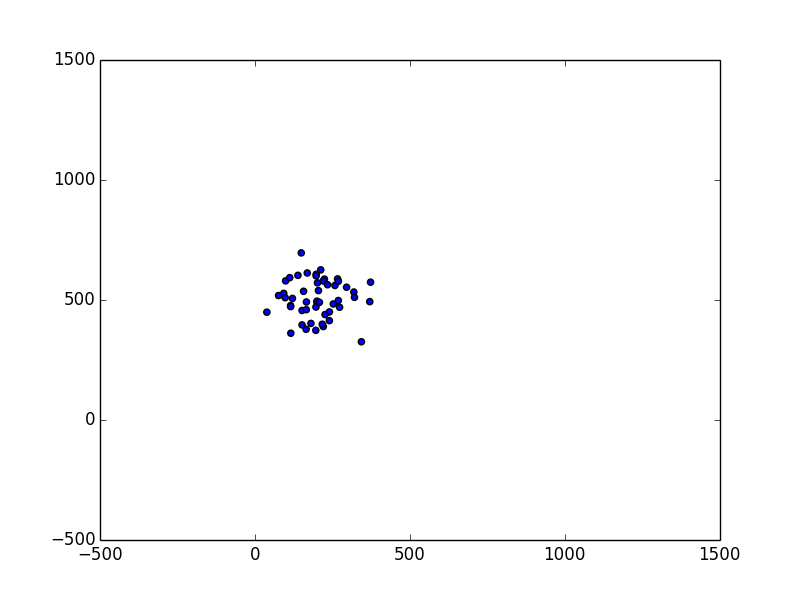
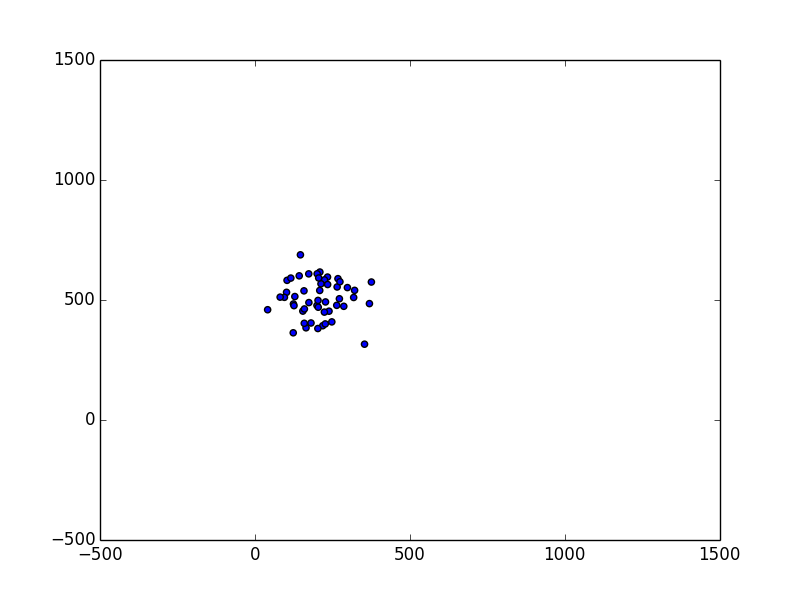
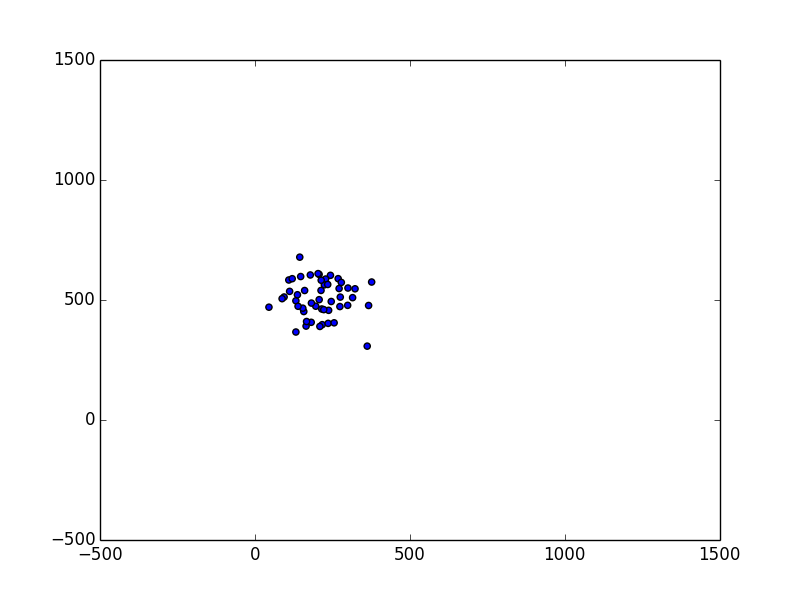
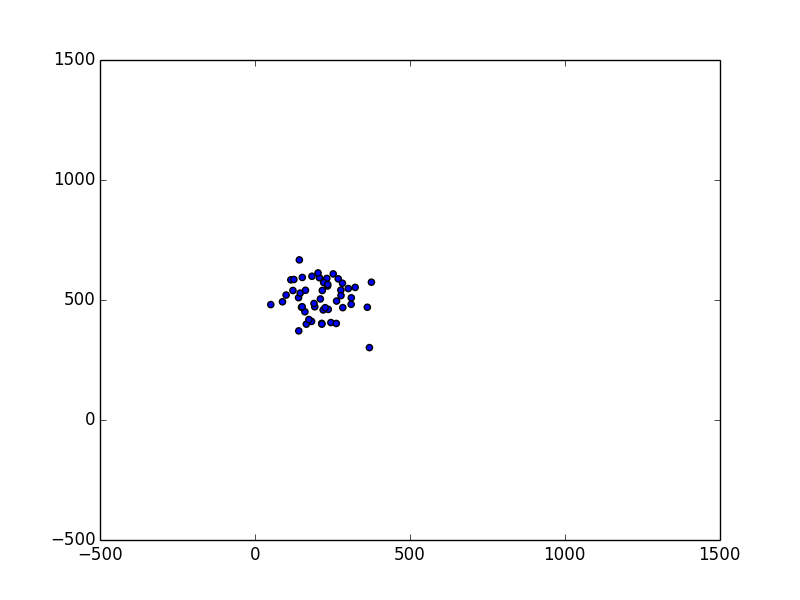
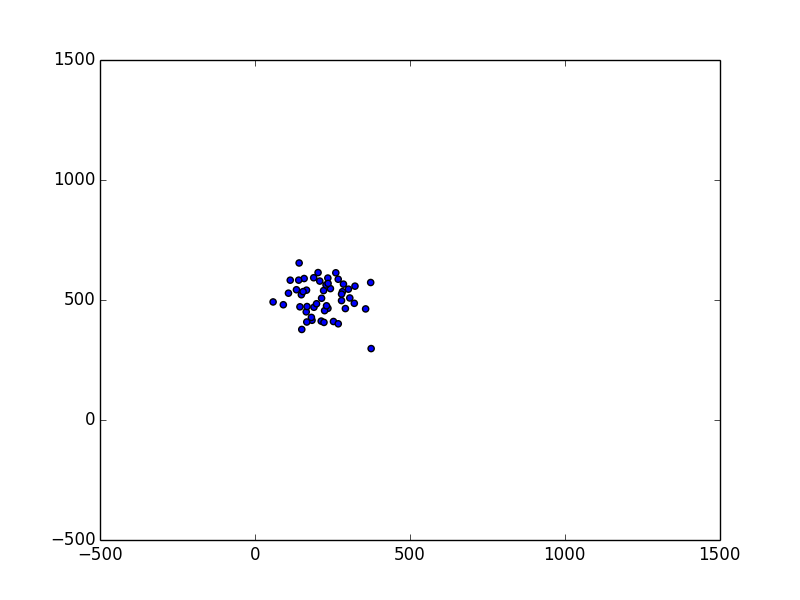
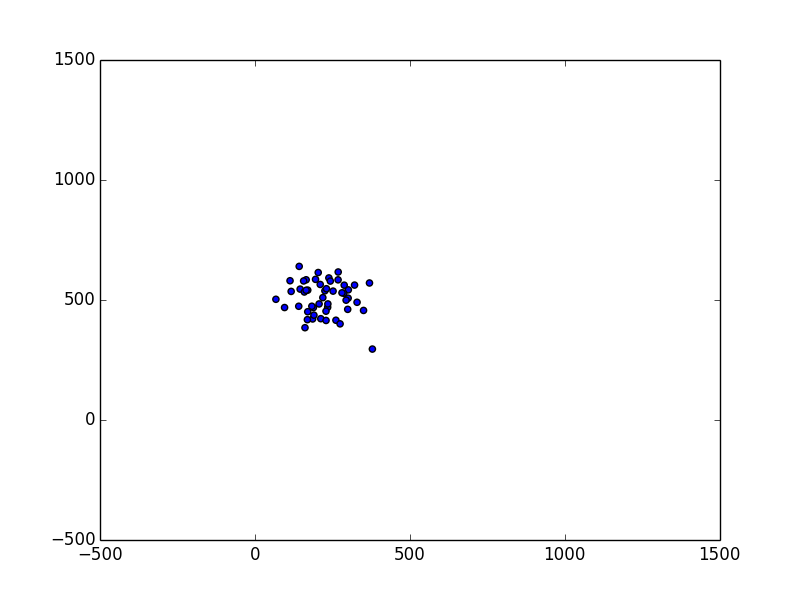
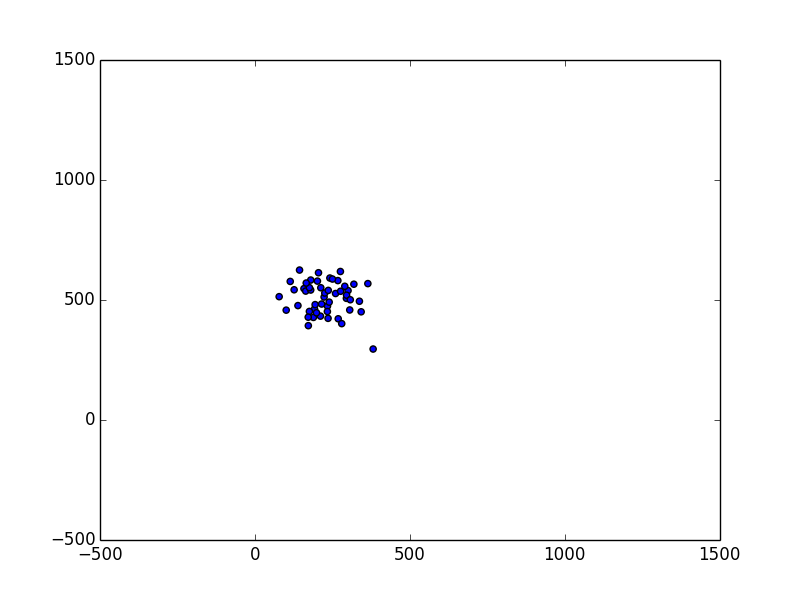
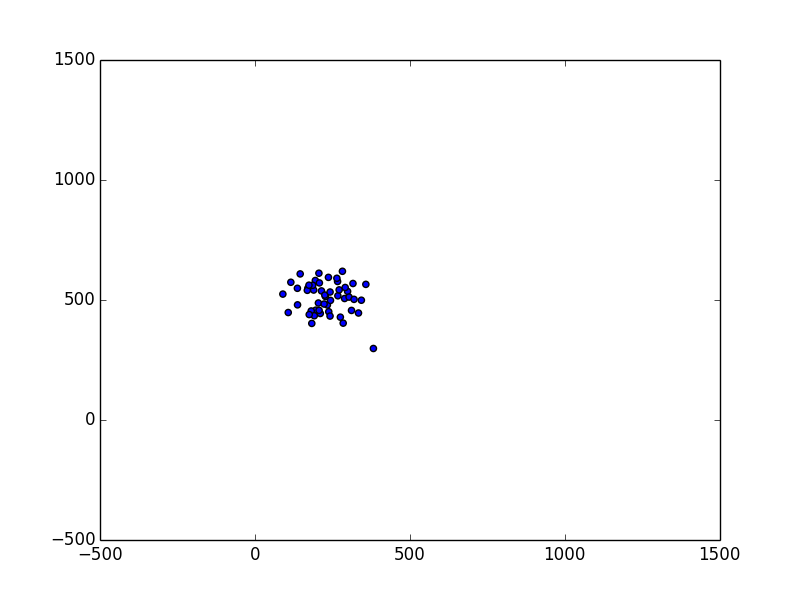
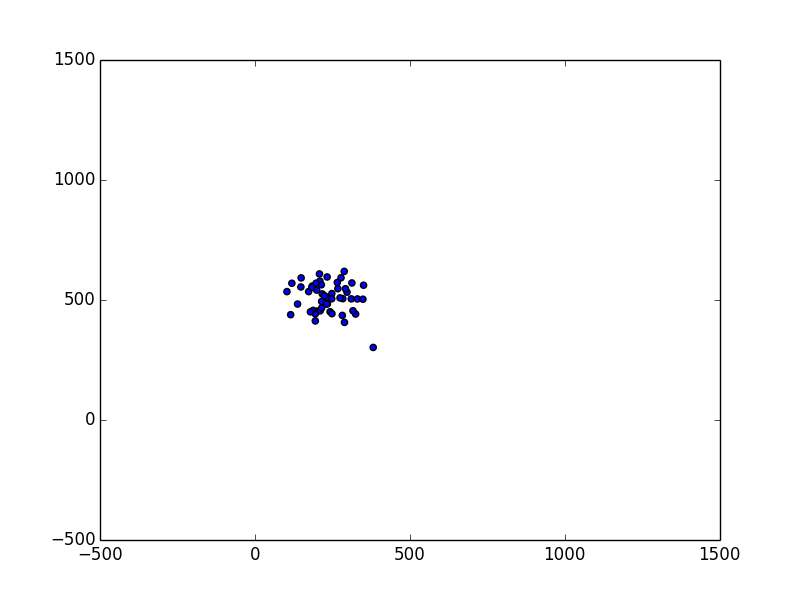
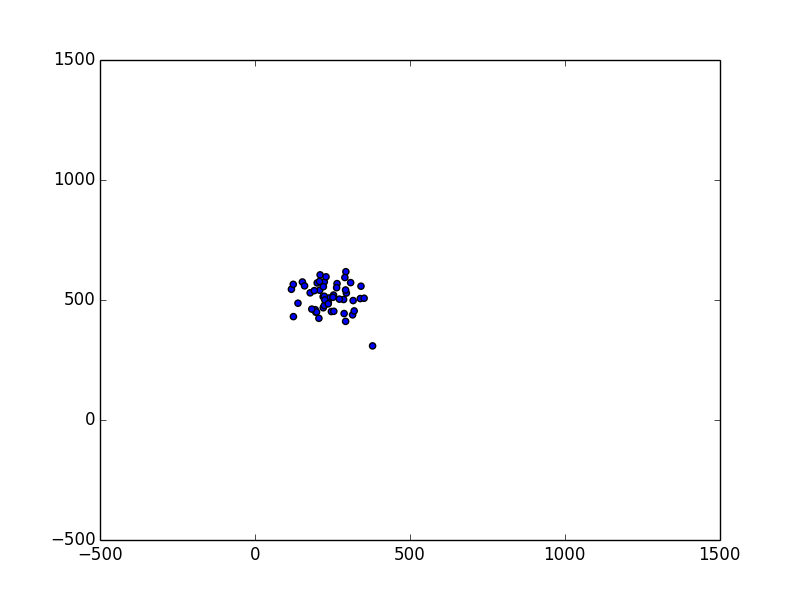
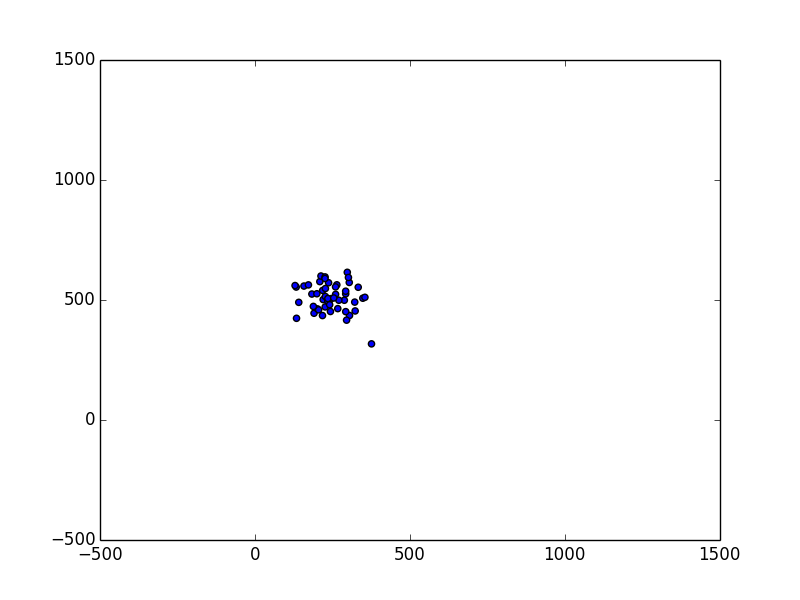
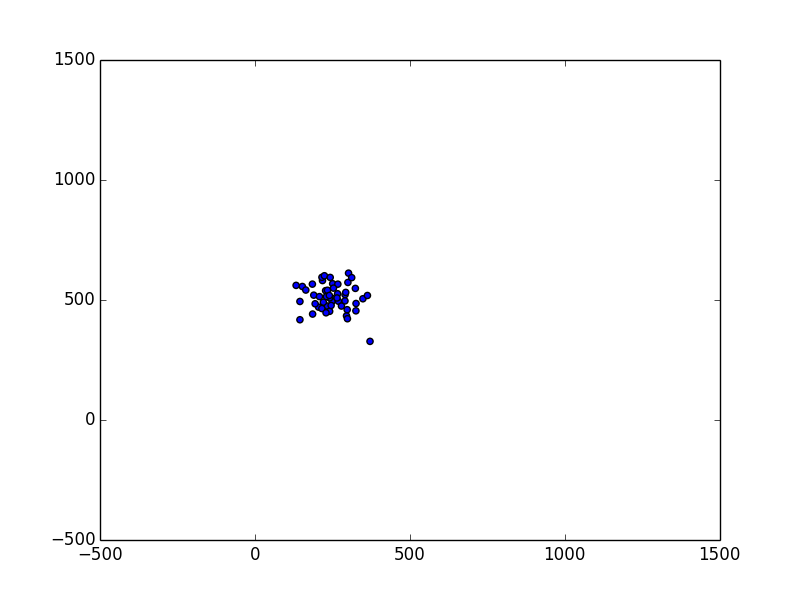
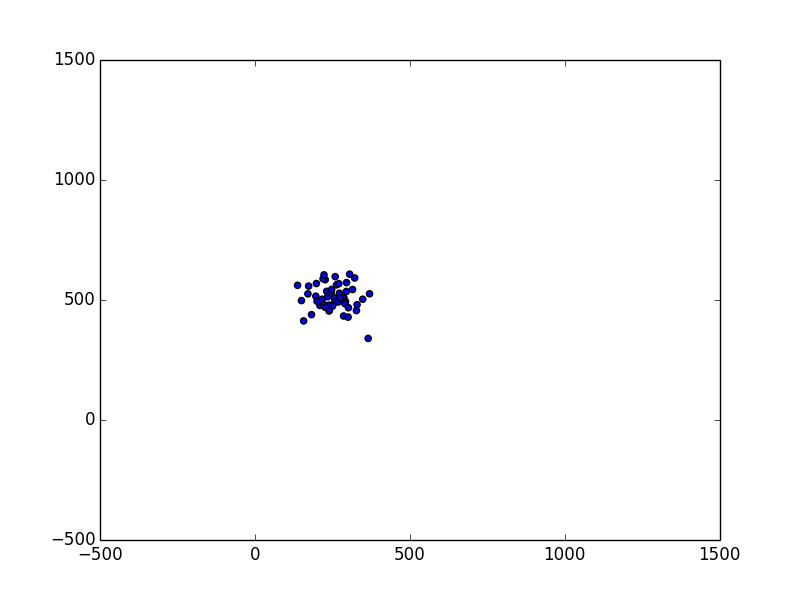
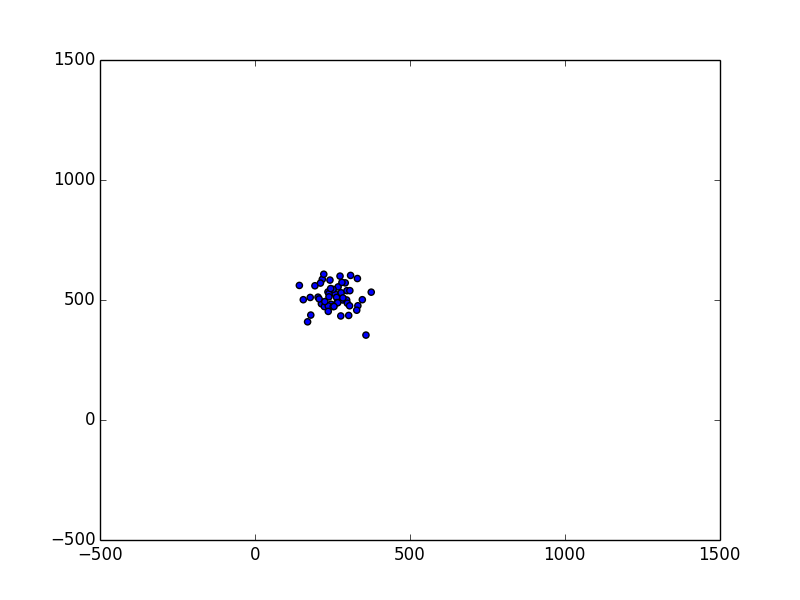
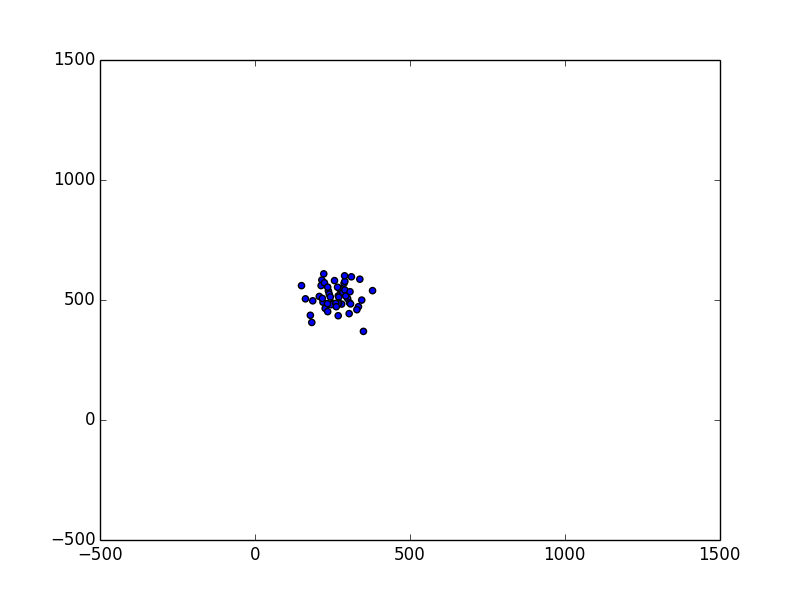
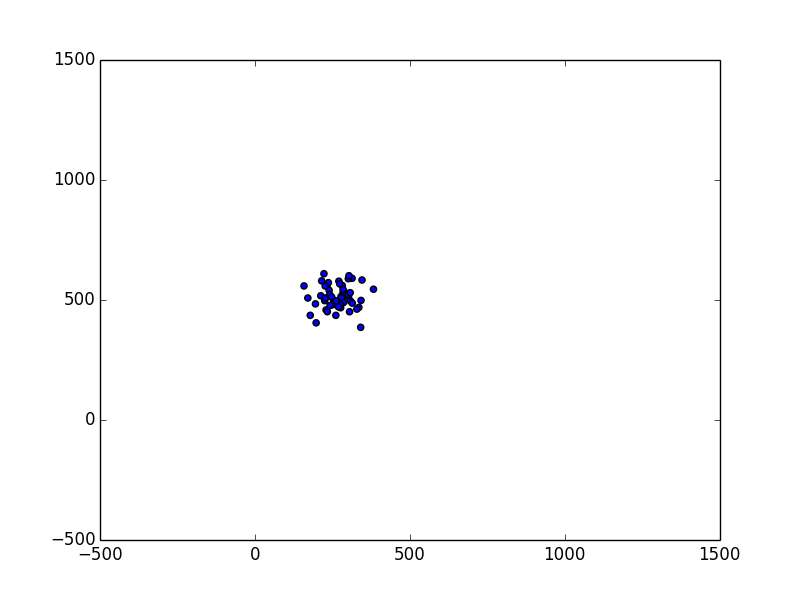
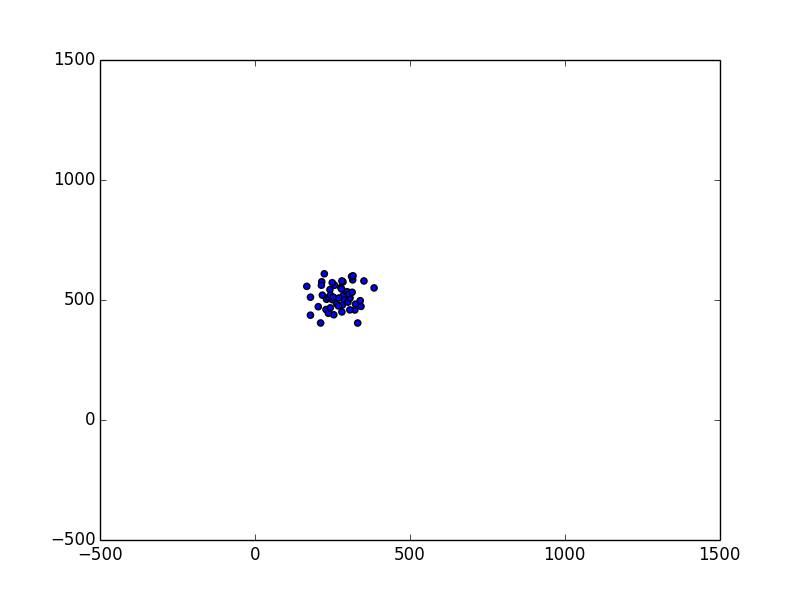
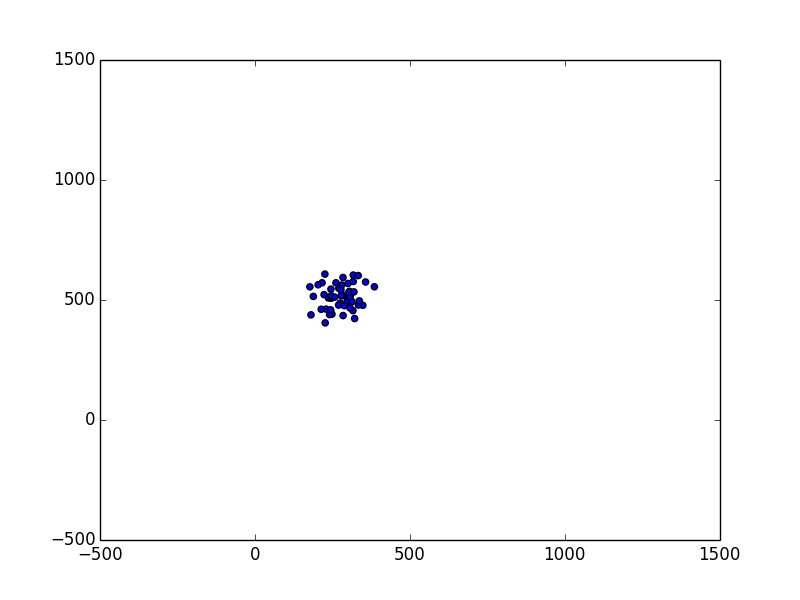
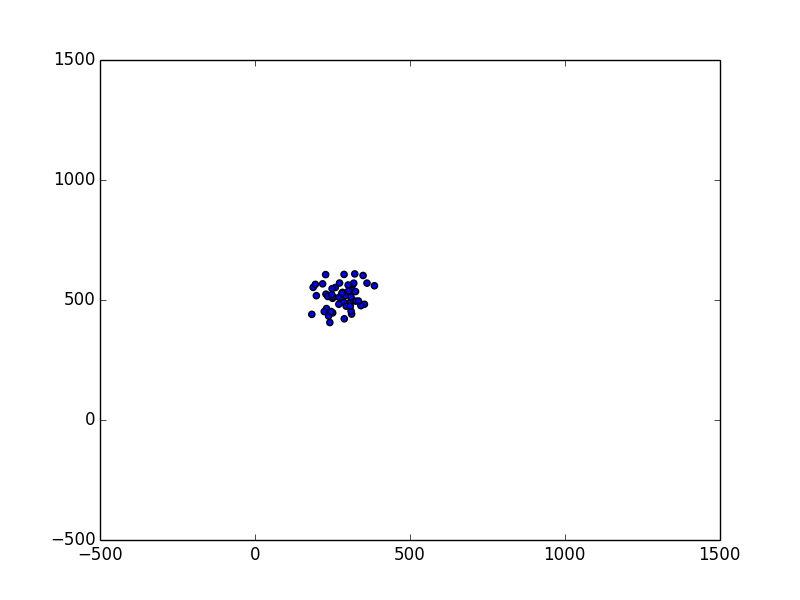
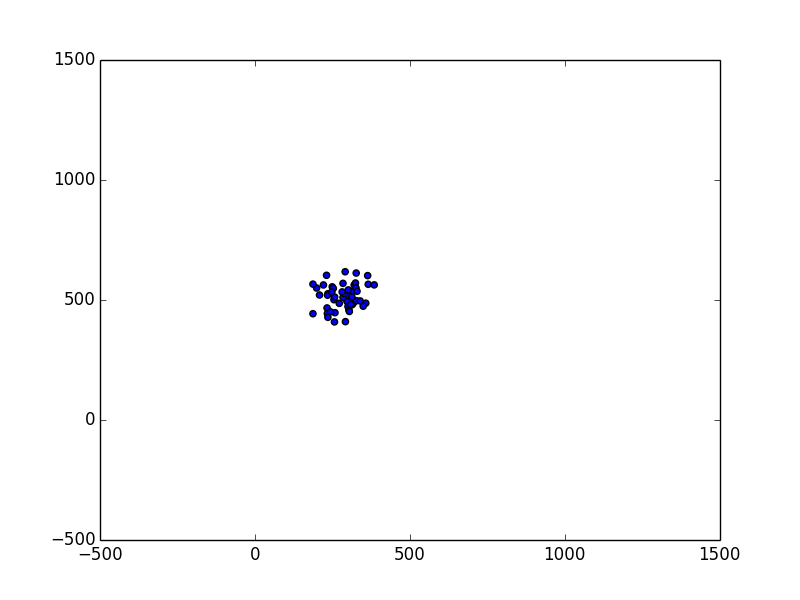
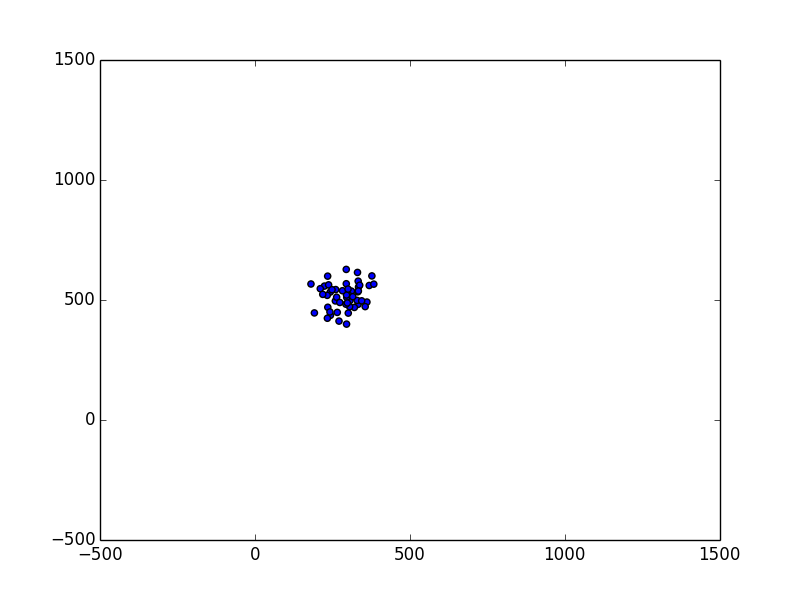
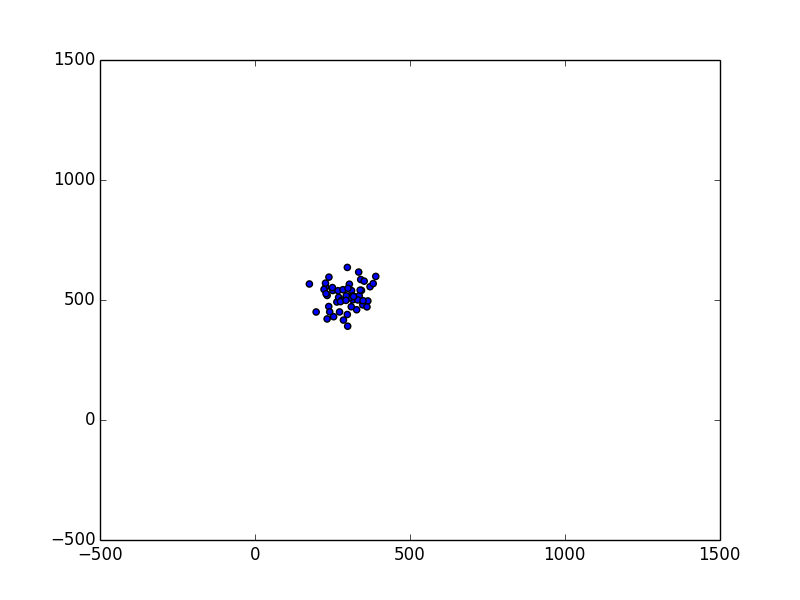
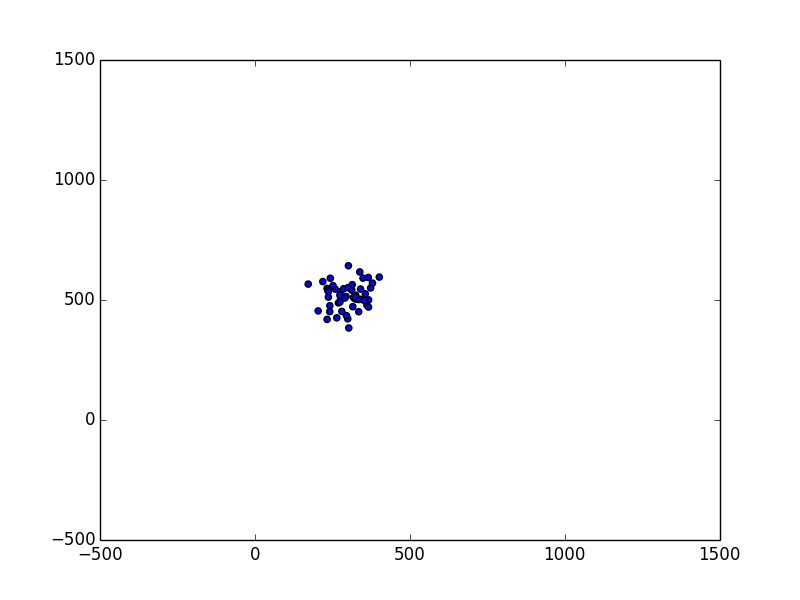
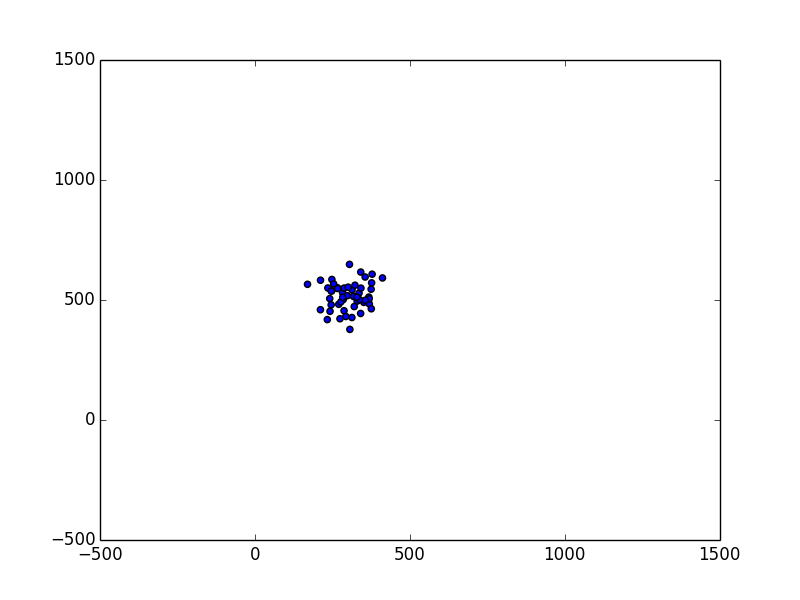
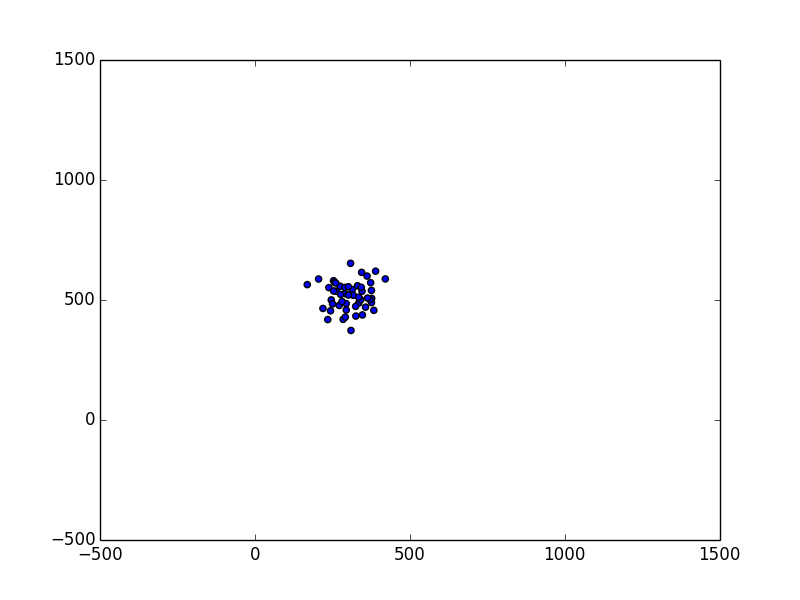
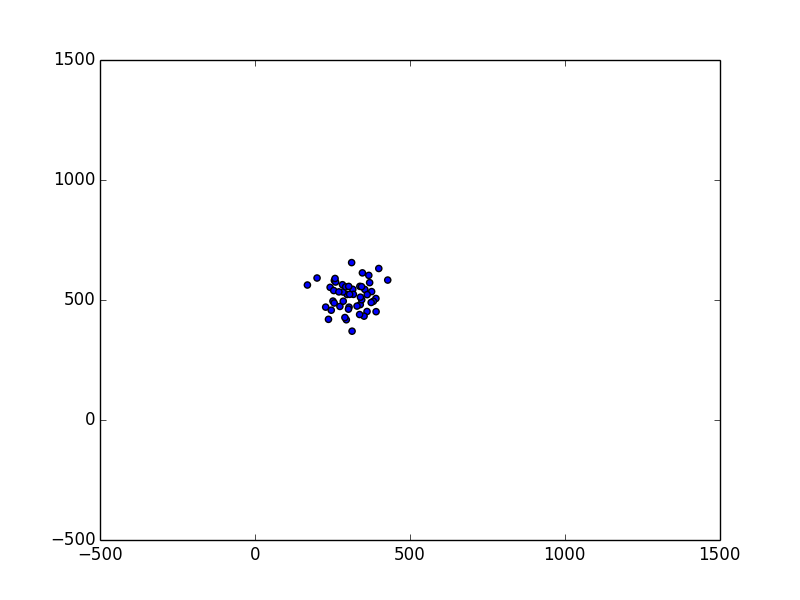
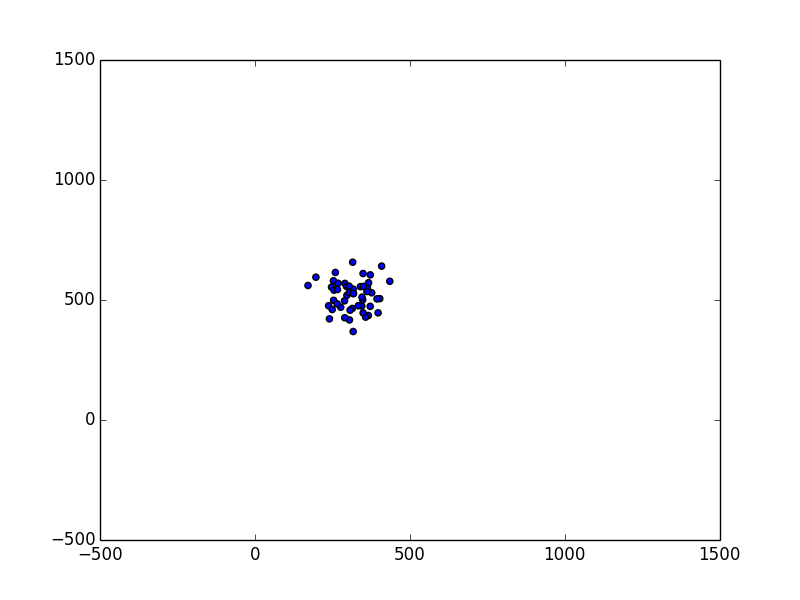
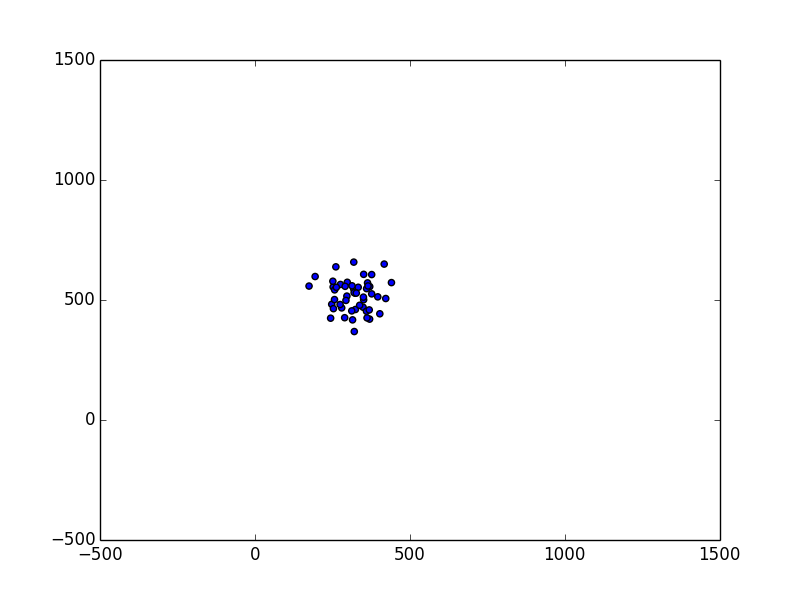
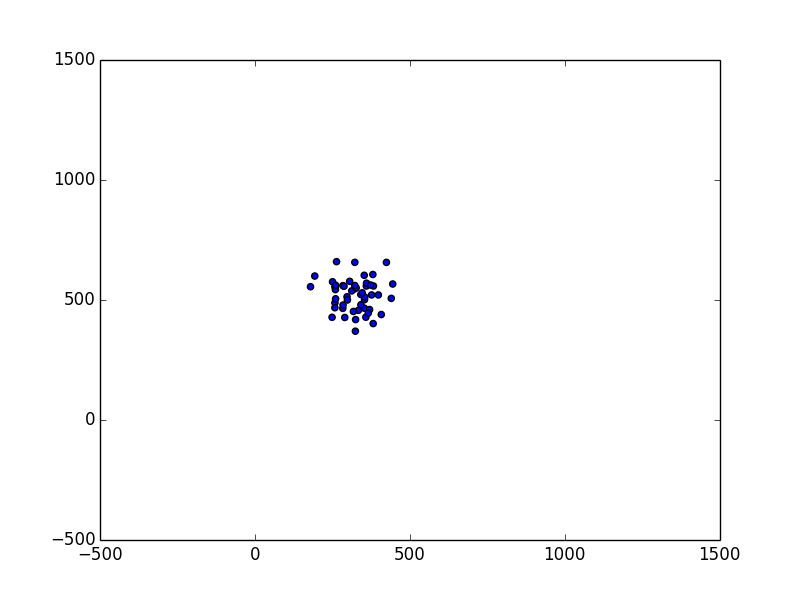
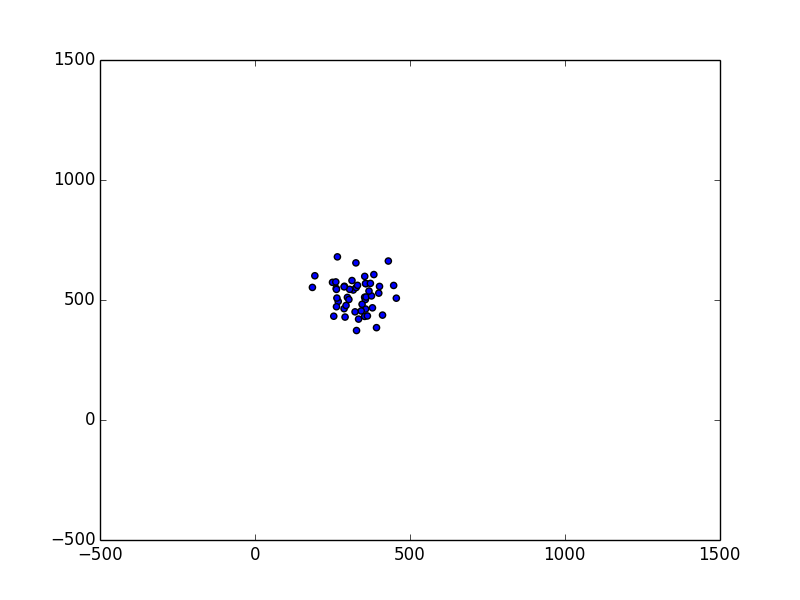
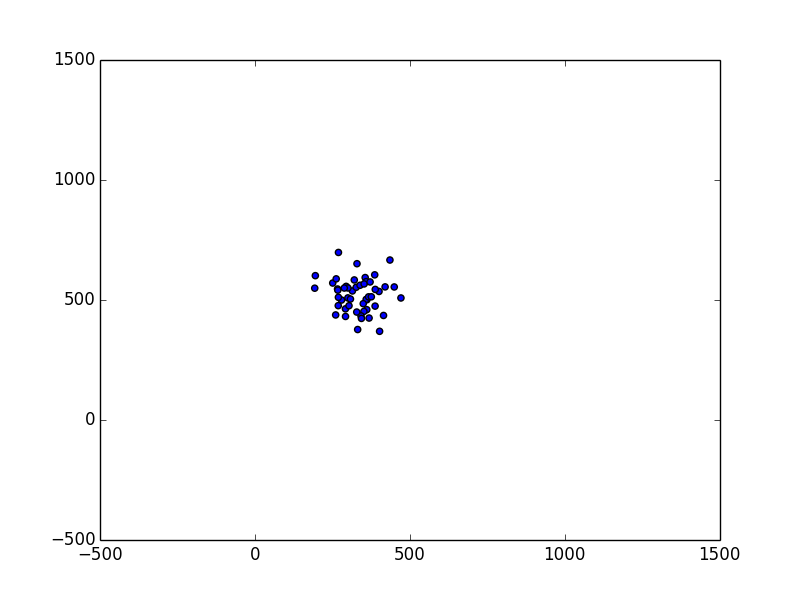
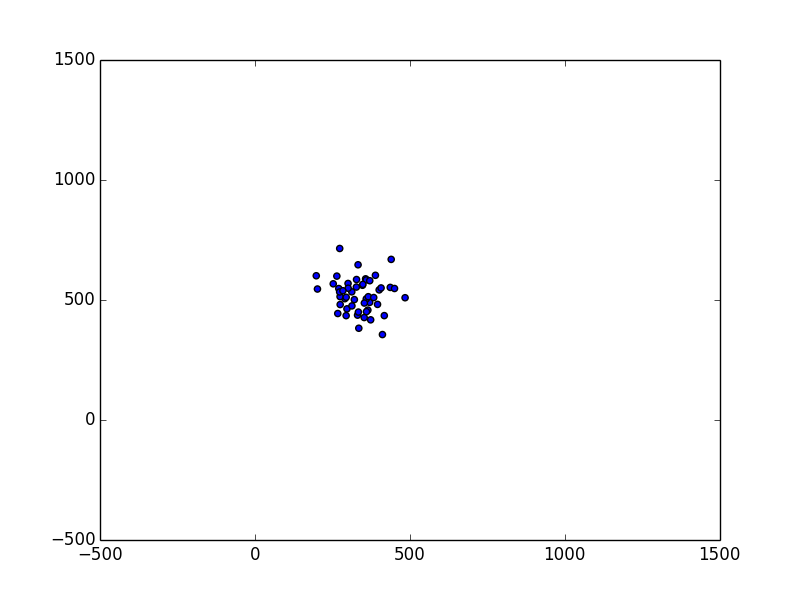
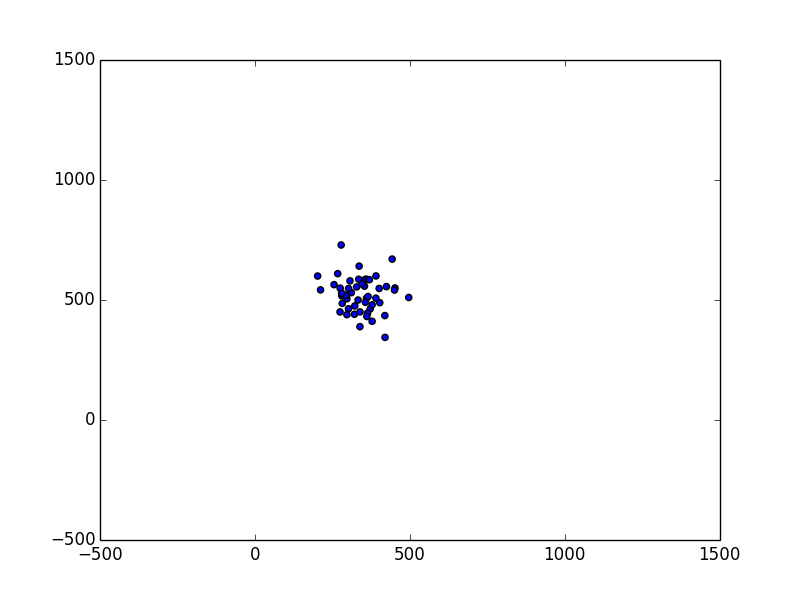
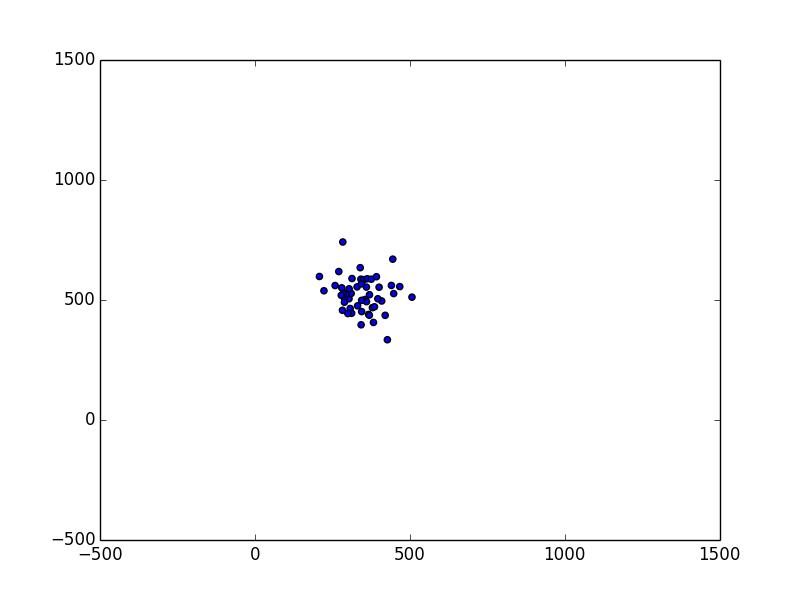
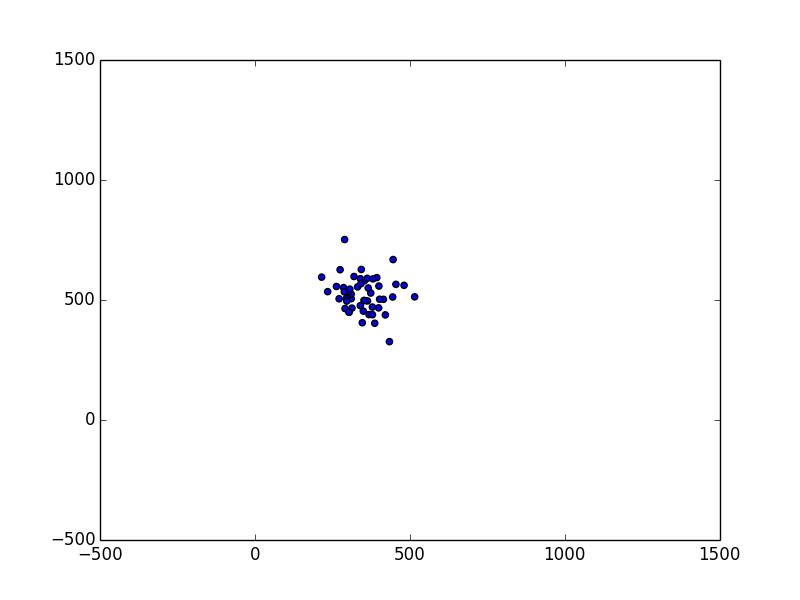
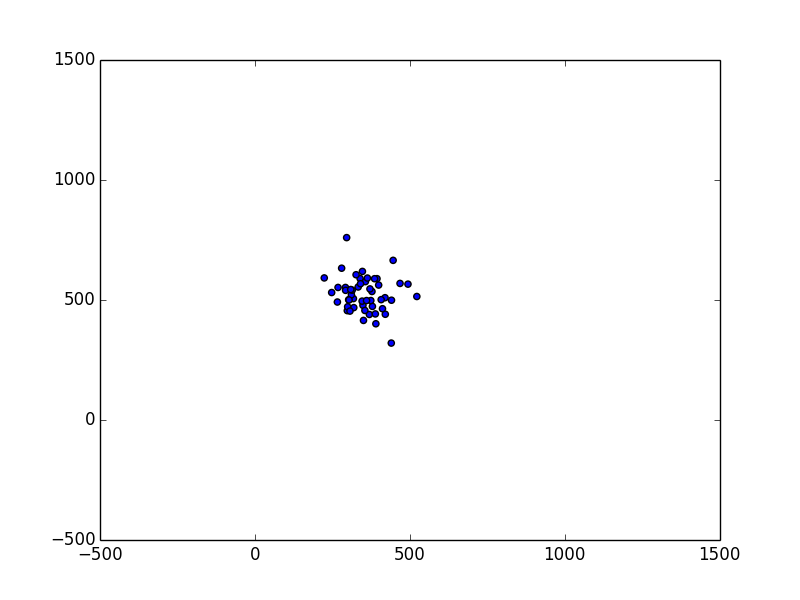
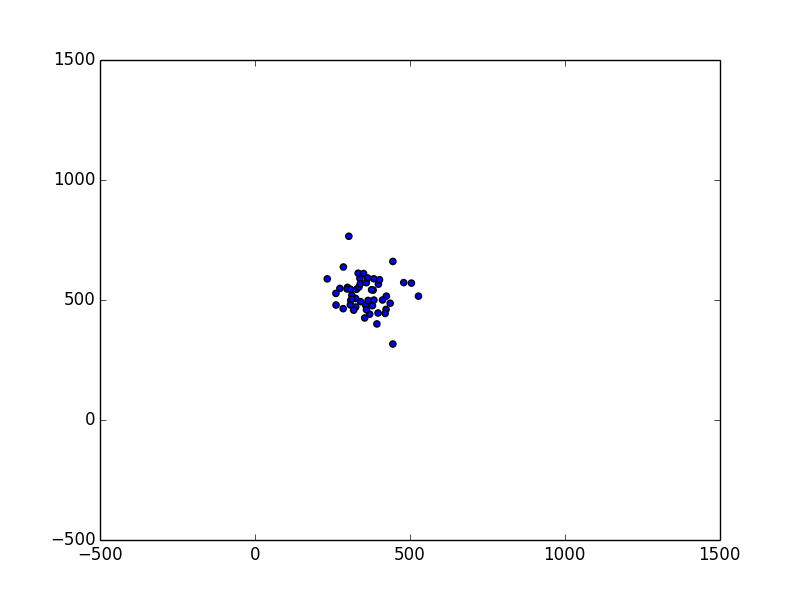
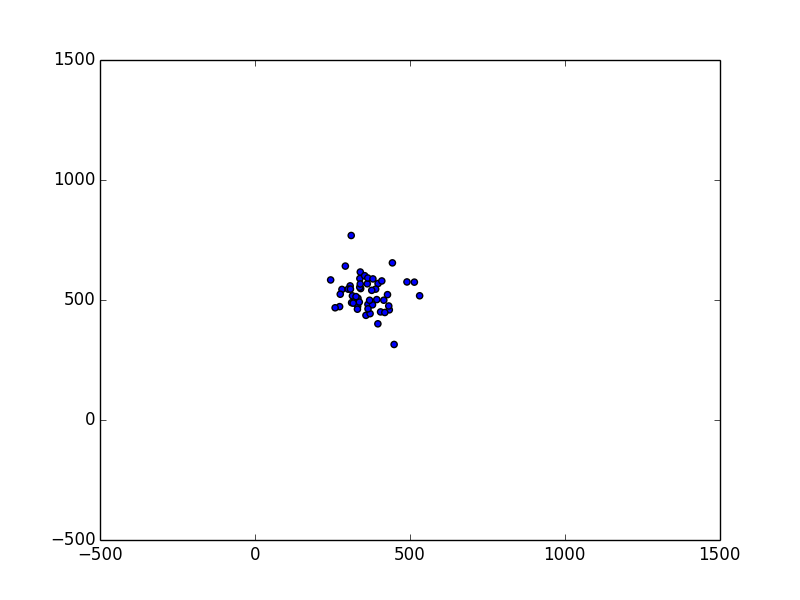
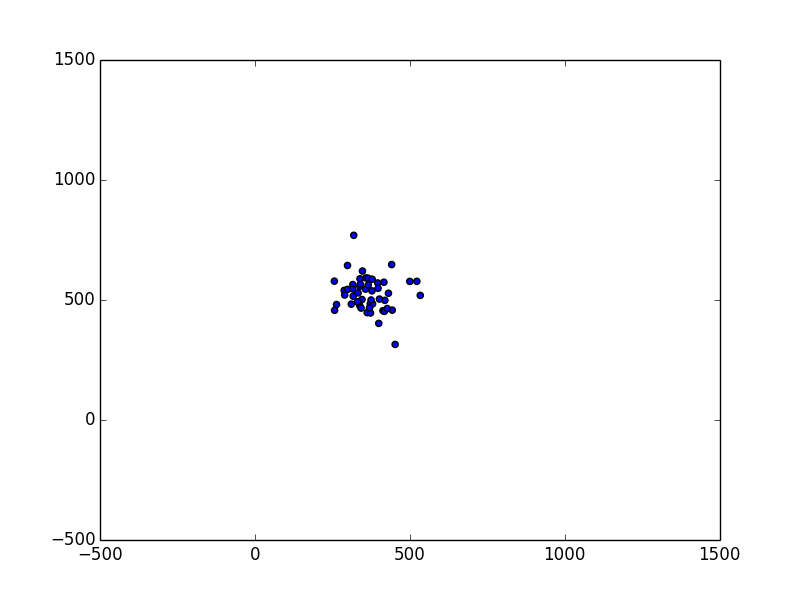
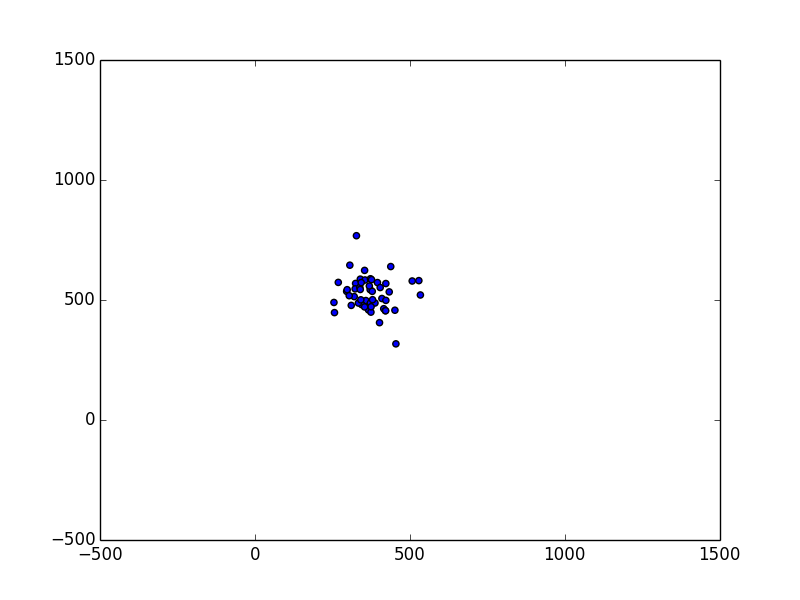
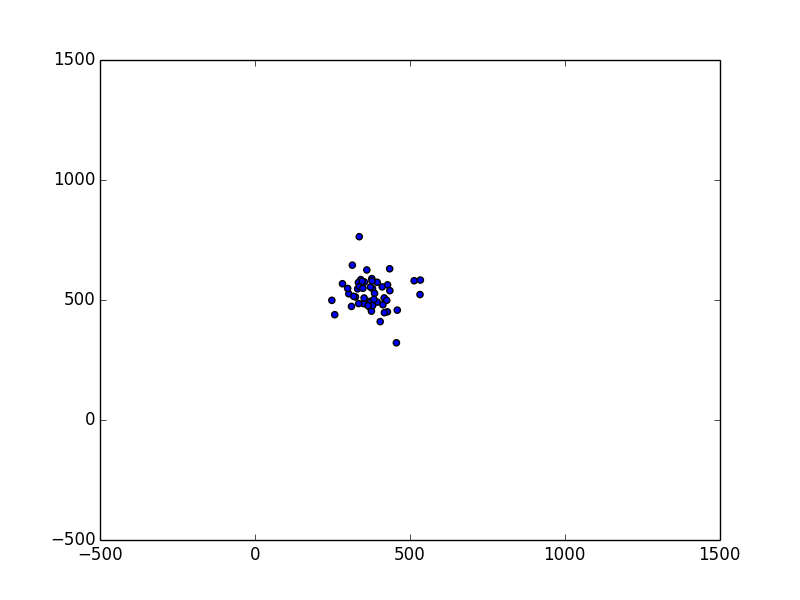
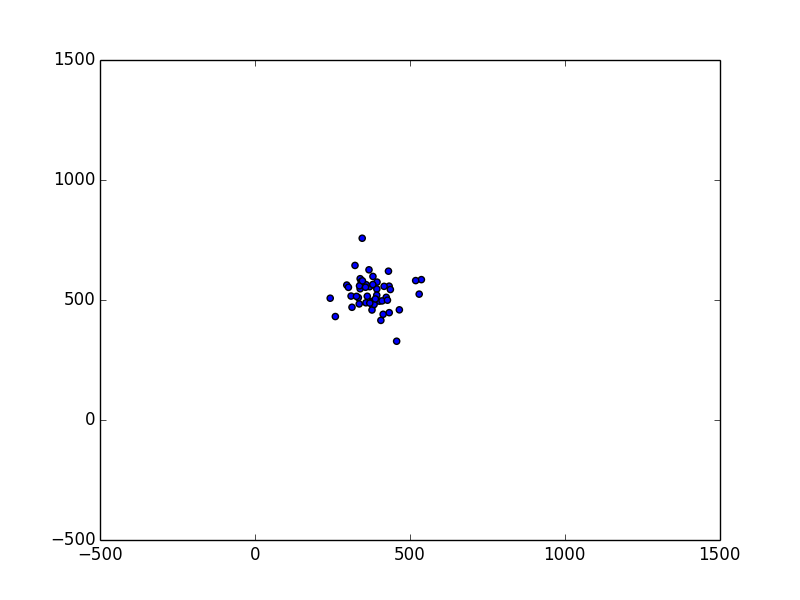
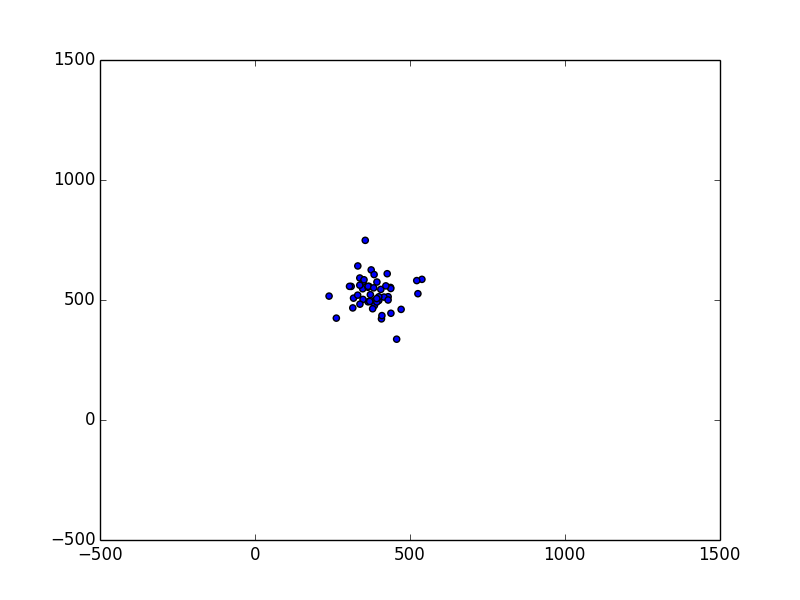
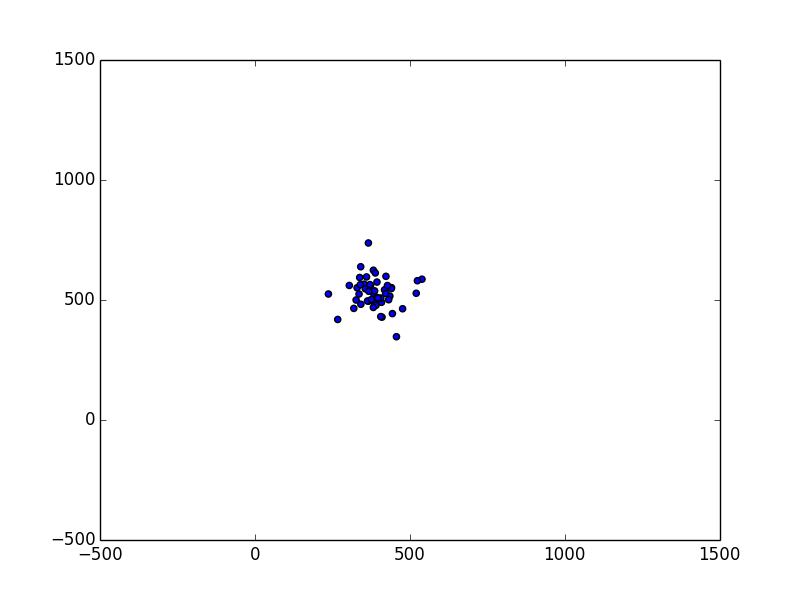
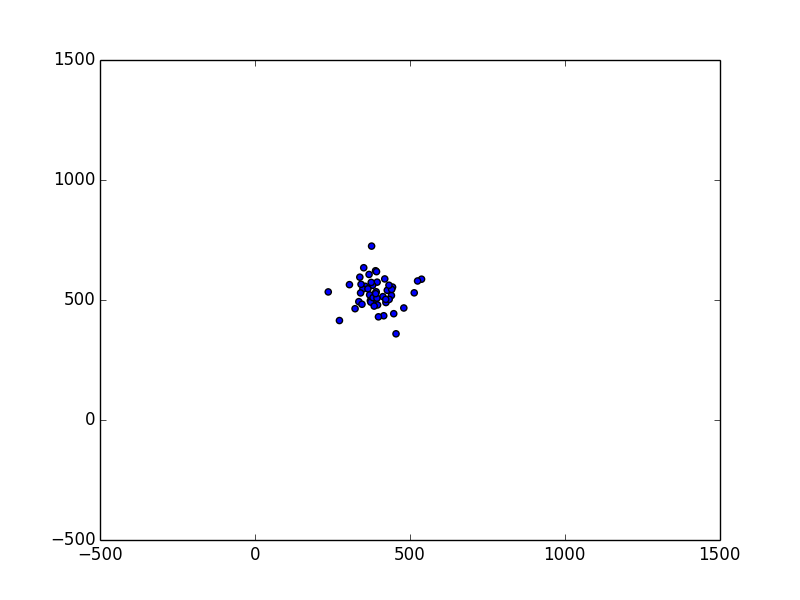
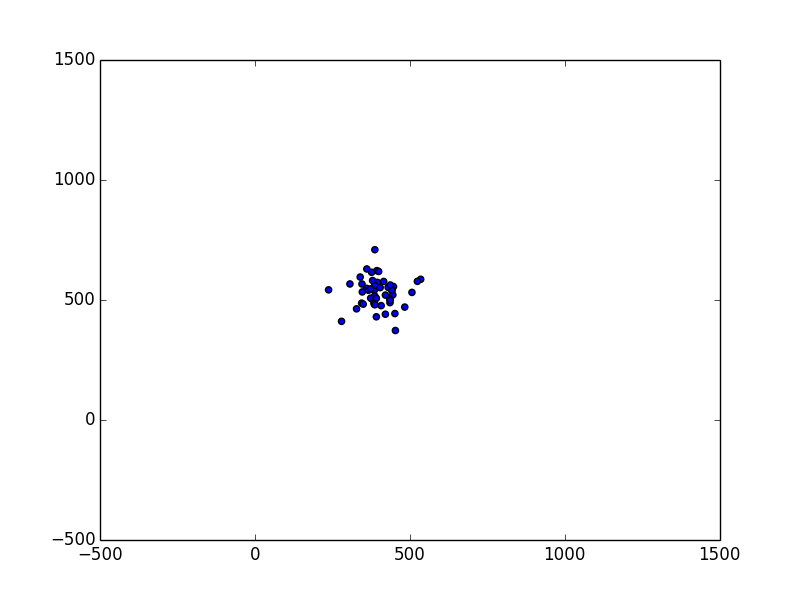
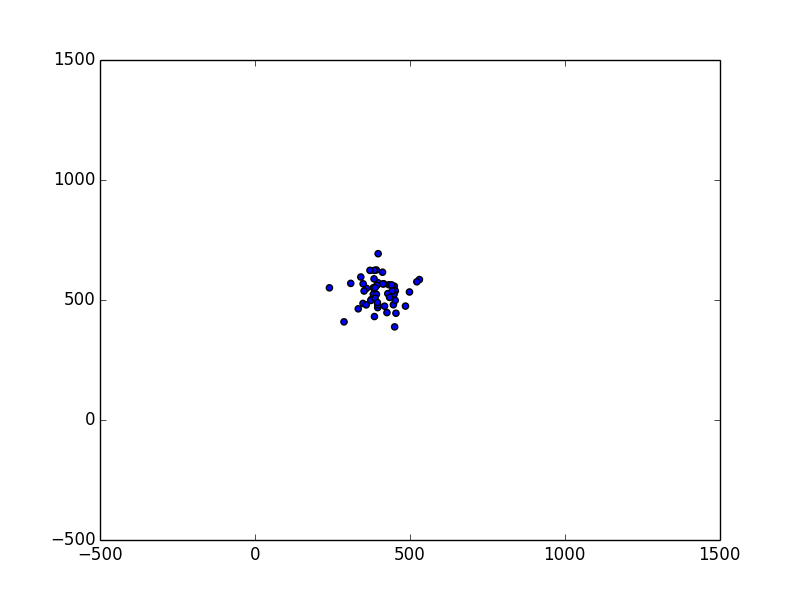
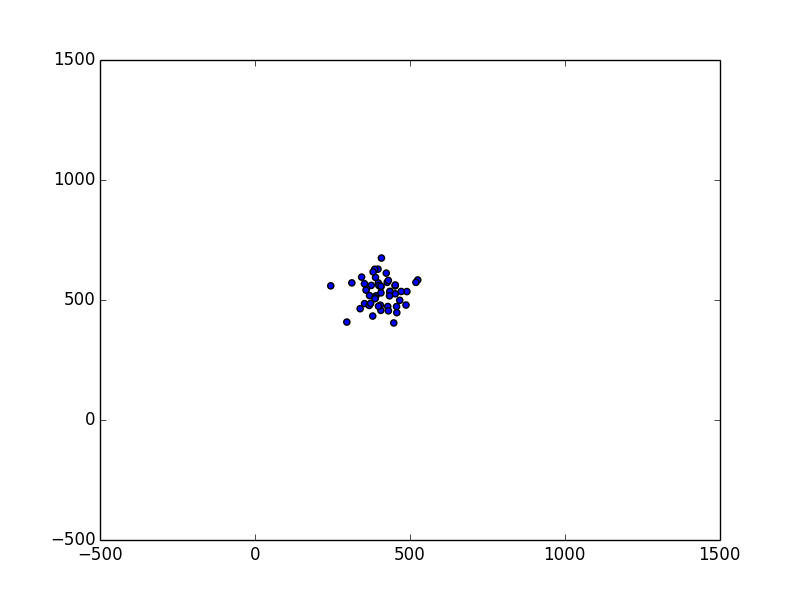
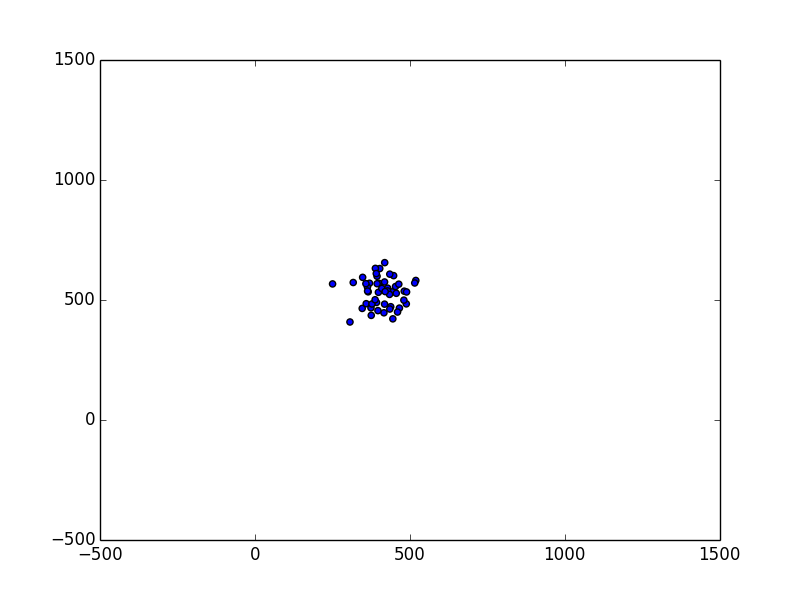
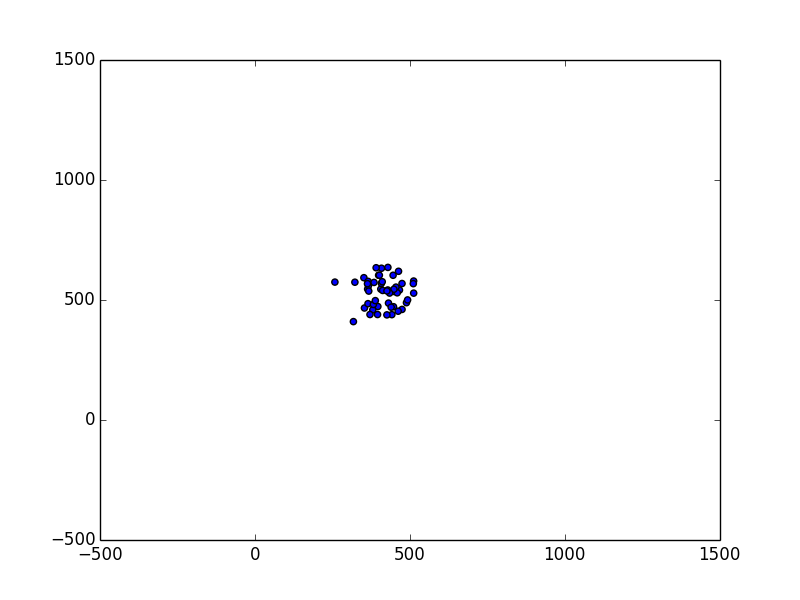
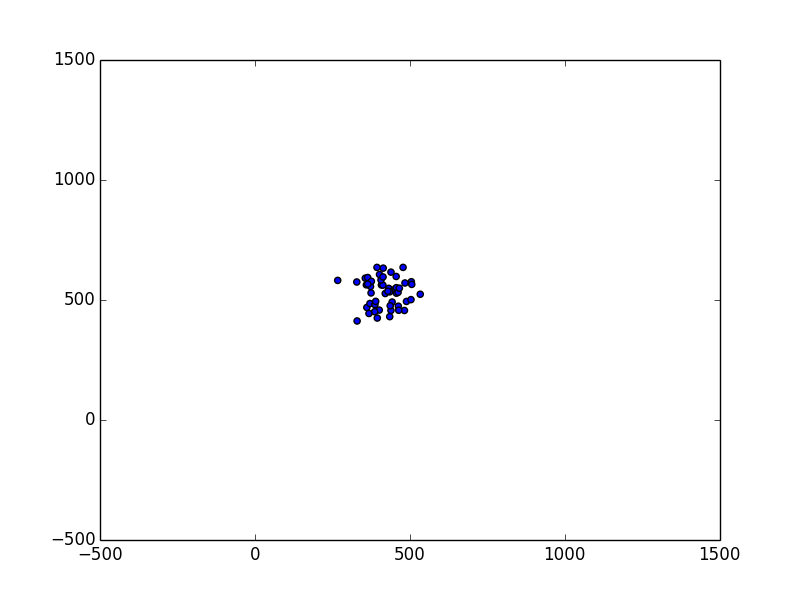
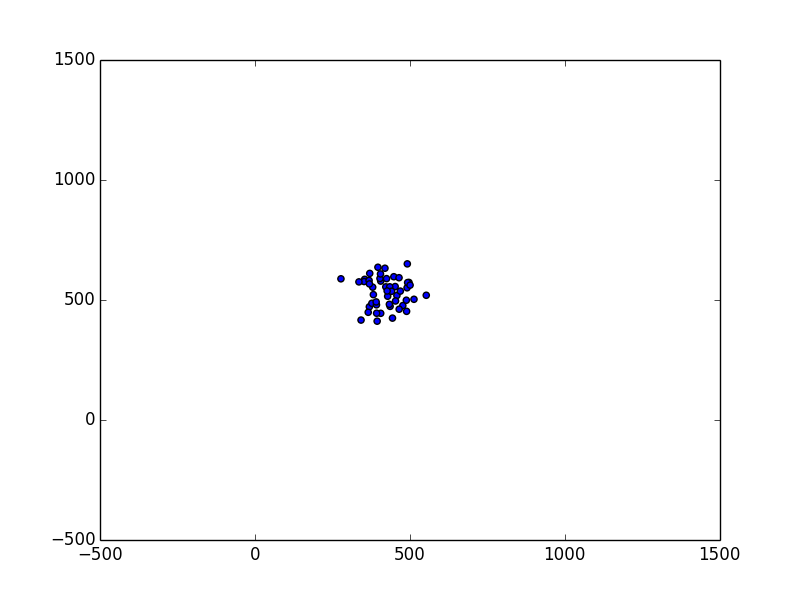
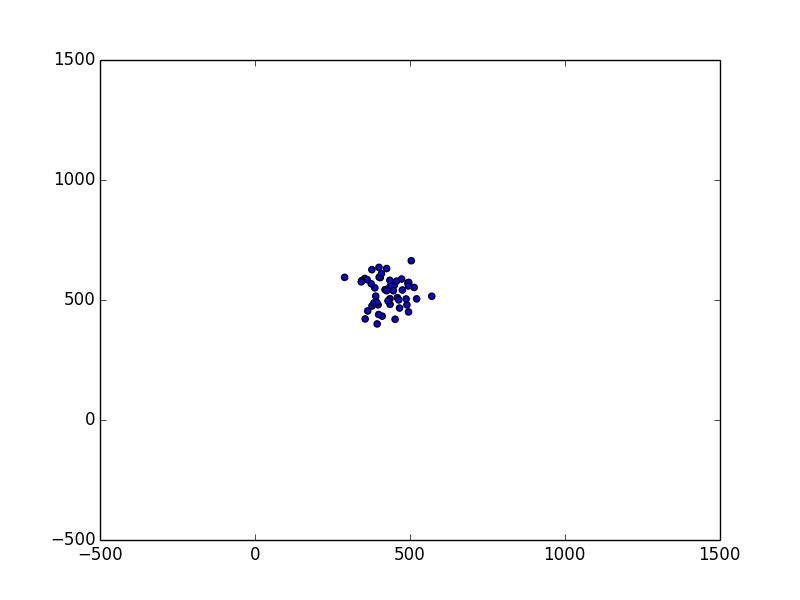
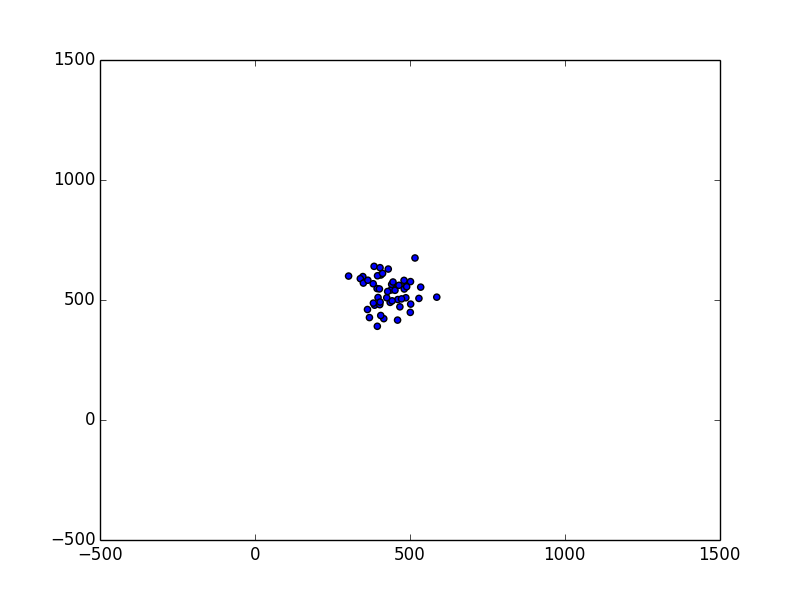
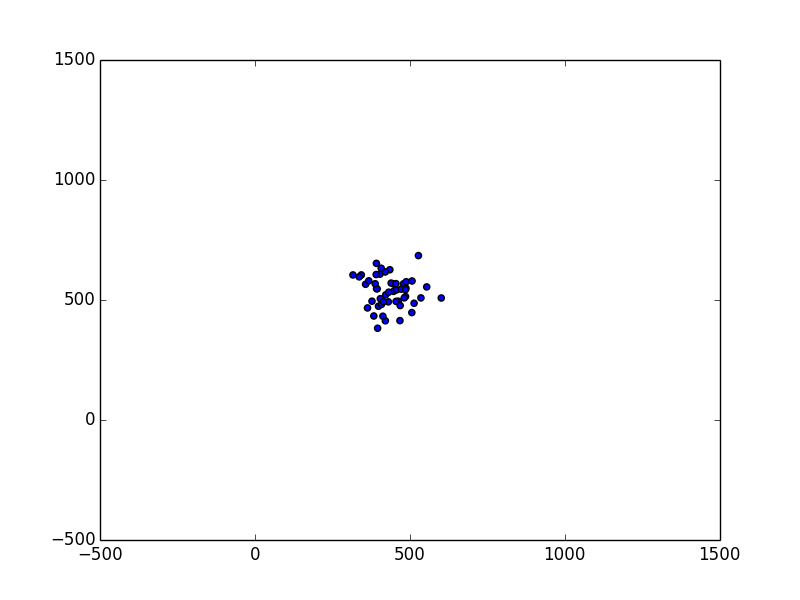
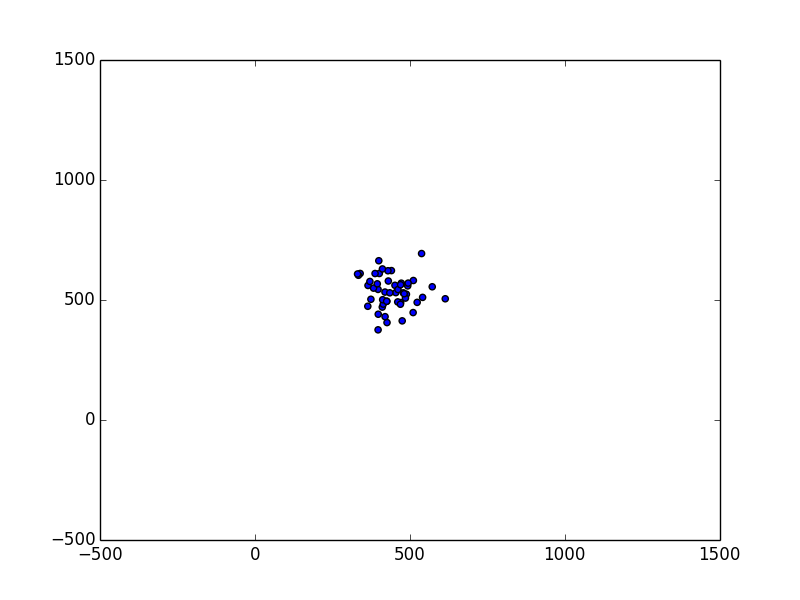
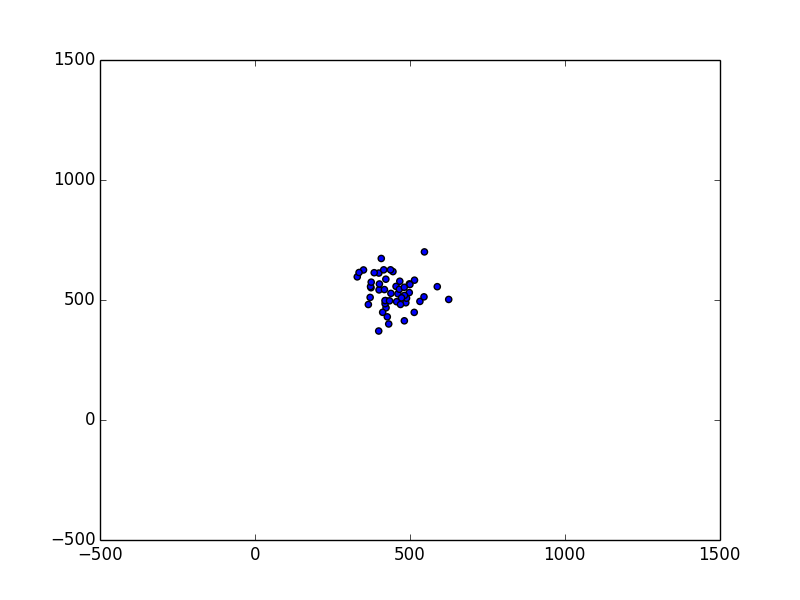
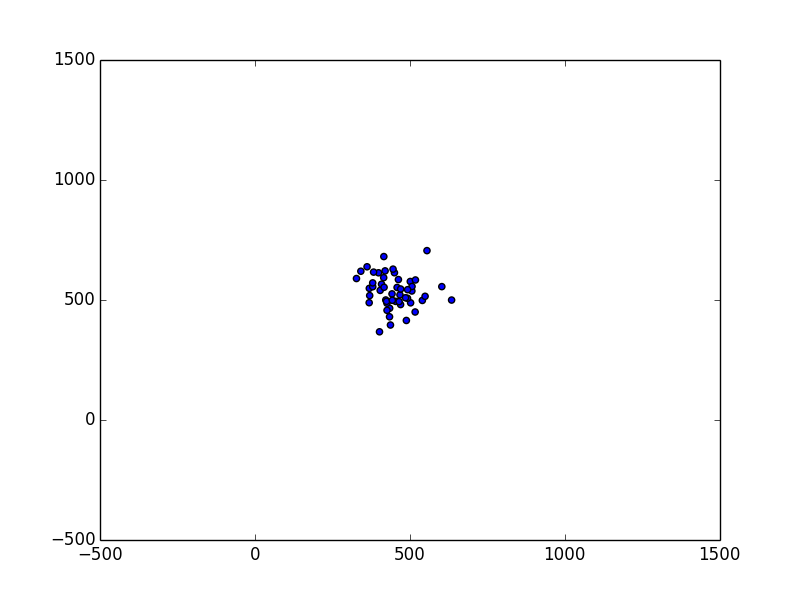
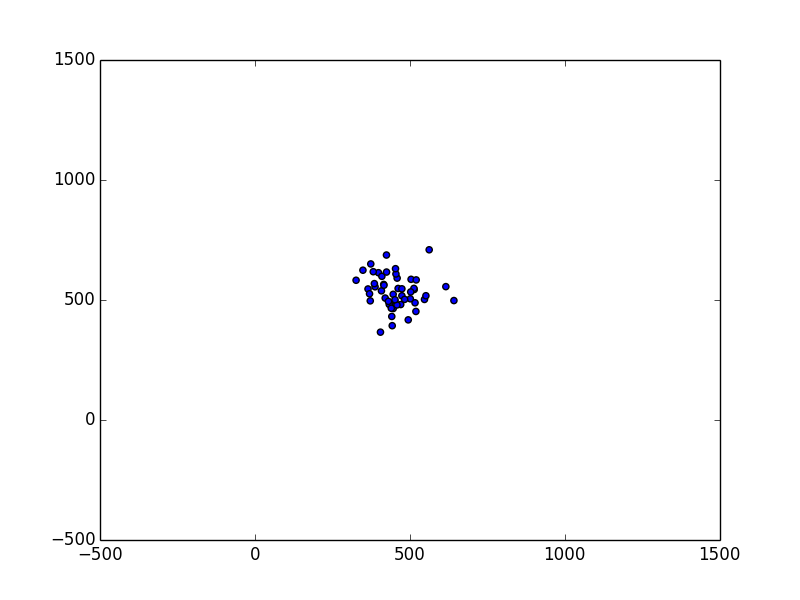
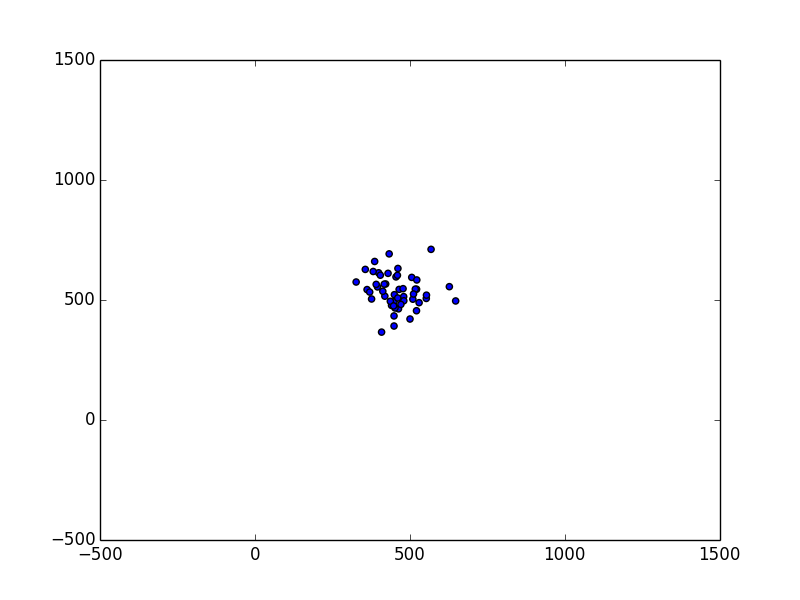
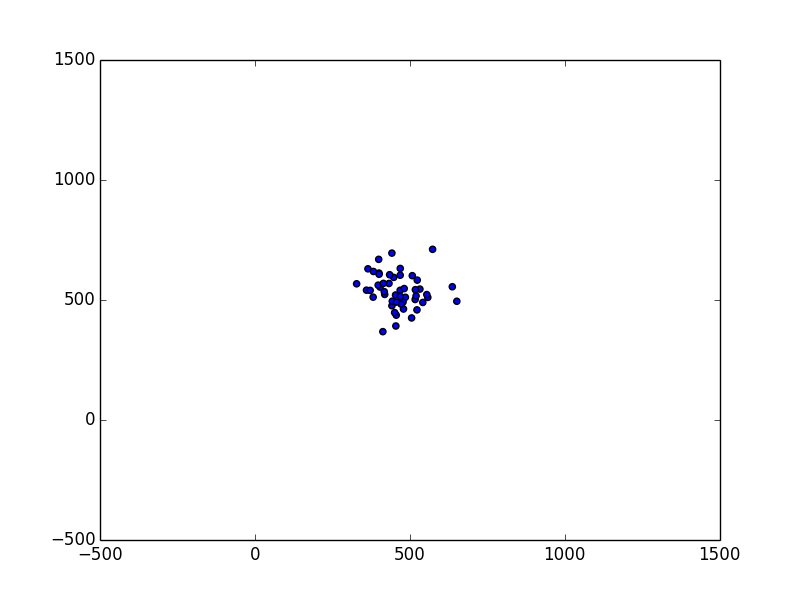
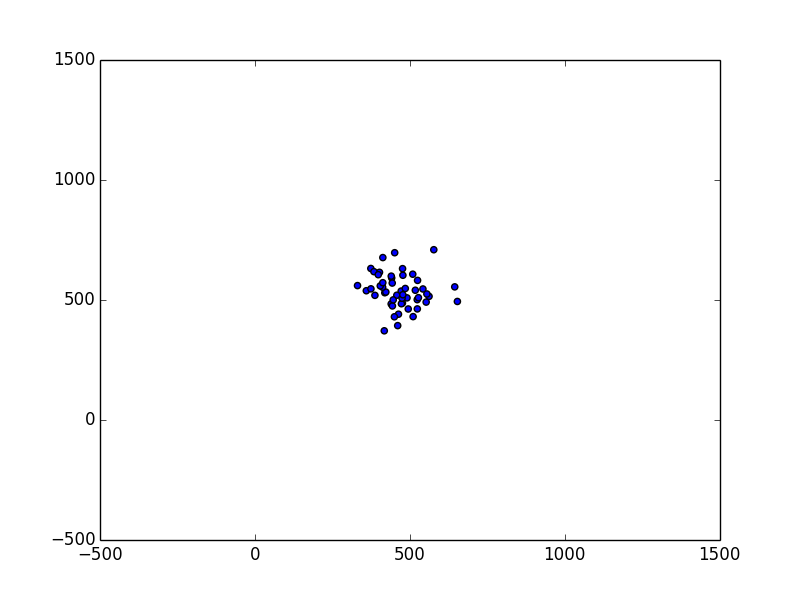
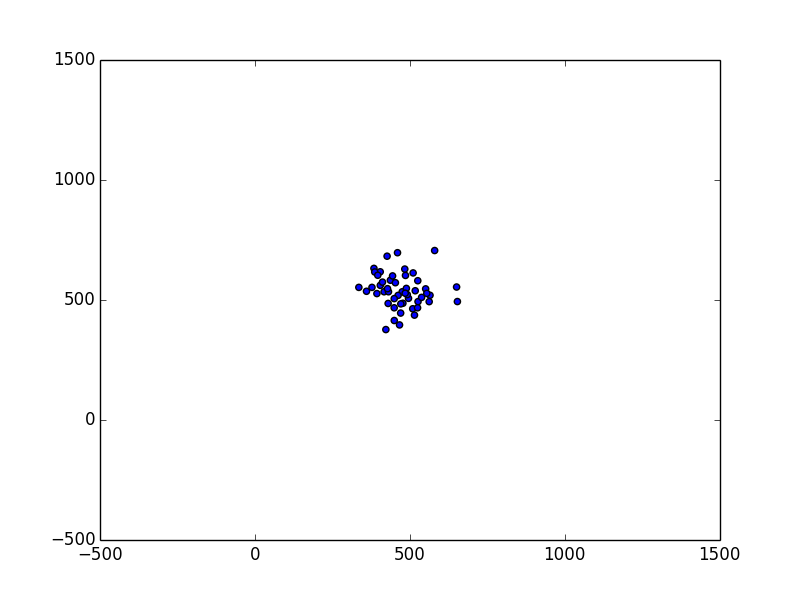
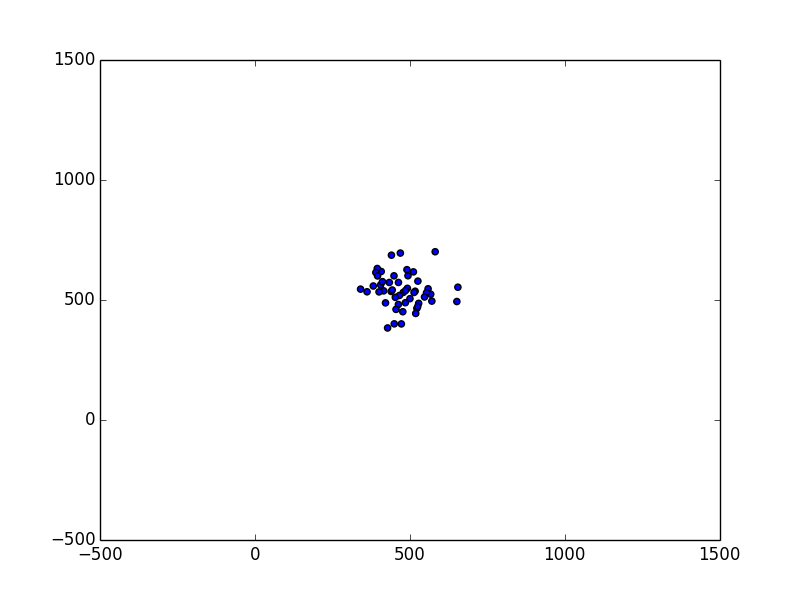
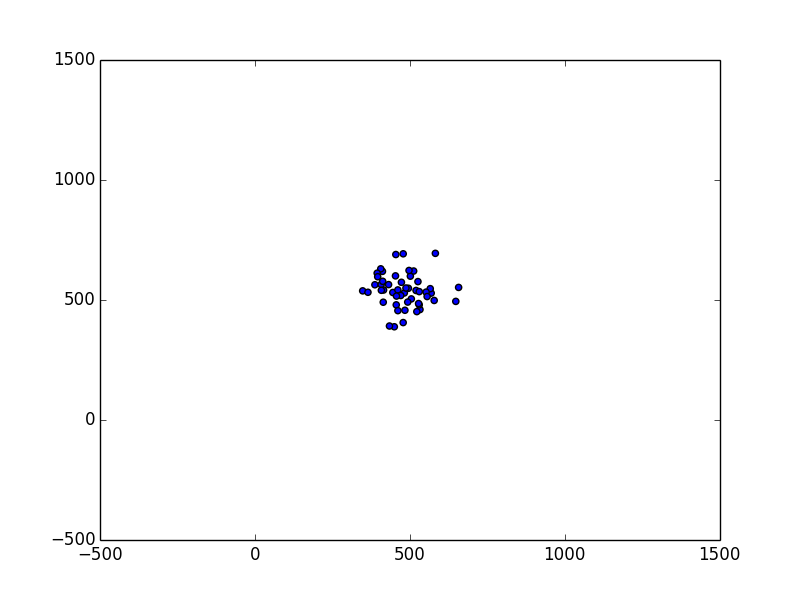
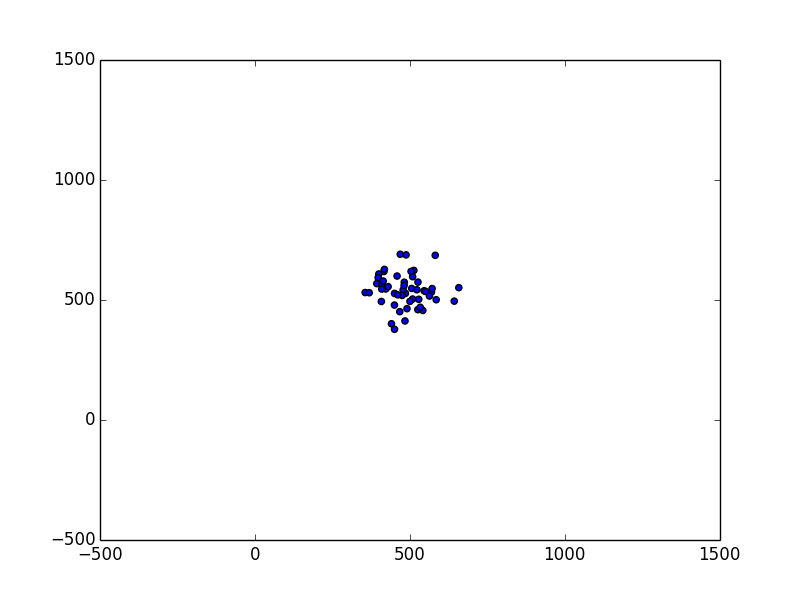
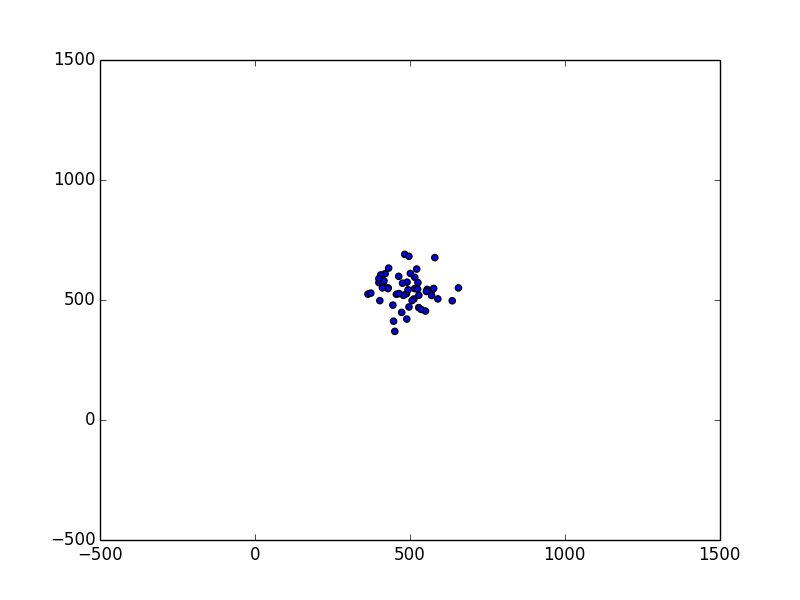
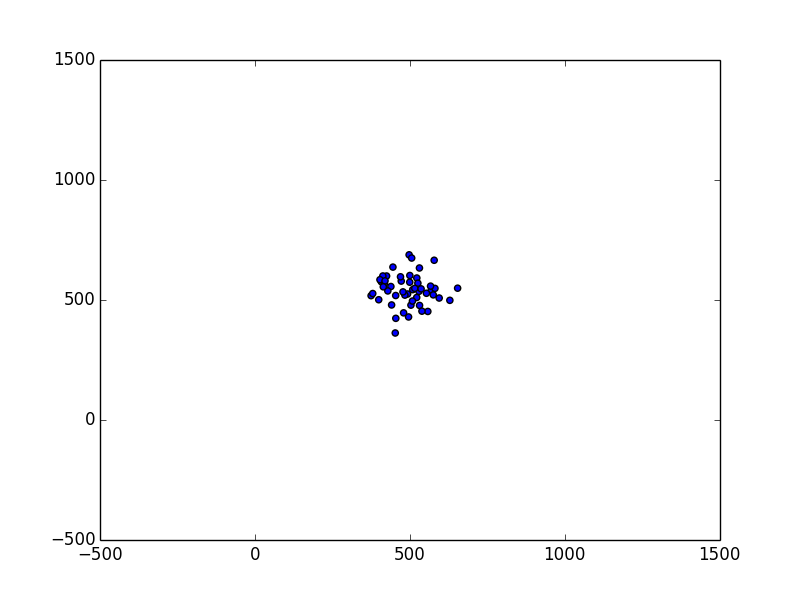
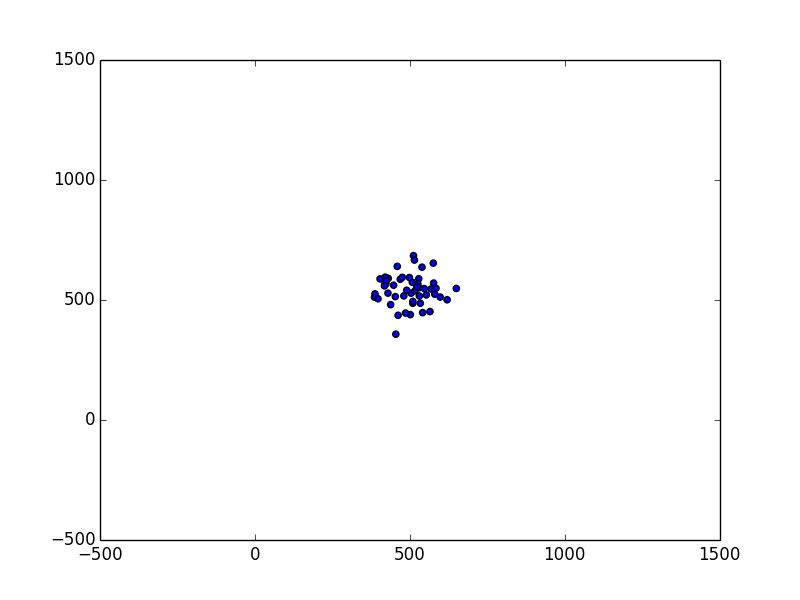
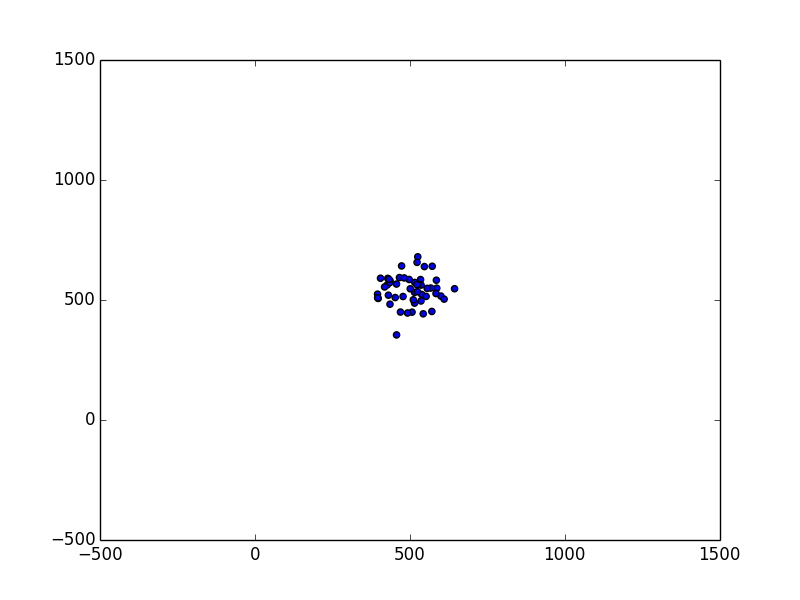
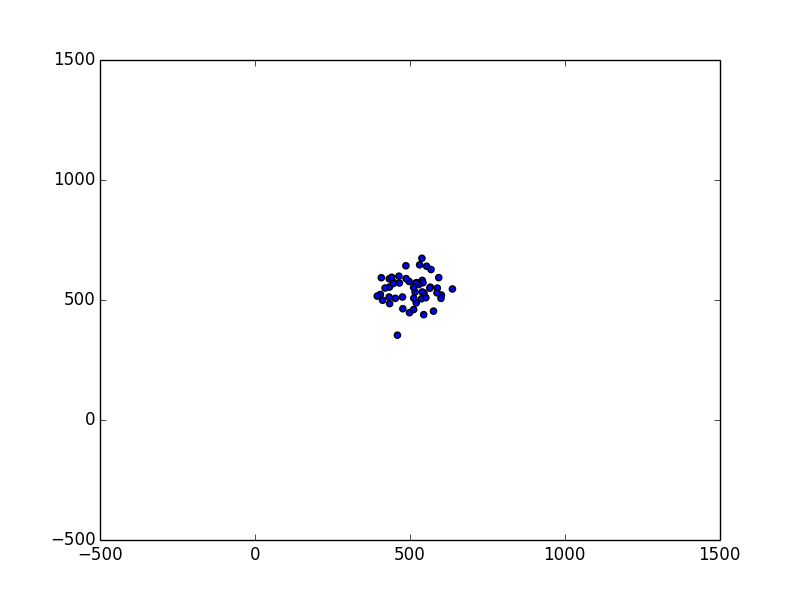
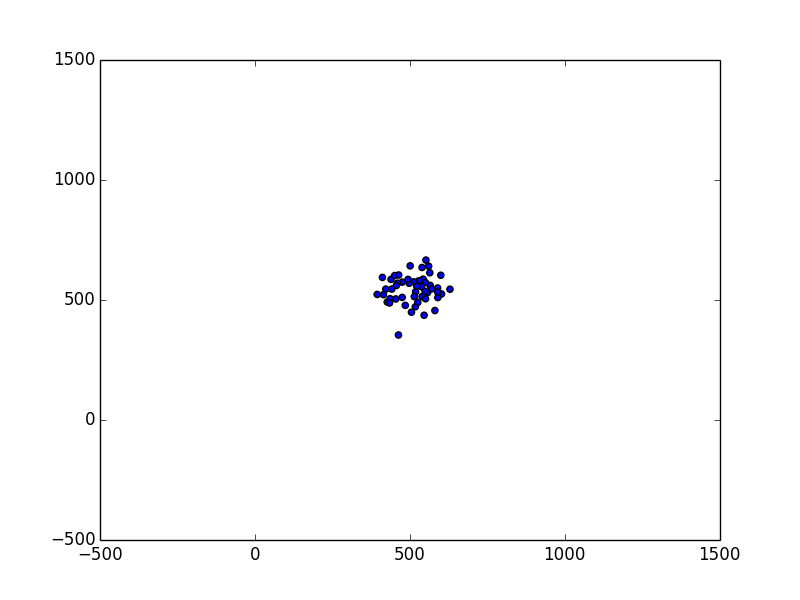
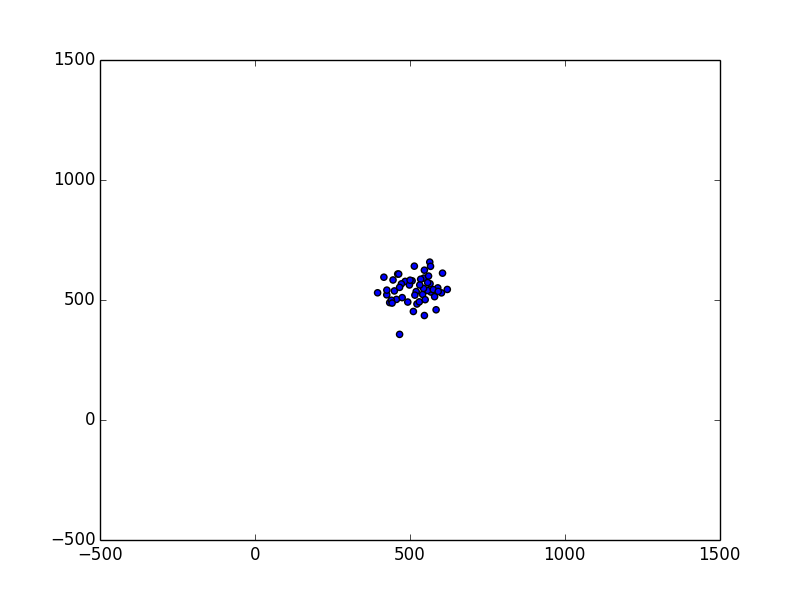
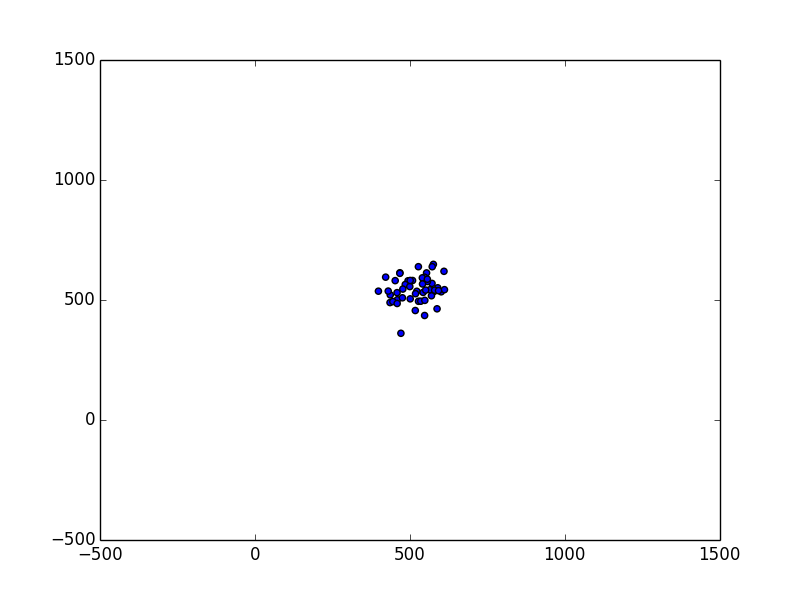
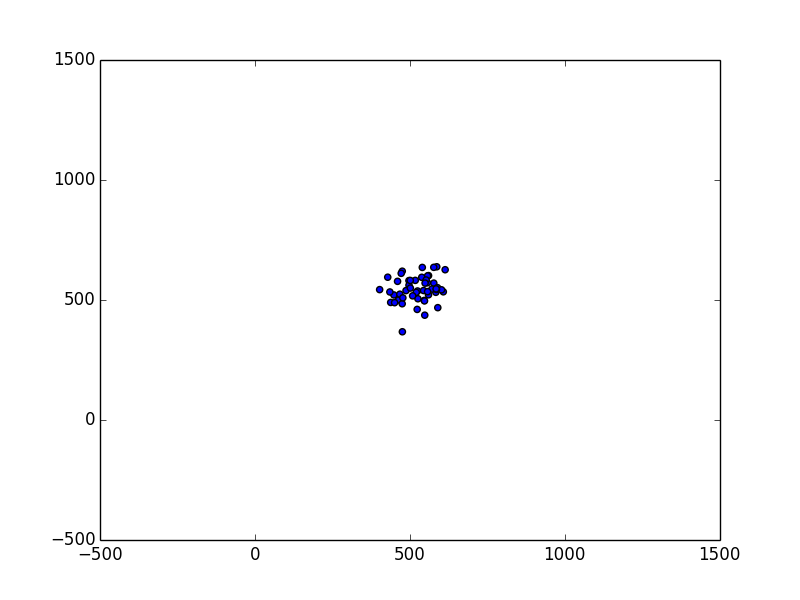
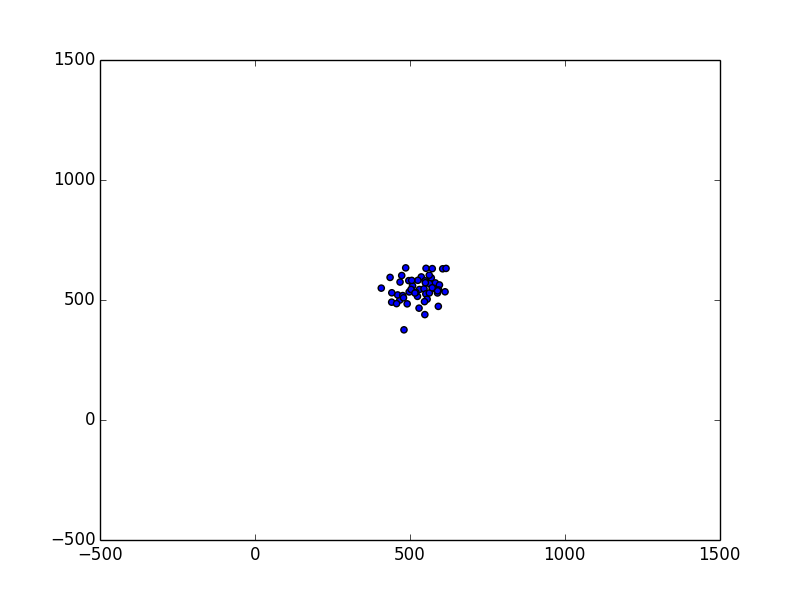
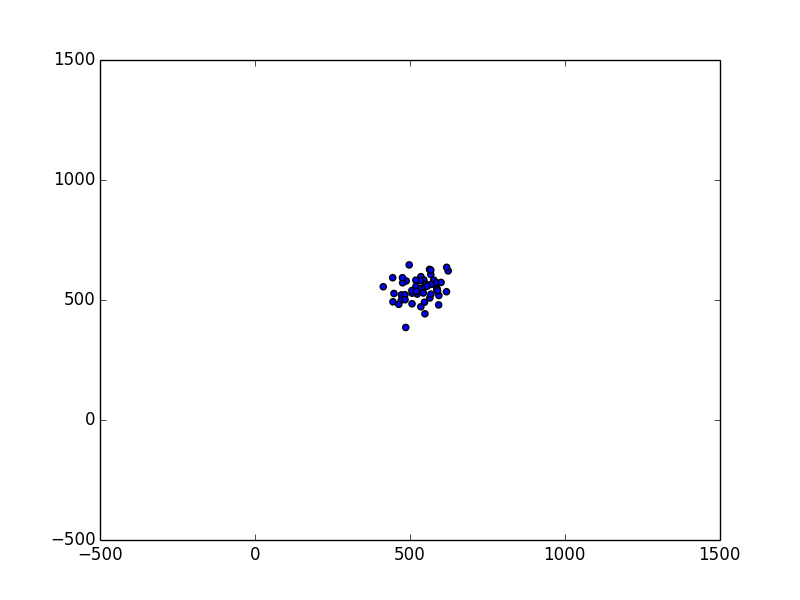
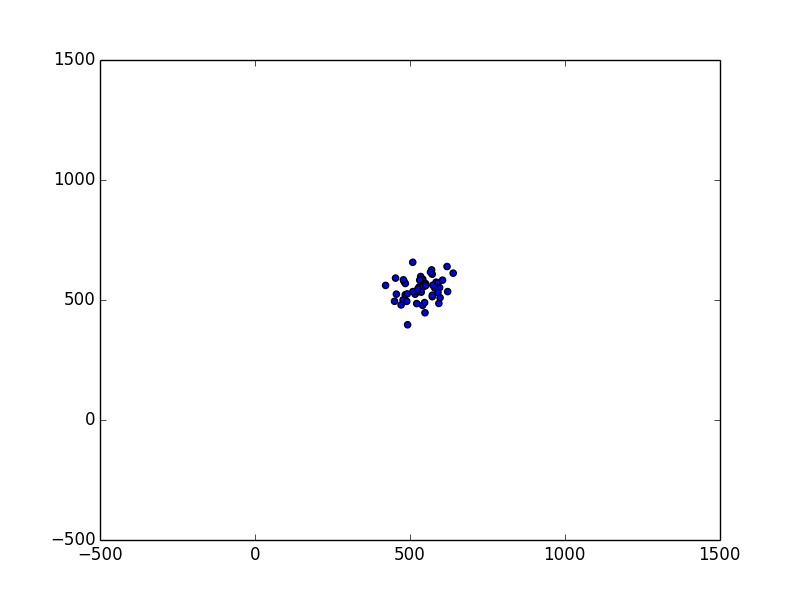
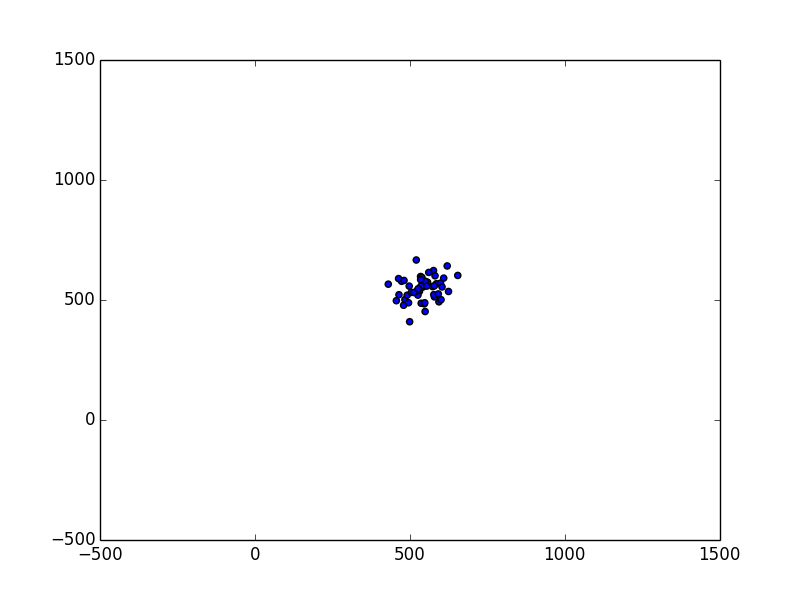
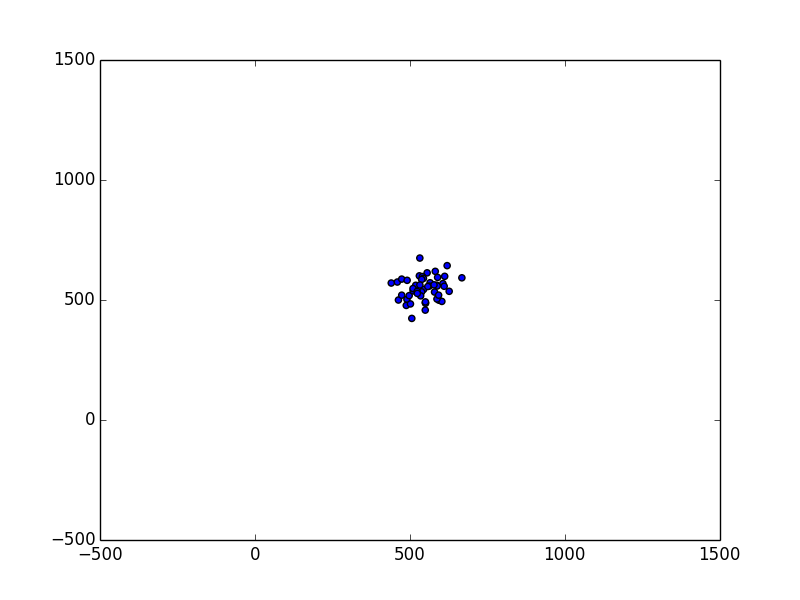
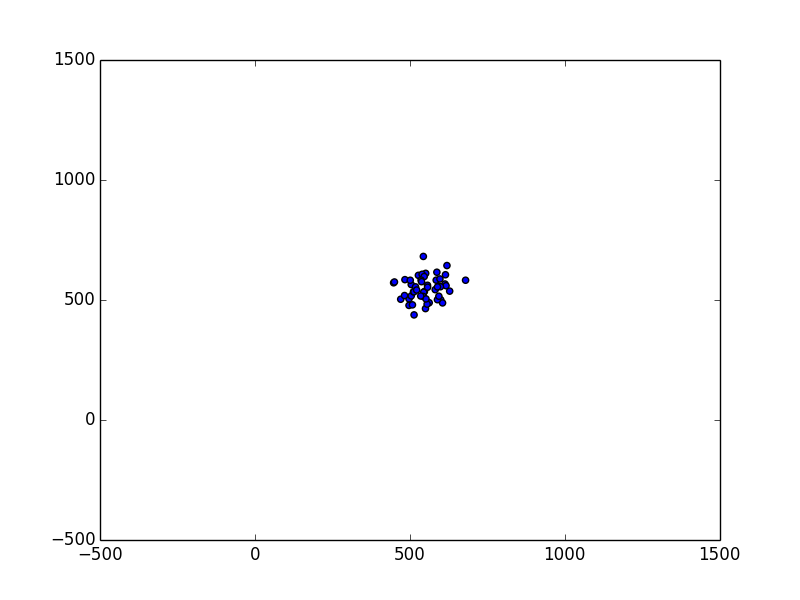
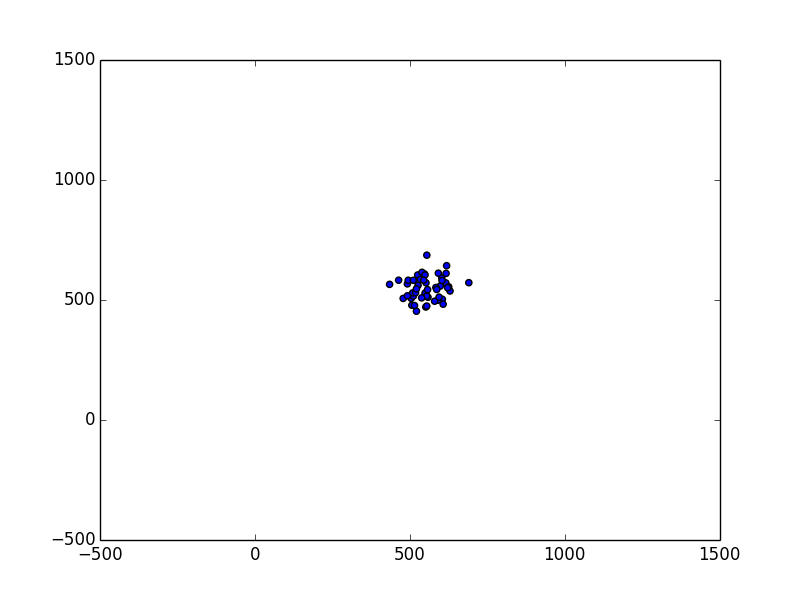
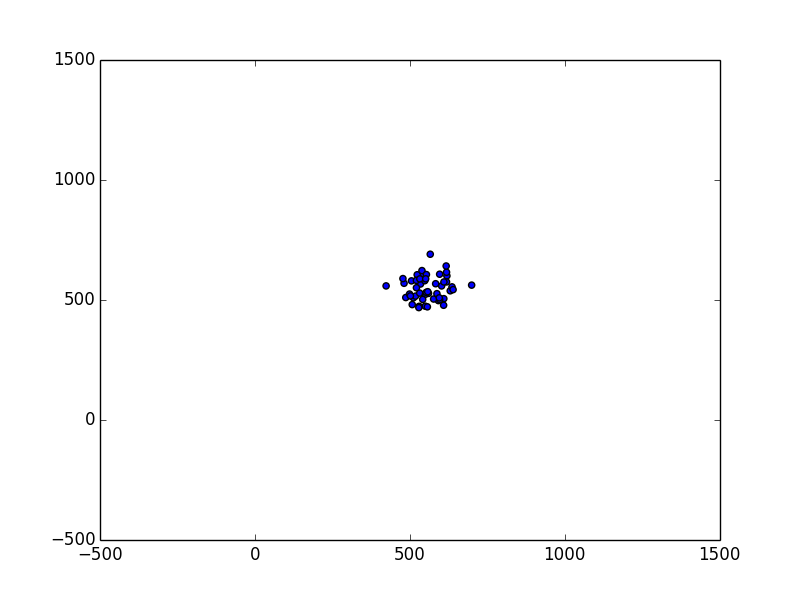
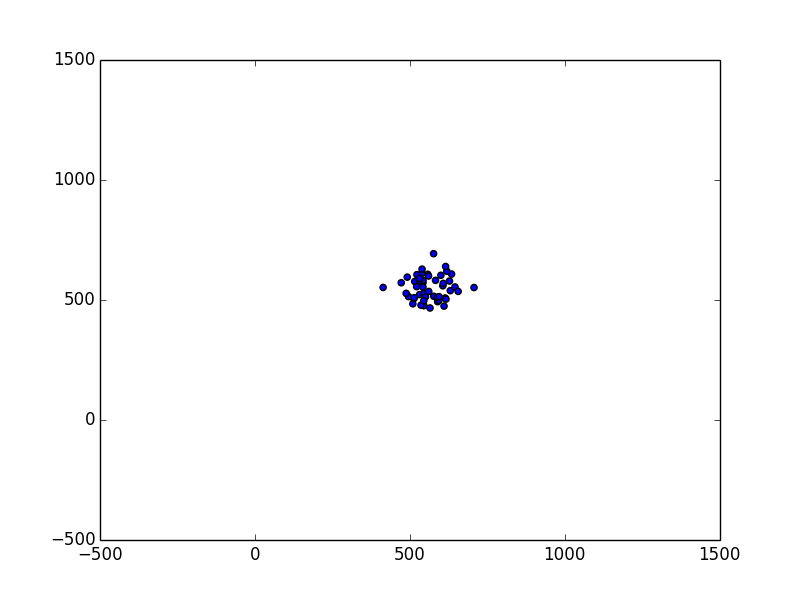
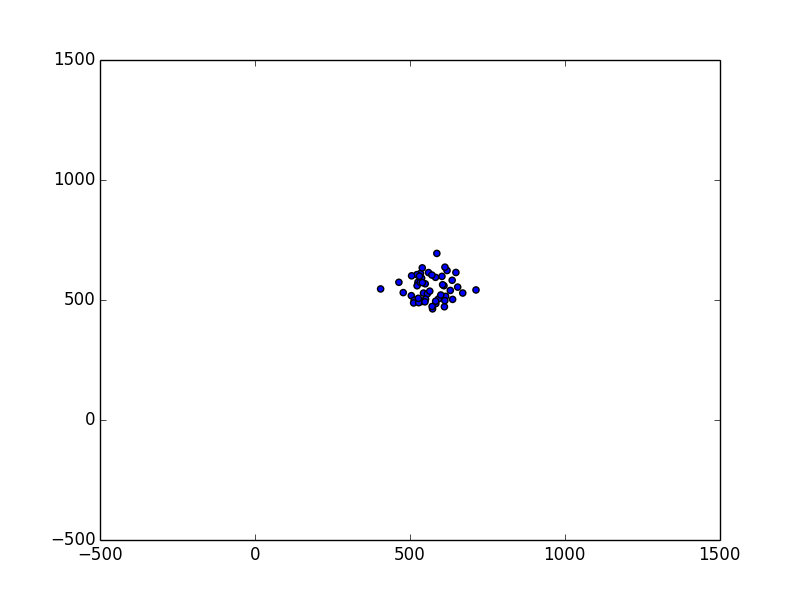
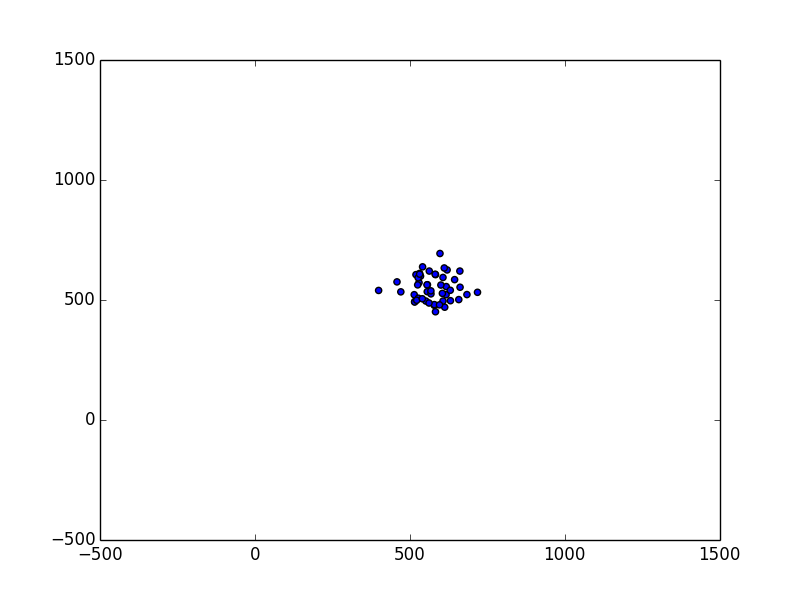
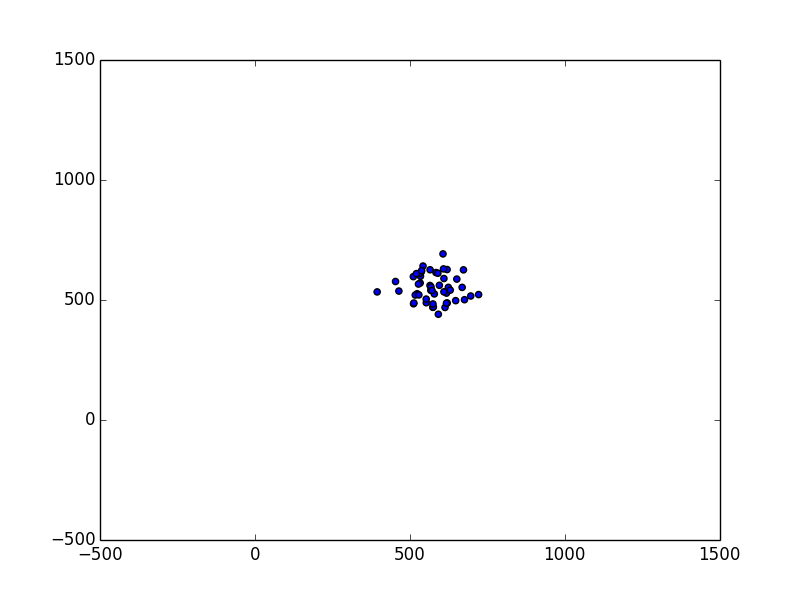
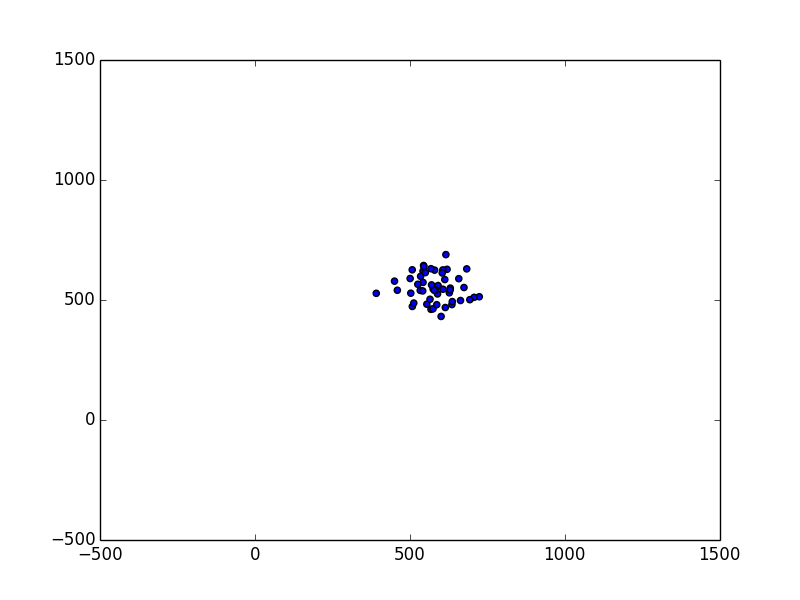
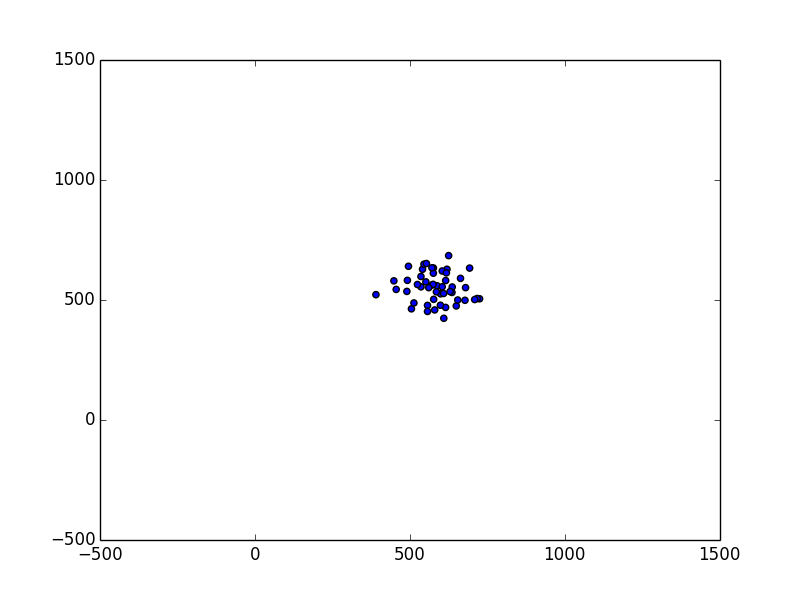
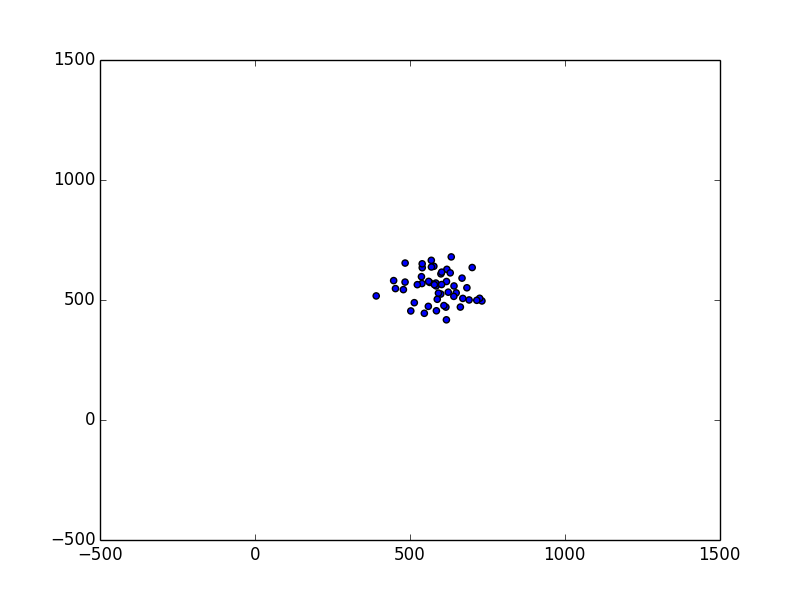
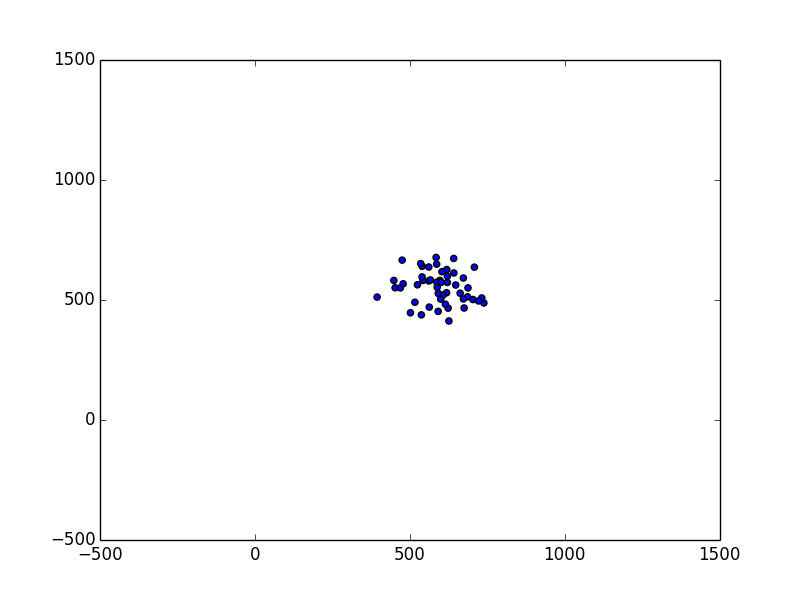
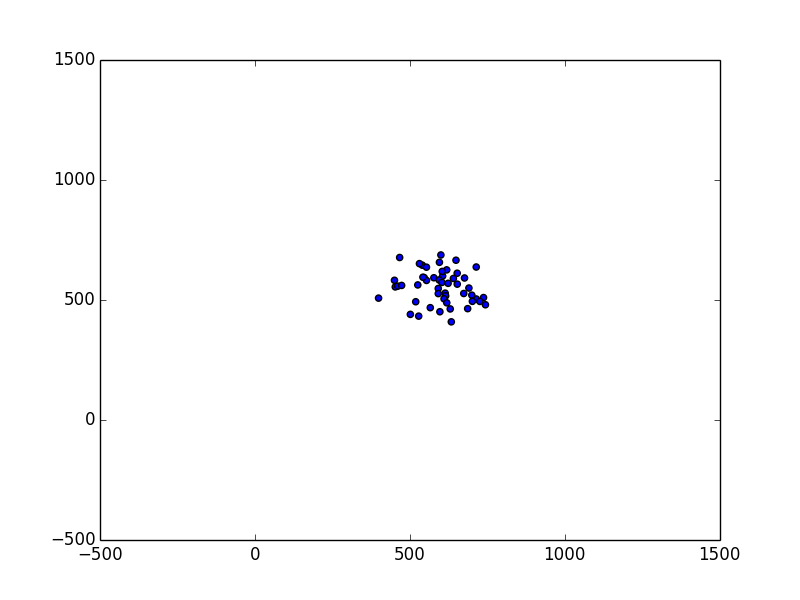
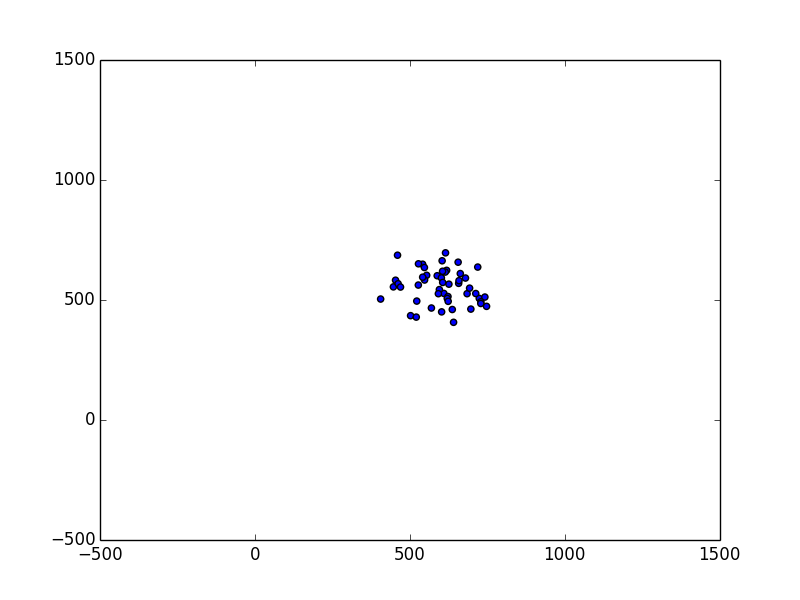
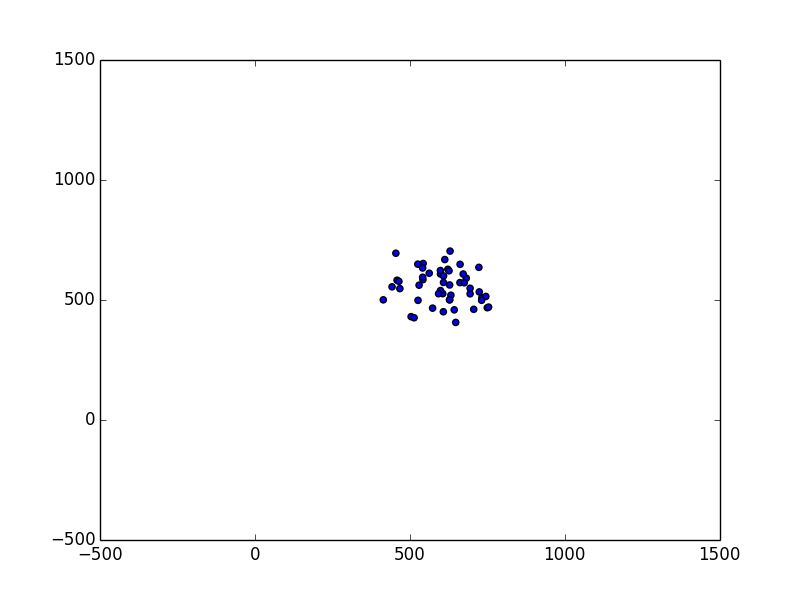
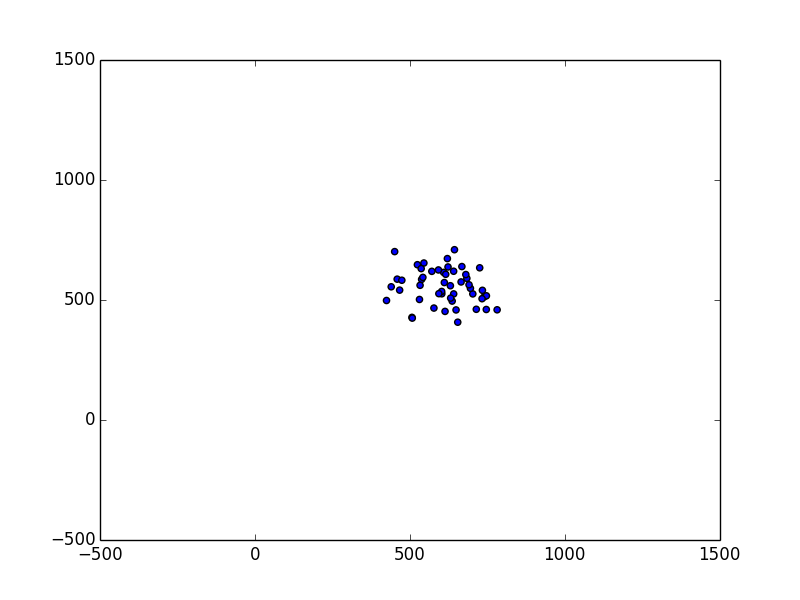
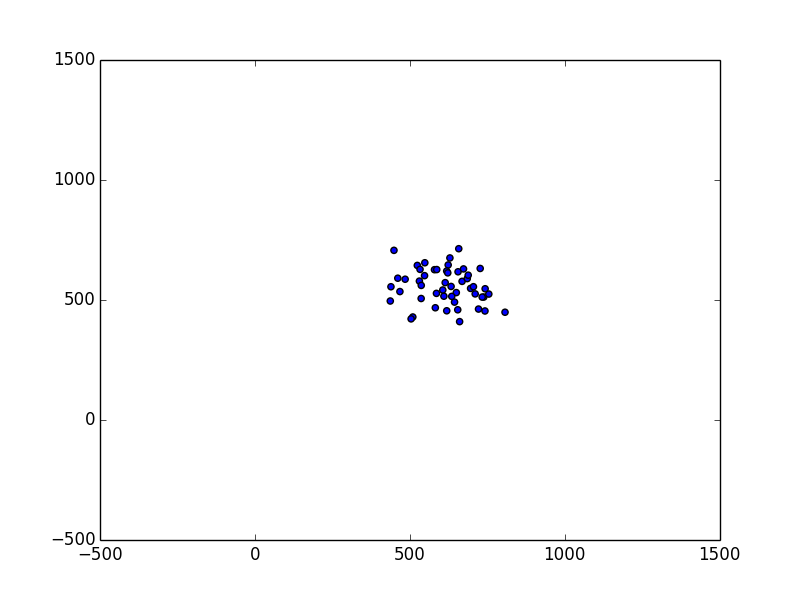
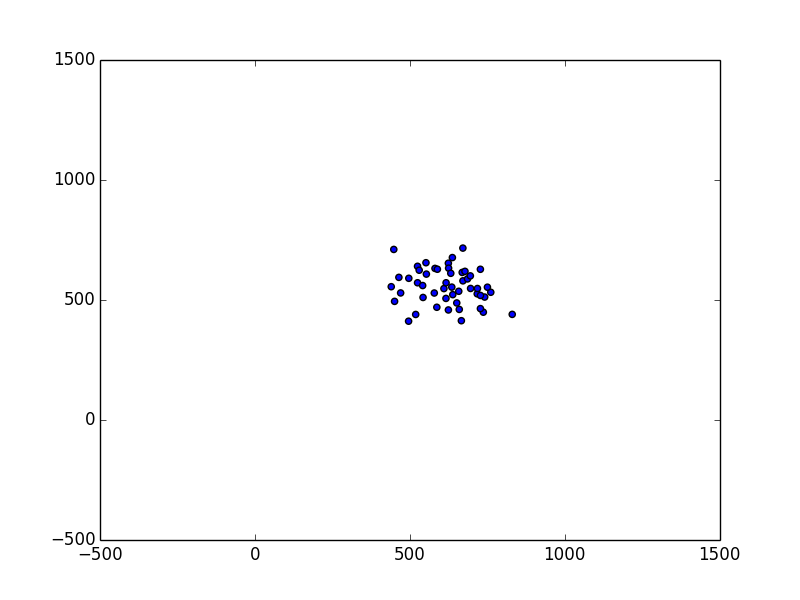
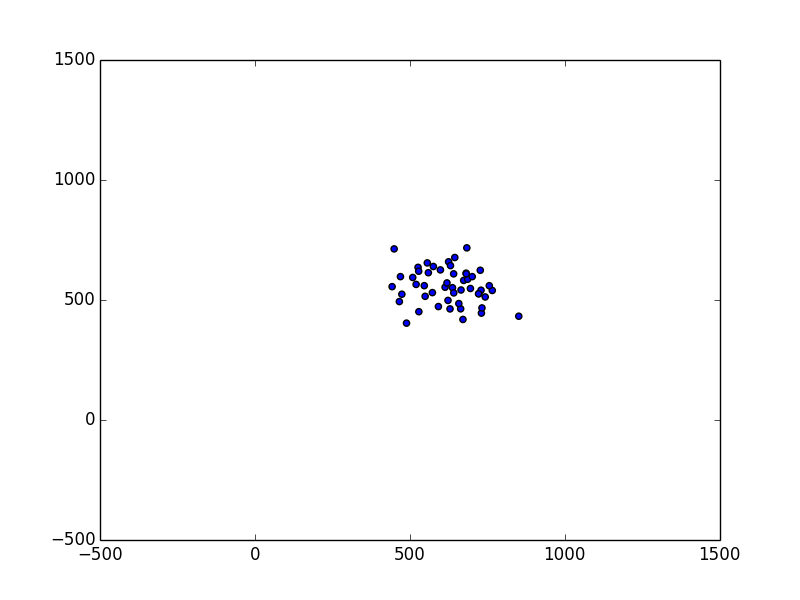
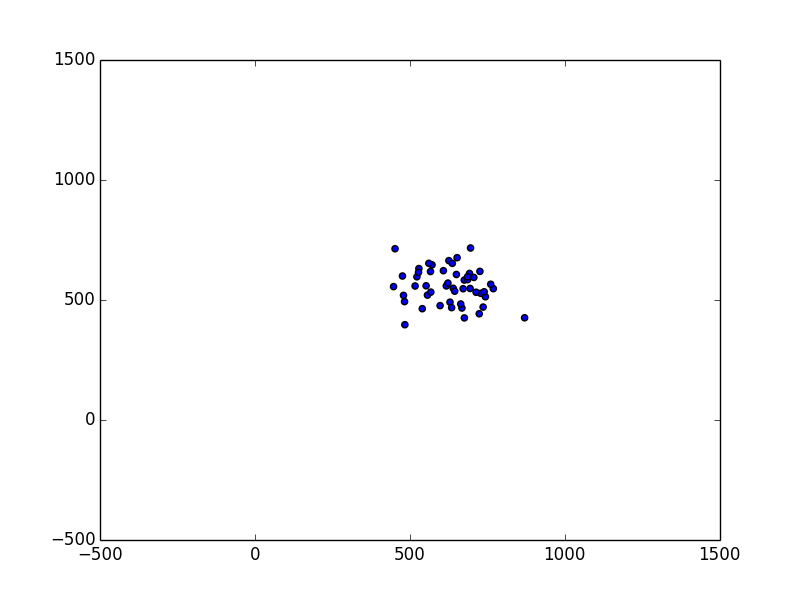
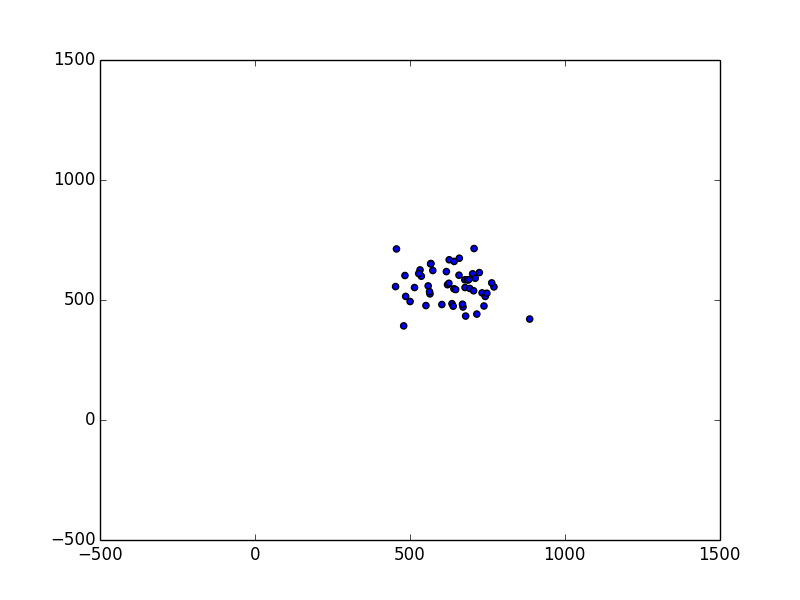
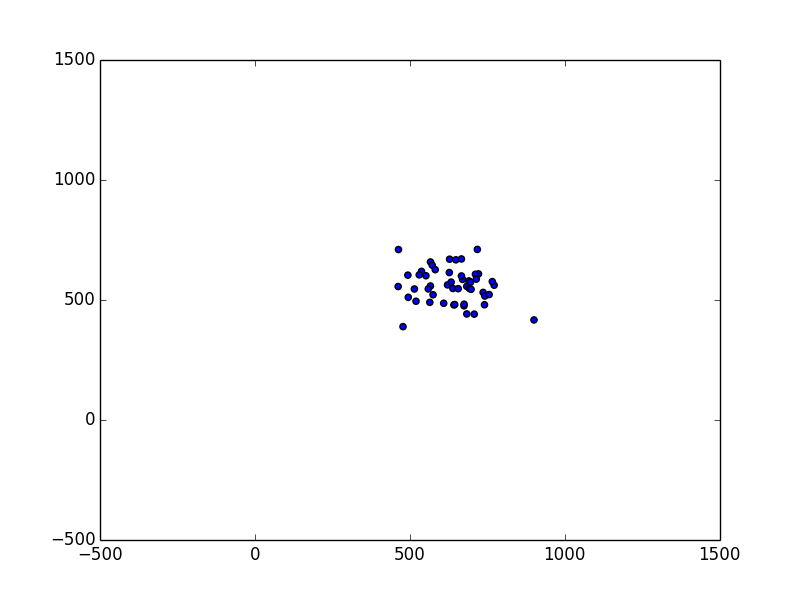
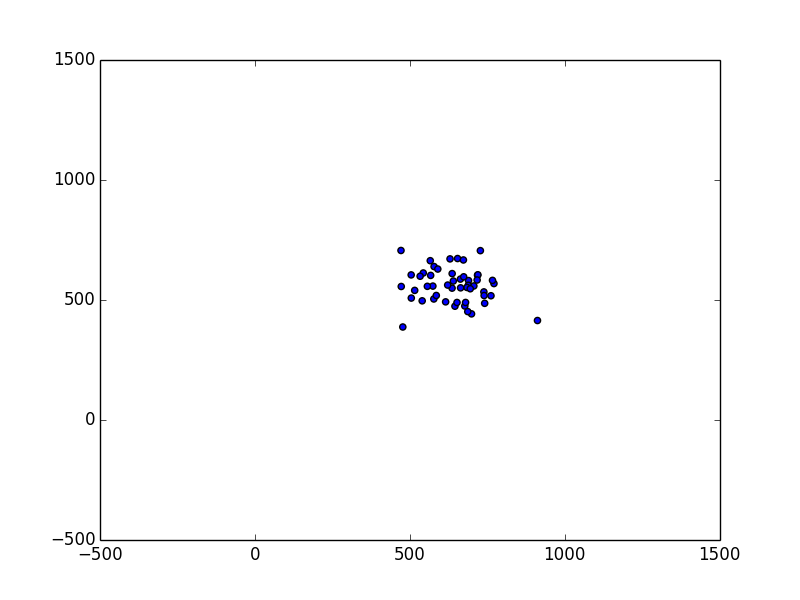
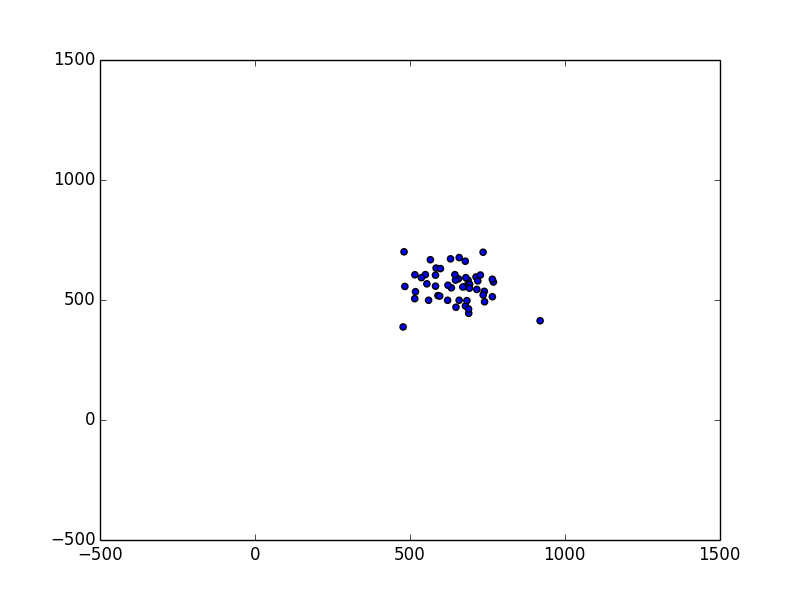
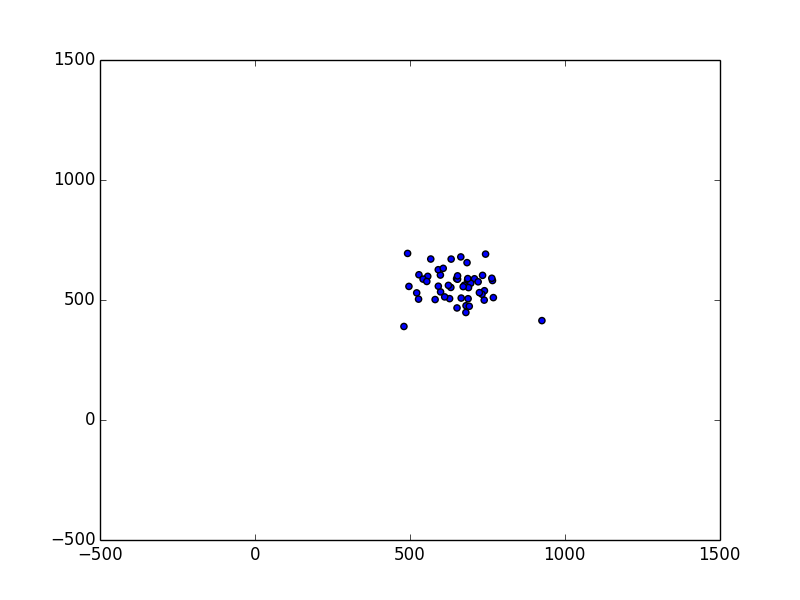
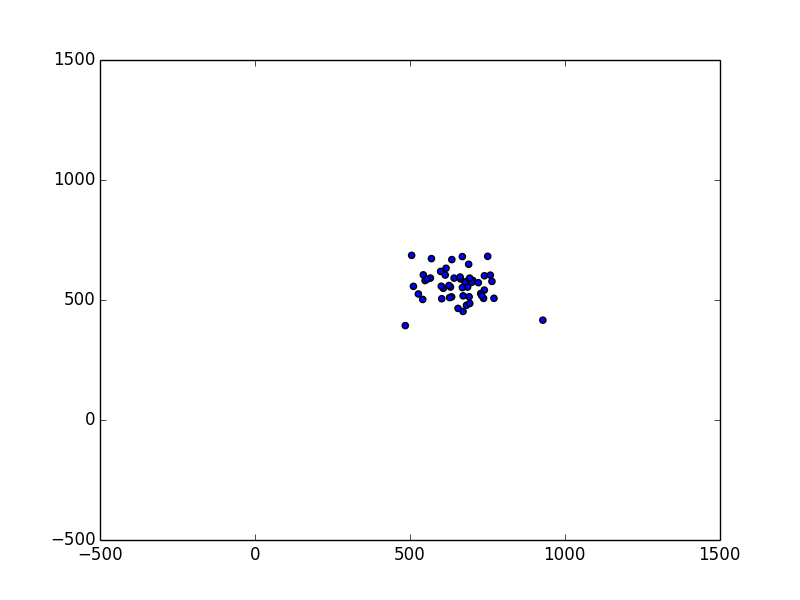
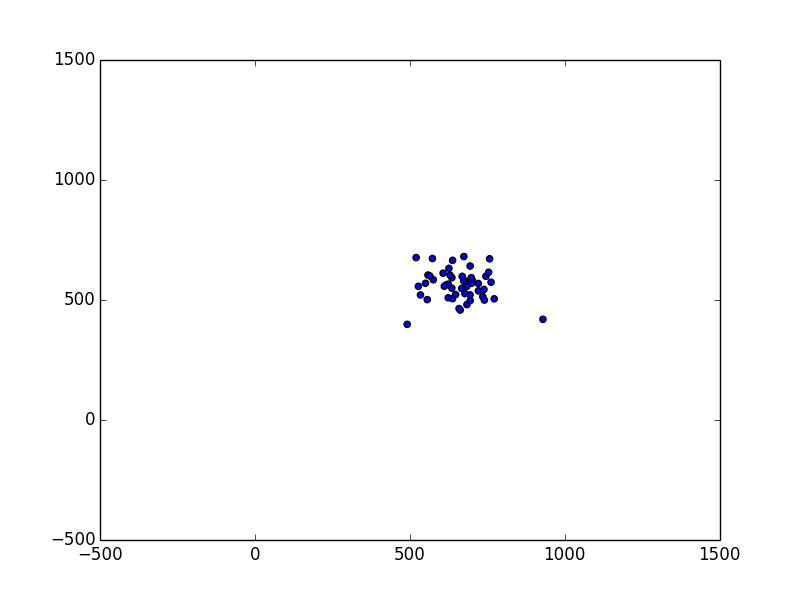
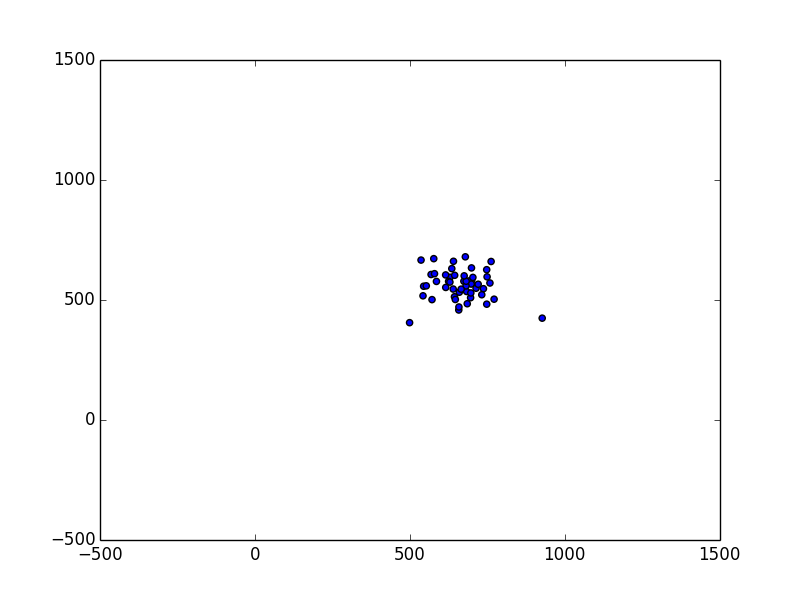
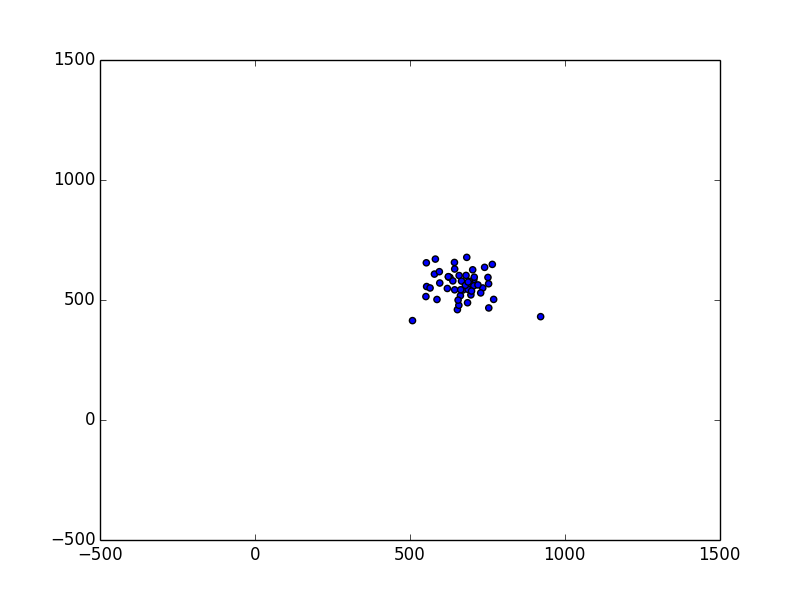

In [58]:
anim


Run bad_boids:


``` bash
cd bad_boids
python bad_boids.py
```


You should be able to see some birds flying around, and then disappearing as they leave the window.


### Your Task


Transform bad_boids into better code, while making sure it still works.


### A regression test


First, have a look at the regression test I made.

To create it, I saved out the before and after state
for one iteration of some boids, using ipython:


``` python
import yaml
import boids
from copy import deepcopy
before=deepcopy(boids.boids)
boids.update_boids(boids.boids)
after=boids.boids
fixture={"before":before,"after":after}
fixture_file=open("fixture.yml",'w')
fixture_file.write(yaml.dump(fixture))
fixture_file.close()
```

### A regression test


Then, I used the fixture file to define the test:


``` python
from boids import update_boids
from nose.tools import assert_equal
import os
import yaml

def test_bad_boids_regression():
    regression_data=yaml.load(open(os.path.join(os.path.dirname(__file__),'fixture.yml')))
    boid_data=regression_data["before"]
    update_boids(boid_data)
    assert_equal(regression_data["after"],boid_data)
```

### Make the regression test fail


Check the tests pass:


``` bash
nosetests
```


Edit the file to make the test fail, see the fail, then reset it:


```
git checkout boids.py
```

### Start Refactoring


Look at the code, consider the [list of refactorings](#refactoring-summary), and make changes

Each time, do a git commit on your fork, and write a commit message explaining the 
refactoring you did.

Try to keep the changes as small as possible.

If your refactoring creates any units, (functions, modules, or classes)
write a unit test for the unit.